# **Cleaning and pre-processing**

### Importing the libraries and data

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from numpy.random import seed
seed(123)
%matplotlib inline
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, cross_val_score
from catboost import CatBoostRegressor
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from IPython.display import SVG
from statsmodels.tsa.seasonal import seasonal_decompose
import pickle
import catboost as cb
import shap

Load the data.

In [ ]:
df = pd.read_csv('listings.csv')

In [ ]:
df.head()

id                        listing_url       scrape_id last_scraped  \
0  1078  https://www.airbnb.com/rooms/1078  20190514155147   2019-05-14   
1  2265  https://www.airbnb.com/rooms/2265  20190514155147   2019-05-14   
2  5245  https://www.airbnb.com/rooms/5245  20190514155147   2019-05-14   
3  5456  https://www.airbnb.com/rooms/5456  20190514155147   2019-05-14   
4  5769  https://www.airbnb.com/rooms/5769  20190514155147   2019-05-14   

                                        name  \
0          *UT/Hyde Park Craftsman Apartment   
1            Zen-East in the Heart of Austin   
2        Green, Colorful, Clean &  Cozy home   
3  Walk to 6th, Rainey St and Convention Ctr   
4                             NW Austin Room   

                                             summary  \
0  This upstairs apartment is surrounded by trees...   
1  Zen East is situated in a vibrant & diverse mu...   
2                                                NaN   
3  Fabulous location for walking to Convention Ce...   
4                                                NaN   

                                               space  \
0  The garage apartment was built in the 1920s an...   
1  This colorful and clean 1923 house was complet...   
2  Situated in a vibrant & diverse multicultural ...   
3  Cute Private Studio apartment located in Willo...   
4  Looking for a comfortable inexpensive room to ...   

                                         description experiences_offered  \
0  This upstairs apartment is surrounded by trees...                none   
1  Zen East is situated in a vibrant & diverse mu...                none   
2  Situated in a vibrant & diverse multicultural ...                none   
3  Fabulous location for walking to Convention Ce...                none   
4  Looking for a comfortable inexpensive room to ...                none   

                               neighborhood_overview  ...  \
0  Hyde Park is close to downtown, UT, 6th street...  ...   
1                                                NaN  ...   
2                                                NaN  ...   
3  My neighborhood is ideally located if you want...  ...   
4  Quiet neighborhood with lots of trees and good...  ...   

  is_business_travel_ready          cancellation_policy  \
0                        f                     flexible   
1                        f  strict_14_with_grace_period   
2                        f  strict_14_with_grace_period   
3                        f  strict_14_with_grace_period   
4                        f                     moderate   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             f                                f   
3                             f                                t   
4                             t                                t   

  calculated_host_listings_count  calculated_host_listings_count_entire_homes  \
0                              2                                            2   
1                              3                                            2   
2                              3                                            2   
3                              1                                            1   
4                              1                                            0   

   calculated_host_listings_count_private_rooms  \
0                                             0   
1                                             1   
2                                             1   
3                                             0   
4                                             1   

  calculated_host_listings_count_shared_rooms  reviews_per_month  \
0                                           0               1.70   
1                                           0               0.19   
2    

In [ ]:
df.shape

(11792, 107)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11792 entries, 0 to 11791
Columns: 107 entries, id to geometry
dtypes: float64(24), int64(22), object(61)
memory usage: 9.6+ MB


In [ ]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
geometry                                         object
Length: 107, dtype: object

In [ ]:
df.isnull().sum().sum()

181238

In [ ]:
column_headers = list(df.columns)
print(column_headers)

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_hood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'hood', 'hood_cleansed', 'hood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', '

In [ ]:
pd.set_option('display.max_columns', len(df.columns))
pd.set_option('display.max_rows', 107)
df.head()

id                        listing_url       scrape_id last_scraped  \
0  1078  https://www.airbnb.com/rooms/1078  20190514155147   2019-05-14   
1  2265  https://www.airbnb.com/rooms/2265  20190514155147   2019-05-14   
2  5245  https://www.airbnb.com/rooms/5245  20190514155147   2019-05-14   
3  5456  https://www.airbnb.com/rooms/5456  20190514155147   2019-05-14   
4  5769  https://www.airbnb.com/rooms/5769  20190514155147   2019-05-14   

                                        name  \
0          *UT/Hyde Park Craftsman Apartment   
1            Zen-East in the Heart of Austin   
2        Green, Colorful, Clean &  Cozy home   
3  Walk to 6th, Rainey St and Convention Ctr   
4                             NW Austin Room   

                                             summary  \
0  This upstairs apartment is surrounded by trees...   
1  Zen East is situated in a vibrant & diverse mu...   
2                                                NaN   
3  Fabulous location for walking to Convention Ce...   
4                                                NaN   

                                               space  \
0  The garage apartment was built in the 1920s an...   
1  This colorful and clean 1923 house was complet...   
2  Situated in a vibrant & diverse multicultural ...   
3  Cute Private Studio apartment located in Willo...   
4  Looking for a comfortable inexpensive room to ...   

                                         description experiences_offered  \
0  This upstairs apartment is surrounded by trees...                none   
1  Zen East is situated in a vibrant & diverse mu...                none   
2  Situated in a vibrant & diverse multicultural ...                none   
3  Fabulous location for walking to Convention Ce...                none   
4  Looking for a comfortable inexpensive room to ...                none   

                               neighborhood_overview  \
0  Hyde Park is close to downtown, UT, 6th street...   
1                                                NaN   
2                                                NaN   
3  My neighborhood is ideally located if you want...   
4  Quiet neighborhood with lots of trees and good...   

                                               notes  \
0  What to expect.    We really want you to have ...   
1  A 2013 Genuine Buddy Scooter 125 may be availa...   
2  Please note: A two story studio was built in t...   
3  Parking on street requires a permit.  There is...   
4                                                NaN   

                                             transit  \
0  We are 1 block from the 1 or 5 bus routes that...   
1  5 min walk to Capitol Metro Rail (train that t...   
2                                                NaN   
3  Bus stop around the block.  Uber, Lyft, Ride, ...   
4  We are approximately 16 miles from downtown Au...   

                                              access  \
0  Their own apartment and a large garden with se...   
1  Several local restaurants, small clubs, music ...   
2                                                NaN   
3                       Guests have access to patio.   
4                             Gravel Parking Kitchen   

                                         interaction  \
0  It is always a treat to meet guests at checkin...   
1  Depending on your dates and arrival time, I am...   
2  I should be available, upon your arrival, to a...   
3  I am happy to welcome my guests and show them in.   
4  We interact with our guests as little or as mu...   

                                         house_rules  thumbnail_url  \
0  Make yourself at home! * From 2:00 on the day ...            NaN   
1  • Check-in time is 4 pm. Check out is 11 am. I...            NaN   
2  A brief profile for all guests along with phot...            NaN   
3  No Pets allowed.  No smoking in the room. No m...            NaN   
4  I will need to see identification at check in....            NaN   

   medium_url         

In [ ]:
df.describe(exclude=[np.number])

listing_url last_scraped  \
count                               11792        11792   
unique                              11792            1   
top     https://www.airbnb.com/rooms/1078   2019-05-14   
freq                                    1        11792   

                           name  \
count                     11791   
unique                    11600   
top     Wyndham Austin - Studio   
freq                          9   

                                                  summary  \
count                                               11459   
unique                                              10670   
top     Upscale 2-bedroom, 2-bath apartment with balco...   
freq                                                   38   

                                                    space  \
count                                                8876   
unique                                               8004   
top     Please make yourself at home and call us if yo...   
freq                                                   70   

                                              description experiences_offered  \
count                                               11691               11792   
unique                                              11157                   1   
top     Upscale 2-bedroom, 2-bath apartment with balco...                none   
freq                                                   19               11792   

       neighborhood_overview  \
count                   7666   
unique                  6594   
top                 Downtown   
freq                      43   

                                                    notes  \
count                                                5368   
unique                                               4583   
top     Guest Information Form must be completed withi...   
freq                                                   59   

                                                  transit  \
count                                                7473   
unique                                               6475   
top     Austin is a very connected city, with buses, b...   
freq                                                   72   

                                                   access  \
count                                                7422   
unique                                               6368   
top     You'll have access to the whole home, except a...   
freq                                                   78   

                                              interaction  \
count                                                7696   
unique                                               6464   
top     The Renters Club is available to you from 9am-...   
freq                                                   70   

                                              house_rules  \
count                                                7917   
unique                                               6606   
top     Guests must be over the age of 25 and will be ...   
freq                                                   85   

                                              picture_url  \
count                                               11792   
unique                                              11571   
top     https://a0.muscache.com/im/pictures/64c0a276-4...   
freq                                                   14   

                                           host_url    host_name  host_since  \
count                                         11792        11789       11789   
unique                                         8299         3024        2731   
top     https://www.airbnb.com/users/show/219500569  Stay Alfred  2017-02-28   
freq                                             79          143          85   

                       host_location  \
count                          11761   
unique                           420   
top     Austin, Texas, Unit

### **Dropping initial columns**

In [ ]:
df.drop(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_hood', 'host_verifications', 'calendar_last_scraped'], axis = 1, inplace=True)

In [ ]:
df.state.value_counts()

TX    11784
Tx        3
tx        2
Name: state, dtype: int64

Other columns can be dropped because they contain a majority of null entries.

In [ ]:
df.isna().sum()

id                                                  0
experiences_offered                                 0
host_since                                          3
host_response_time                               3530
host_response_rate                               3530
host_acceptance_rate                            11792
host_is_superhost                                   3
host_listings_count                                 3
host_total_listings_count                           3
host_has_profile_pic                                3
host_identity_verified                              3
street                                              0
hood                                              827
hood_cleansed                                       0
hood_group_cleansed                             11792
city                                                2
state                                               3
zipcode                                           112
market                      

In [ ]:
df.drop(['host_acceptance_rate', 'hood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'license'], axis = 1, inplace = True)

Some columns contain similar data, so, only one column may be kept and others be dropped, as they will be highly correlated.

In [ ]:
print(sum((df.host_listings_count == df.host_total_listings_count) == False))
df.loc[((df.host_listings_count == df.host_total_listings_count) == False)][:5]

3


id experiences_offered host_since host_response_time  \
1572    4356661                none        NaN                NaN   
2618    8214182                none        NaN                NaN   
10386  31963810                none        NaN                NaN   

      host_response_rate host_is_superhost  host_listings_count  \
1572                 NaN               NaN                  NaN   
2618                 NaN               NaN                  NaN   
10386                NaN               NaN                  NaN   

       host_total_listings_count host_has_profile_pic host_identity_verified  \
1572                         NaN                  NaN                    NaN   
2618                         NaN                  NaN                    NaN   
10386                        NaN                  NaN                    NaN   

                          street             hood  hood_cleansed    city  \
1572   Austin, TX, United States   Travis Heights          78704  Austin   
2618   Austin, TX, United States  Pleasant Valley          78741  Austin   
10386  Austin, TX, United States    East Downtown          78702  Austin   

      state  zipcode  market smart_location country_code        country  \
1572     TX  78704.0  Austin     Austin, TX           US  United States   
2618     TX  78741.0  Austin     Austin, TX           US  United States   
10386    TX  78702.0  Austin     Austin, TX           US  United States   

       latitude  longitude is_location_exact property_type        room_type  \
1572   30.25560  -97.74707                 t     Apartment  Entire home/apt   
2618   30.22755  -97.72671                 t     Apartment     Private room   
10386  30.27917  -97.70996                 t         House  Entire home/apt   

       accommodates  bathrooms  bedrooms  beds  bed_type  \
1572              2        1.0       1.0   1.0    Airbed   
2618              1        1.0       1.0   1.0  Real Bed   
10386             7        1.5       3.0   3.0  Real Bed   

                                               amenities    price  \
1572   {"Air conditioning","Wheelchair accessible",Po...   $75.00   
2618   {TV,"Cable TV",Internet,Wifi,"Air conditioning...   $26.00   
10386  {TV,Wifi,"Air conditioning",Kitchen,"Free park...  $109.00   

      security_deposit cleaning_fee  guests_included extra_people  \
1572               NaN          NaN                1        $0.00   
2618               NaN          NaN                1        $0.00   
10386              NaN          NaN                1        $0.00   

       minimum_nights  maximum_nights  minimum_minimum_nights  \
1572                1            1125                       1   
2618                1               5                       1   
10386               2            1125                       2   

       maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
1572                        1                    1125                    1125   
2618                        1                       5                       5   
10386                       2                    1125                    1125   

       minimum_nights_avg_ntm  maximum_nights_avg_ntm calendar_updated  \
1572                      1.0                  1125.0    44 months ago   
2618                      1.0                     5.0    42 months ago   
10386                     2.0                  1125.0     3 months ago   

      has_availability  availability_30  availability_60  availability_90  \
1572                 t                0                0                0   
2618                 t                0                0                0   
10386                t                0                0                0   

       availability_365  number_of_reviews  number_of_reviews_ltm  \
1572                  0                  1                      0   
2618                  0                  4                      0   
10386                 0      

In [ ]:
df.drop(['host_total_listings_count', 'calculated_host_listings_count',
         'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
         'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

In [ ]:
lat_long = df[['latitude', 'longitude']]

In [ ]:
df.drop(['zipcode', 'latitude', 'longitude', 'street', 'state', 'city', 'market', 'hood_cleansed', 'smart_location', 'country_code', 'country', 'is_location_exact'], axis=1, inplace=True)

In [ ]:
sum((df.minimum_nights == df.minimum_minimum_nights) == False)


671

In [ ]:
df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

Checking whether boolean and categorical features contain sufficient numbers of instances in each category to make them worth including:

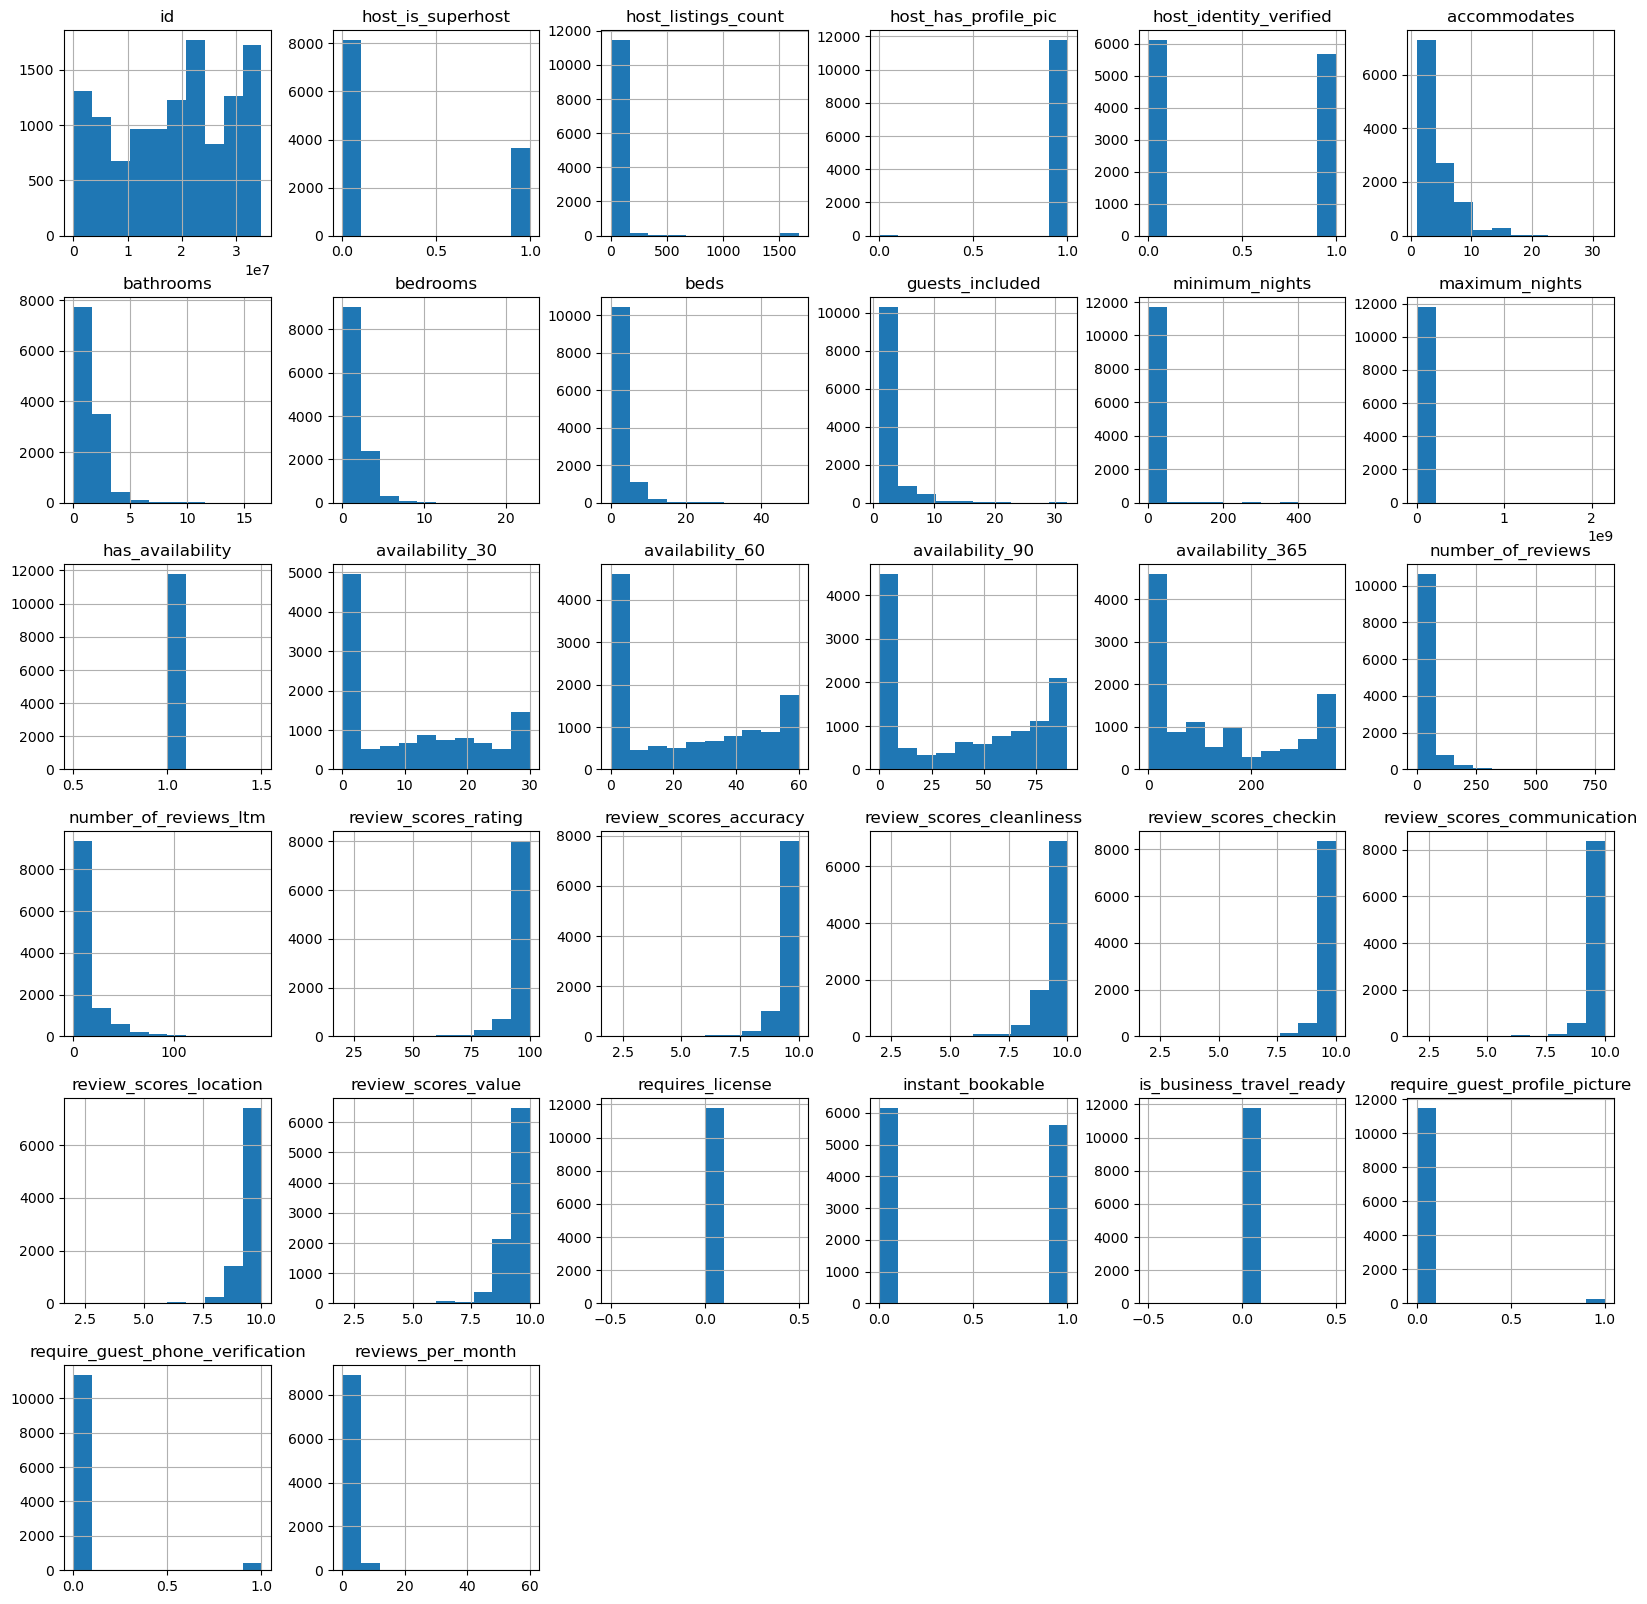

In [ ]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

From the above, it can be seen that several columns only contain one category and can be dropped:

In [ ]:
df.drop(['has_availability', 'host_has_profile_pic', 'is_business_travel_ready', 'require_guest_phone_verification', 'require_guest_profile_picture', 'requires_license'], axis=1, inplace=True)

In [ ]:
df.describe(exclude=[np.number])

experiences_offered  host_since host_response_time host_response_rate  \
count                11792       11789               8262               8262   
unique                   1        2731                  4                 46   
top                   none  2017-02-28     within an hour               100%   
freq                 11792          85               6320               6599   

                 hood property_type        room_type  bed_type amenities  \
count           10965         11792            11792     11792     11792   
unique             78            36                3         5     10876   
top     East Downtown         House  Entire home/apt  Real Bed        {}   
freq             1124          5670             8601     11642        68   

          price security_deposit cleaning_fee extra_people calendar_updated  \
count     11792             8308         9360        11792            11792   
unique      706              103          256           71               86   
top     $150.00            $0.00      $100.00        $0.00            today   
freq        432             2971          836         6938             2831   

       first_review last_review jurisdiction_names  \
count          9273        9273              11792   
unique         1791         927                  1   
top      2019-03-10  2019-05-05    {"Texas State"}   
freq             89         692              11792   

                cancellation_policy                    geometry  
count                         11792                       11792  
unique                            6                       11790  
top     strict_14_with_grace_period  POINT (-97.72354 30.25225)  
freq                           4486                           2

### Cleaning individual columns

Most listings offer no experiences so this feature can be dropped.

In [ ]:
df.experiences_offered.value_counts()

none    11792
Name: experiences_offered, dtype: int64

Also, Most listings offer same jurisdiction_names so this feature can be dropped.

In [ ]:
df.jurisdiction_names.value_counts()

{"Texas State"}    11792
Name: jurisdiction_names, dtype: int64

In [ ]:
df.drop(['jurisdiction_names', 'experiences_offered', 'calendar_updated'], axis = 1, inplace = True)

**host_since**

This is a datetime column, and will be converted into a measure of the number of days that a host has been on the platform, measured from the date that the data was scraped ***(2023, 8, 18)***. The original column will be left in initially for EDA, and dropped later.

In [ ]:
# Converting to datetime
df.host_since = pd.to_datetime(df.host_since)

# Calculating the number of days
df['host_days_active'] = (datetime(2023, 8, 18) - df.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())

# Replacing null values with the median
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Mean days as host: 3102.0
Median days as host: 3078.0


Because host_response_time is unknown for so many listings, it will be retained as its own category, 'unknown'.

In [ ]:
print("Null values:", df.host_response_time.isna().sum())
print(f"Proportion: {round((df.host_response_time.isna().sum()/len(df))*100, 1)}%")

# Number of rows without a value for host_response_time which have also not yet had a review
len(df[df.loc[ :,['host_response_time', 'first_review'] ].isnull().sum(axis=1) == 2])

Null values: 3530
Proportion: 29.9%


1566

In [ ]:
df.host_response_time.fillna("unknown", inplace=True)
df.host_response_time.value_counts(normalize=True)

within an hour        0.535957
unknown               0.299355
within a few hours    0.091333
within a day          0.063009
a few days or more    0.010346
Name: host_response_time, dtype: float64

Because about 70% of hosts respond 100% of the time, this will be kept as its own category, and other values will be grouped into bins.

In [ ]:
print("Null values:", df.host_response_rate.isna().sum())
print(f"Proportion: {round((df.host_response_rate.isna().sum()/len(df))*100, 1)}%")

Null values: 3530
Proportion: 29.9%


In [ ]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 96.0
Median host response rate: 100.0
Proportion of 100% host response rates: 79.9%


In [ ]:
#split a column-values into 4 parts
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100],
                               labels=['0-49%', '50-89%', '90-99%', '100%'],
                               include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

100%       6599
unknown    3530
50-89%      890
90-99%      590
0-49%       183
Name: host_response_rate, dtype: int64

In [ ]:
df.describe(exclude=[np.number])

/var/folders/km/nmzhq1351tq2fl9x8z8x1_nw0000gn/T/ipykernel_22936/2684435253.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude=[np.number])


host_since host_response_time host_response_rate  \
count                 11789              11792              11792   
unique                 2731                  5                  5   
top     2017-02-28 00:00:00     within an hour               100%   
freq                     85               6320               6599   
first   2008-03-03 00:00:00                NaN                NaN   
last    2019-05-13 00:00:00                NaN                NaN   

                 hood property_type        room_type  bed_type amenities  \
count           10965         11792            11792     11792     11792   
unique             78            36                3         5     10876   
top     East Downtown         House  Entire home/apt  Real Bed        {}   
freq             1124          5670             8601     11642        68   
first             NaN           NaN              NaN       NaN       NaN   
last              NaN           NaN              NaN       NaN       NaN   

          price security_deposit cleaning_fee extra_people first_review  \
count     11792             8308         9360        11792         9273   
unique      706              103          256           71         1791   
top     $150.00            $0.00      $100.00        $0.00   2019-03-10   
freq        432             2971          836         6938           89   
first       NaN              NaN          NaN          NaN          NaN   
last        NaN              NaN          NaN          NaN          NaN   

       last_review          cancellation_policy                    geometry  
count         9273                        11792                       11792  
unique         927                            6                       11790  
top     2019-05-05  strict_14_with_grace_period  POINT (-97.72354 30.25225)  
freq           692                         4486                           2  
first          NaN                          NaN                         NaN  
last           NaN                          NaN                         NaN

**property_type**

Some cleaning of property types is required as there are a large number of categories with only a few listings. The categories 'apartment', 'house' and 'other' will be used, as most properties can be classified as either apartments or houses.

In [ ]:
df.property_type.value_counts()

House                     5670
Apartment                 2904
Condominium                863
Guesthouse                 483
Townhouse                  415
Bungalow                   362
Guest suite                250
Serviced apartment         168
Loft                       136
Camper/RV                   94
Cottage                     64
Tiny house                  54
Villa                       51
Other                       49
Bed and breakfast           49
Cabin                       30
Resort                      29
Hostel                      21
Tent                        14
Aparthotel                  13
Boutique hotel              12
Farm stay                   10
Boat                         9
Campsite                     9
Yurt                         6
Tipi                         5
Hotel                        4
Treehouse                    3
Barn                         3
Dome house                   3
Houseboat                    3
Chalet                       2
Bus     

In [ ]:
# Replacing categories that are types of houses or apartments
df.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

**bathrooms, bedrooms and beds**

Missing values will be replaced with the median (to avoid strange fractions).

In [ ]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

**bed_type**

Most listings have the same bed type so this feature can be dropped.

In [ ]:
df.bed_type.value_counts()

Real Bed         11642
Futon               60
Airbed              52
Pull-out Sofa       26
Couch               12
Name: bed_type, dtype: int64

In [ ]:
df.drop('bed_type', axis=1, inplace=True)

**amenities**

Amenities is a list of additional features in the property, e.g. whether it has a TV or parking. Examples are below:

In [ ]:
# Example of amenities listed
df.amenities[:1].values

array(['{TV,Internet,Wifi,"Air conditioning",Kitchen,"Free parking on premises",Heating,"Smoke detector",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50","Self check-in",Keypad}'],
      dtype=object)

In [ ]:
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'Alfresco bathtub',
 'Amazon Echo',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Balcony',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Bidet',
 'Body soap',
 'Breakfast',
 'Breakfast table',
 'Brick oven',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling fan',
 'Ceiling hoist',
 'Central air conditioning',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Convection oven',
 'Cooking basics',
 'Crib',
 'DVD player',
 'Day bed',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Double oven',
 'Dryer',
 'EV charger',
 'Electric profiling bed',
 'Elevator',
 

In the list above, some amenities are more important than others (e.g. a balcony is more likely to increase price than a fax machine), and some are likely to be fairly uncommon (e.g. 'Electric profiling bed'). Based on previous experience working in the Airbnb property management industry, and research into which amenities are considered by guests to be more important, a selection of the more important amenities will be extracted. These will be further investigated in the EDA section. For example, if it turns out that almost all properties have/do not have a particular amenity, that feature will not be very useful in helping explain differences in prices.

In [ ]:
column_headers = len(list(df.columns))
print(column_headers)

42


The amenities chosen are:

In [ ]:
df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

/var/folders/km/nmzhq1351tq2fl9x8z8x1_nw0000gn/T/ipykernel_22936/1426836555.py:22: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1


One way to reduce the number of features (to avoid the curse of dimensionality) is to remove the amenities which add relatively little information, or are relatively unhelpful in differentiating between different listings. Amenity features where either the true or the false category contains fewer than 10% of listings will be removed.

In [ ]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,42:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df.iloc[:,43:].columns:
    if df[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)

['high_end_electronics', 'nature_and_views', 'host_greeting', 'smoking_allowed']


In [ ]:
df.price.isna().sum()

0

**price**

Price will be converted to an integer - currently it is a string because there is a currency sign.

In [ ]:
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')

**security_deposit**

As with price, this will be converted to an integer - currently it is a string because there is a currency sign.

Having a missing value for security deposit is functionally the same as having a security deposit of $0, so missing values will be replaced with 0.

In [ ]:
df.security_deposit.isna().sum()

3484

In [ ]:
df.security_deposit = df.security_deposit.str[1:-3]
df.security_deposit = df.security_deposit.str.replace(",", "")
df.security_deposit.fillna(0, inplace=True)
df.security_deposit = df.security_deposit.astype('int64')

**cleaning_fee**

As with price, this will be converted to an integer - currently it is a string because there is a currency sign.

As with security deposit, having a missing value for cleaning fee is functionally the same as having a cleaning fee of $0, so missing values will be replaced with 0.

In [ ]:
df.cleaning_fee.isna().sum()

2432

In [ ]:
df.cleaning_fee = df.cleaning_fee.str[1:-3]
df.cleaning_fee = df.cleaning_fee.str.replace(",", "")
df.cleaning_fee.fillna(0, inplace=True)
df.cleaning_fee = df.cleaning_fee.astype('int64')

**extra_people**

As with price, this will be converted to an integer - currently it is a string because there is a currency sign.

As with security deposit, having a missing value for extra people is functionally the same as having an extra people fee of $0, so missing values will be replaced with 0.

In [ ]:
df.extra_people = df.extra_people.str[1:-3]
df.extra_people = df.extra_people.str.replace(",", "")
df.extra_people.fillna(0, inplace=True)
df.extra_people = df.extra_people.astype('int64')

**availability**

There are multiple different measures of availability, which will be highly correlated with each other. Only one will be retained - for 90 days.

In [ ]:
df.drop(['availability_30', 'availability_60', 'availability_365'], axis=1, inplace=True)

**first_review and last_review**

About a quarter of listings have not had a review written for them. This is too large a proportion of the dataset to drop, and dropping the columns would lose a lot of useful information - reviews are very important in people's decisions to book, and therefore price.

This is also too large a proportion of the dataset to simply replace with median/mean values, as this would skew the distribution substantially. Also, the missing values here are not really missing values, as the fact that they are NaNs is meaningful - it tells us that these are new or previously unbooked listings that have not had reviews yet. In order to make the resulting model workable to predict prices for any Airbnb listing, including brand new listings, it is actually beneficial to keep them in. Therefore, these will be kept as an 'unknown' category, and the feature will have to be treated as categorical (and therefore one-hot encoded) rather than numerical.

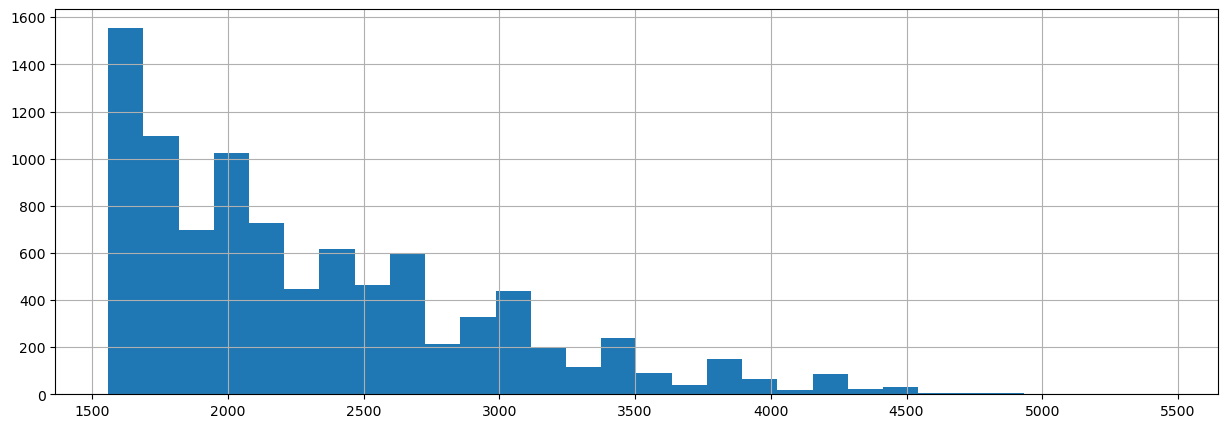

In [ ]:
df.first_review = pd.to_datetime(df.first_review) # Converting to datetime

# Calculating the number of days between the first review and the date the data was scraped
df['time_since_first_review'] = (datetime(2023, 8, 18) - df.first_review).astype('timedelta64[D]')
# Distribution of the number of days since first review
df.time_since_first_review.hist(figsize=(15,5), bins=30);

In [ ]:

def bin_column(col, bins, labels, na_label='unknown'):

    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [ ]:
# splitting time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(df.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

The same process will be followed for last_review:

In [ ]:
df.last_review = pd.to_datetime(df.last_review) # Converting to datetime

# Calculating the number of days between the most recent review and the date the data was scraped
df['time_since_last_review'] = (datetime(2023, 8, 18) - df.last_review).astype('timedelta64[D]')

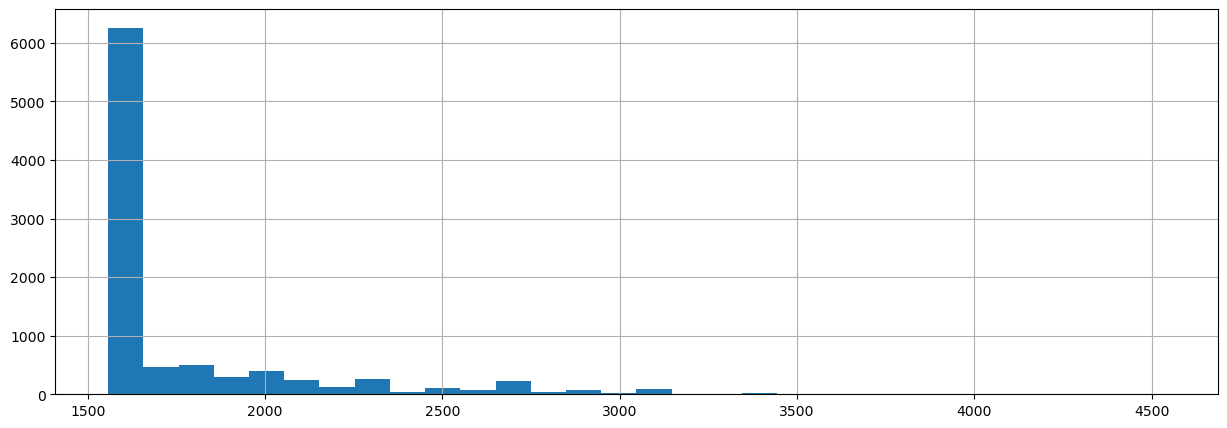

In [ ]:
# Distribution of the number of days since last review
df.time_since_last_review.hist(figsize=(15,5), bins=30);

In [ ]:
# splitting time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(df.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

In [ ]:
# Dropping last_review - first_review will be kept for EDA and dropped later
df.drop('last_review', axis=1, inplace=True)

**review ratings columns**

As above, listings without reviews will be kept and replaced with 'unknown'. Other ratings will be grouped into bins. The histograms below were produced in order to decide on useful bins.

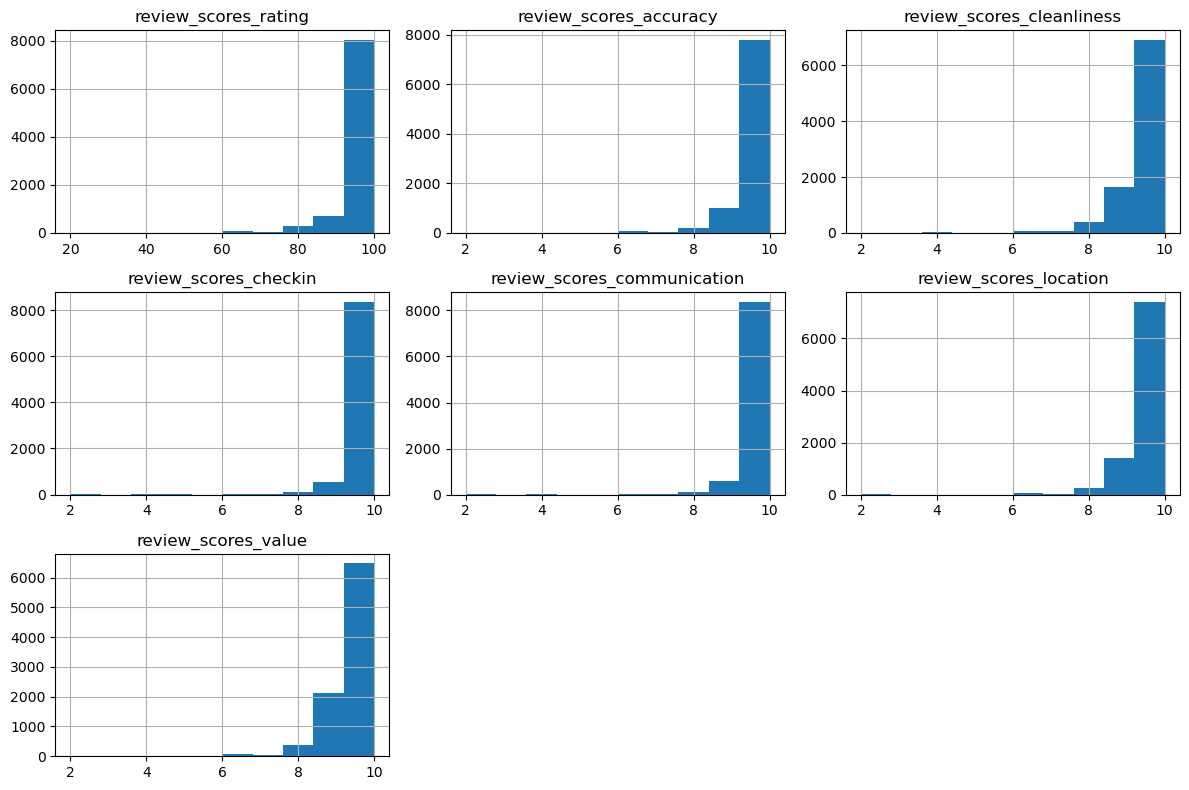

In [ ]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

The majority of ratings are 9 or 10 out of 10, as also seen in the histograms above.
Therefore for these columns, 9/10 and 10/10 will be kept as separate groups, and 1-8/10 will be grouped together.

In [ ]:
variables_to_plot.pop(0) #the only column that is not out of 10 -> review scores rating

for col in variables_to_plot:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label='no reviews')

bin_column('review_scores_rating',
           bins=[0, 80, 95, 100],
           labels=['0-79/100', '80-94/100', '95-100/100'],
           na_label='no reviews')

In [ ]:
df.describe(exclude=[np.number])

/var/folders/km/nmzhq1351tq2fl9x8z8x1_nw0000gn/T/ipykernel_22936/2684435253.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude=[np.number])
/var/folders/km/nmzhq1351tq2fl9x8z8x1_nw0000gn/T/ipykernel_22936/2684435253.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude=[np.number])


host_since host_response_time host_response_rate  \
count                 11789              11792              11792   
unique                 2731                  5                  5   
top     2017-02-28 00:00:00     within an hour               100%   
freq                     85               6320               6599   
first   2008-03-03 00:00:00                NaN                NaN   
last    2019-05-13 00:00:00                NaN                NaN   

                 hood property_type        room_type         first_review  \
count           10965         11792            11792                 9273   
unique             78             3                3                 1791   
top     East Downtown         House  Entire home/apt  2019-03-10 00:00:00   
freq             1124          6619             8601                   89   
first             NaN           NaN              NaN  2008-09-13 00:00:00   
last              NaN           NaN              NaN  2019-05-13 00:00:00   

       review_scores_rating review_scores_accuracy review_scores_cleanliness  \
count                 11792                  11792                     11792   
unique                    4                      4                         4   
top              95-100/100                  10/10                     10/10   
freq                   6829                   7795                      6902   
first                   NaN                    NaN                       NaN   
last                    NaN                    NaN                       NaN   

       review_scores_checkin review_scores_communication  \
count                  11792                       11792   
unique                     4                           4   
top                    10/10                       10/10   
freq                    8364                        8382   
first                    NaN                         NaN   
last                     NaN                         NaN   

       review_scores_location review_scores_value  \
count                   11792               11792   
unique                      4                   4   
top                     10/10               10/10   
freq                     7414                6480   
first                     NaN                 NaN   
last                      NaN                 NaN   

                cancellation_policy                    geometry  \
count                         11792                       11792   
unique                            6                       11790   
top     strict_14_with_grace_period  POINT (-97.72354 30.25225)   
freq                           4486                           2   
first                           NaN                         NaN   
last                            NaN                         NaN   

       time_since_first_review time_since_last_review  
count                    11792                  11792  
unique                       2                      2  
top                   4+ years                1+ year  
freq                      9273                   9273  
first                      NaN                    NaN  
last                       NaN                    NaN

In [ ]:
df.cancellation_policy.value_counts()

strict_14_with_grace_period    4486
flexible                       3813
moderate                       3257
super_strict_30                 225
super_strict_60                   7
strict                            4
Name: cancellation_policy, dtype: int64

**cancellation_policy**

Some cleaning of cancellation policy types is required, in order to categorise the four very small categories into the three larger categories (e.g. the super strict options are only available to long-term Airbnb hosts, and is invitation only).

In [ ]:
# Replacing categories
df.cancellation_policy.replace({
    'super_strict_30': 'strict_14_with_grace_period',
    'super_strict_60': 'strict_14_with_grace_period',
    'strict': 'strict_14_with_grace_period',
    'luxury_moderate': 'moderate'
    }, inplace=True)

In [ ]:
column_headers = list(df.columns)
print(column_headers)
print(len(column_headers))

['id', 'host_since', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_identity_verified', 'hood', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_90', 'number_of_reviews', 'number_of_reviews_ltm', 'first_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy', 'reviews_per_month', 'geometry', 'host_days_active', 'check_in_24h', 'air_conditioning', 'bbq', 'balcony', 'bed_linen', 'breakfast', 'tv', 'coffee_machine', 'cooking_basics', 'white_goods', 'elevator', 'gym', 'child_friendly', 'parking', 'outdoor_space', 'hot_tub_sauna_or_pool', 'internet', 'long_term_stays', 'pets_allowed', 'private_entrance', 'secure

**number_of_reviews_ltm and reviews_per_month**

These will be highly correlated with number_of_reviews and so will be dropped.

In [ ]:
df.drop(['number_of_reviews_ltm', 'reviews_per_month'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11792 entries, 0 to 11791
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           11792 non-null  int64         
 1   host_since                   11789 non-null  datetime64[ns]
 2   host_response_time           11792 non-null  object        
 3   host_response_rate           11792 non-null  object        
 4   host_is_superhost            11789 non-null  float64       
 5   host_listings_count          11789 non-null  float64       
 6   host_identity_verified       11789 non-null  float64       
 7   hood                         10965 non-null  object        
 8   property_type                11792 non-null  object        
 9   room_type                    11792 non-null  object        
 10  accommodates                 11792 non-null  int64         
 11  bathrooms                    11792 non-nu

**Save cleaned Dataset**

Save the cleaned data set, in case it was needed to use it again.


In [ ]:
#Save cleaned Dataset
with open('Cleaned_df', 'wb') as f:
    pickle.dump(df, f)

# **Exploratory data analysis**

### Read Cleaned Dataset

In [ ]:
with open('Cleaned_df', 'rb') as f:
    df = pickle.load(f)
df

id host_since  host_response_time host_response_rate  \
0          1078 2013-01-08      within an hour               100%   
1          2265 2008-08-23  within a few hours               100%   
2          5245 2008-08-23  within a few hours               100%   
3          5456 2009-02-16  within a few hours               100%   
4          5769 2009-02-19      within an hour               100%   
...         ...        ...                 ...                ...   
11787  34687636 2019-05-13             unknown            unknown   
11788  34687994 2015-11-10             unknown            unknown   
11789  34689047 2017-06-11             unknown            unknown   
11790  34693490 2019-05-01             unknown            unknown   
11791  34698024 2010-10-01             unknown            unknown   

       host_is_superhost  host_listings_count  host_identity_verified  \
0                    1.0                  3.0                     1.0   
1                    1.0                  3.0                     1.0   
2                    1.0                  3.0                     1.0   
3                    1.0                  1.0                     1.0   
4                    1.0                  1.0                     1.0   
...                  ...                  ...                     ...   
11787                0.0                  1.0                     0.0   
11788                0.0                  2.0                     1.0   
11789                0.0                  2.0                     0.0   
11790                0.0                  1.0                     0.0   
11791                0.0                  1.0                     1.0   

                      hood property_type        room_type  ...  internet  \
0      University of Texas         Other  Entire home/apt  ...       1.0   
1            East Downtown         House  Entire home/apt  ...       1.0   
2            East Downtown         House     Private room  ...       1.0   
3            East Downtown         Other  Entire home/apt  ...       1.0   
4        SW Williamson Co.         House     Private room  ...       1.0   
...                    ...           ...              ...  ...       ...   
11787               Zilker         House     Private room  ...       1.0   
11788              Hancock     Apartment     Private room  ...       1.0   
11789                  NaN         House     Private room  ...       1.0   
11790       South Congress     Apartment  Entire home/apt  ...       1.0   
11791  University of Texas     Apartment  Entire home/apt  ...       1.0   

       long_term_stays  pets_allowed  private_entrance  secure  self_check_in  \
0                  0.0           0.0               0.0     0.0            1.0   
1                  0.0           1.0               1.0     0.0            1.0   
2                  0.0           1.0               0.0     0.0            0.0   
3                  1.0           1.0               1.0     0.0            0.0   
4                  0.0           1.0               0.0     0.0            0.0   
...                ...           ...               ...     ...            ...   
11787              0.0           0.0               1.0     0.0            0.0   
11788              0.0           0.0               0.0     0.0            0.0   
11789              0.0           0.0               0.0     0.0            0.0   
11790              0.0           0.0               1.0     0.0            0.0   
11791              0.0           0.0               1.0     0.0            0.0   

       accessible  event_suitable  time_since_first_review  \
0             0.0             0.0                 4+ years   
1             0.0             0.0                 4+ years   
2             0.0             0.0                 4+ years   
3             0.0             0.0                 4+ years   
4             0.0             0.0                 4+ years   
...           ...             ...                

**Time Series**

Time is an important factor to consider in a model when we wish to predict prices or trends. Enter time series. A time series is simply a series of data points ordered in time. In a time series, time is often the independent variable and the goal is usually to make a forecast for the future. There are also other questions that come to play when dealing with time series. For example: Is there any seasonality to the price? Is it stationary? Even though we may not be able to include this aspect into our model, it is good to explore it to be aware of it and be able to make recommendations for future research. Thus, in this section, we will explore this aspect of the data.

A high level of seasonality is evident, with notable peaks at the beginning of each year when people put properties online to take advantage of the increased number of tourists in the New Year holidays.

In [ ]:
print(f"Of the Airbnb hosts that are still listing on the site, the first joined on {min(df.host_since).strftime('%d %B %Y')}, and the most recent joined on {max(df.host_since).strftime('%d %B %Y')}.")

Of the Airbnb hosts that are still listing on the site, the first joined on 03 March 2008, and the most recent joined on 13 May 2019.


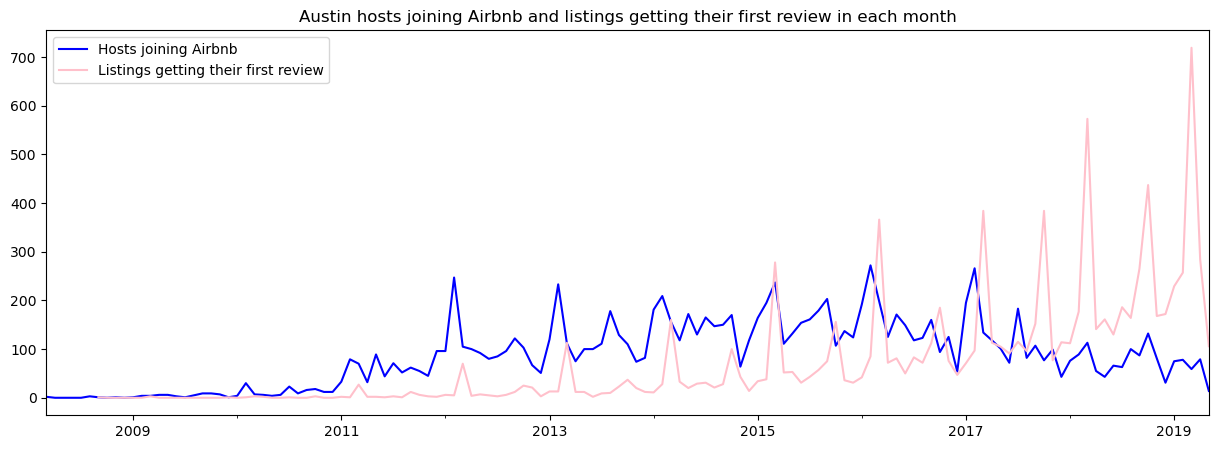

In [ ]:
plt.figure(figsize=(15,5))
df.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='blue')
df.set_index('first_review').resample('MS').size().plot(label='Listings getting their first review', color='pink')
plt.title('Austin hosts joining Airbnb and listings getting their first review in each month')
plt.legend()
plt.xlim('2008-03-03', '2019-05-13') # Limiting to whole months
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
# Creating dataframes for time series analysis
ts_host_since = pd.DataFrame(df.set_index('host_since').resample('MS').size())
ts_first_review = pd.DataFrame(df.set_index('first_review').resample('MS').size())

# Renaming columns
ts_host_since = ts_host_since.rename(columns={0: 'hosts'})
ts_host_since.index.rename('month', inplace=True)
ts_first_review = ts_first_review.rename(columns={0: 'reviews'})
ts_first_review.index.rename('month', inplace=True)

In [ ]:
def decompose_time_series(df, title=''):
    """
    Plots the original time series and its decomposition into trend, seasonal and residual.
    """
    # Decomposing the time series
    decomposition = seasonal_decompose(df)

    # Getting the trend, seasonality and noise
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plotting the original time series and the decomposition
    plt.figure(figsize=(12,8))
    plt.suptitle(title, fontsize=14, y=1)
    plt.subplots_adjust(top=0.80)
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')
    plt.tight_layout()

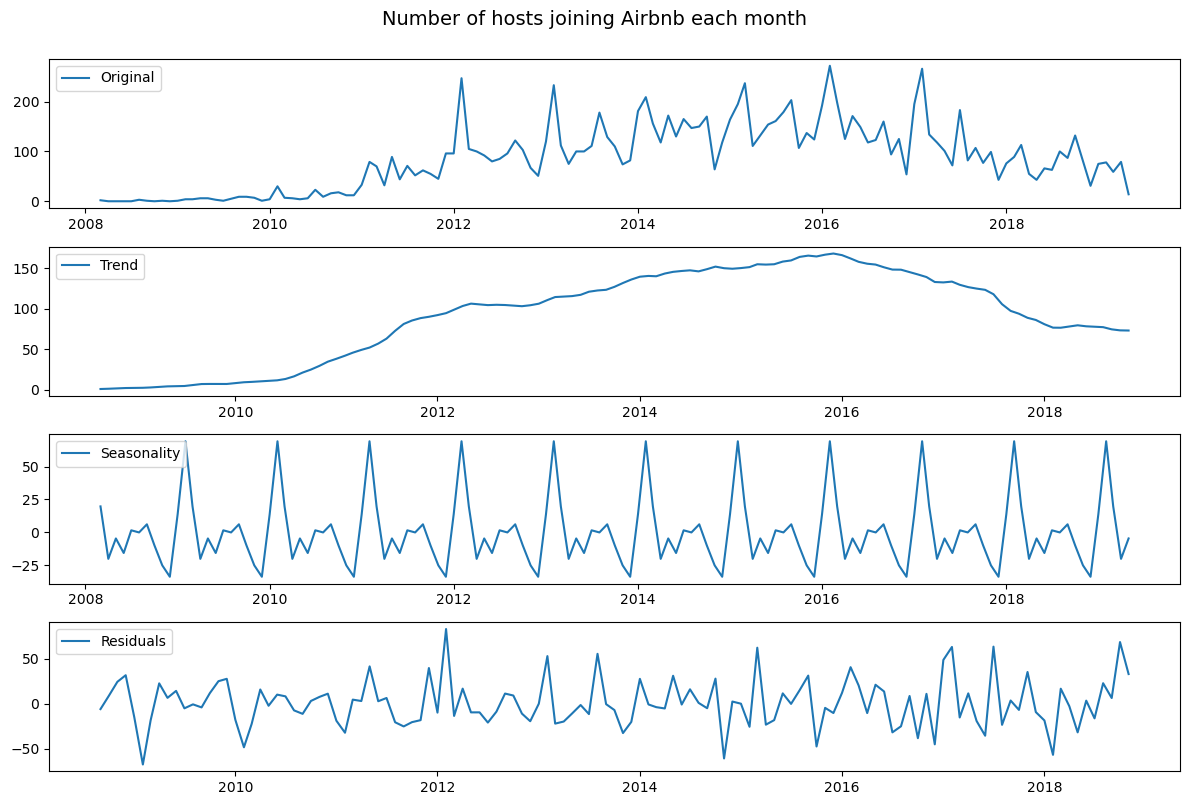

In [ ]:
decompose_time_series(ts_host_since, title='Number of hosts joining Airbnb each month')

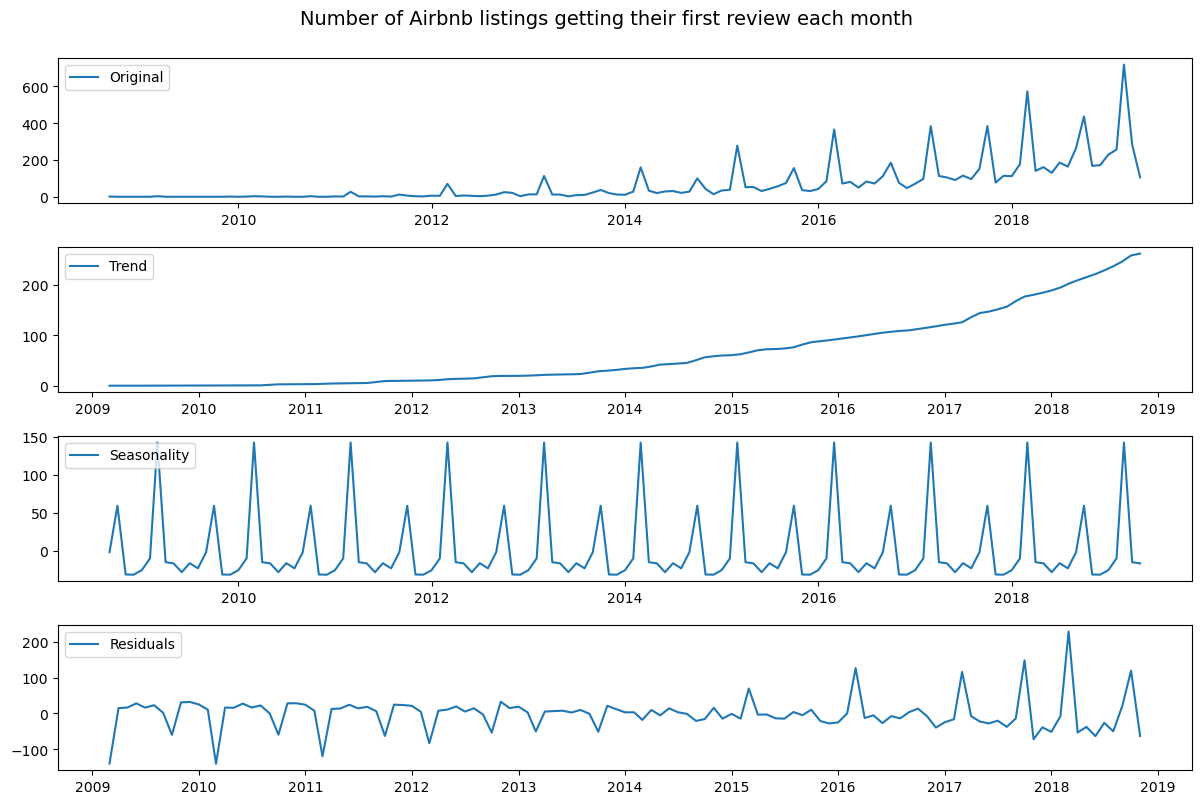

In [ ]:
decompose_time_series(ts_first_review, title='Number of Airbnb listings getting their first review each month')

As seen above, there is a clear seasonality. Every year, you see a peak in hosts joining at the beginning of the year (new-year holidays), and the lowest points are at the end of each year.

**host_listings_count**

Another important pattern to observe is the number of listings per owner/host. There are a number of professional Airbnb management companies which host a large number of listings under a single host profile. However, there is no consistent upwards trend in the average number of properties managed by each host.

/Users/shaghayeghsharifian/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/shaghayeghsharifian/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


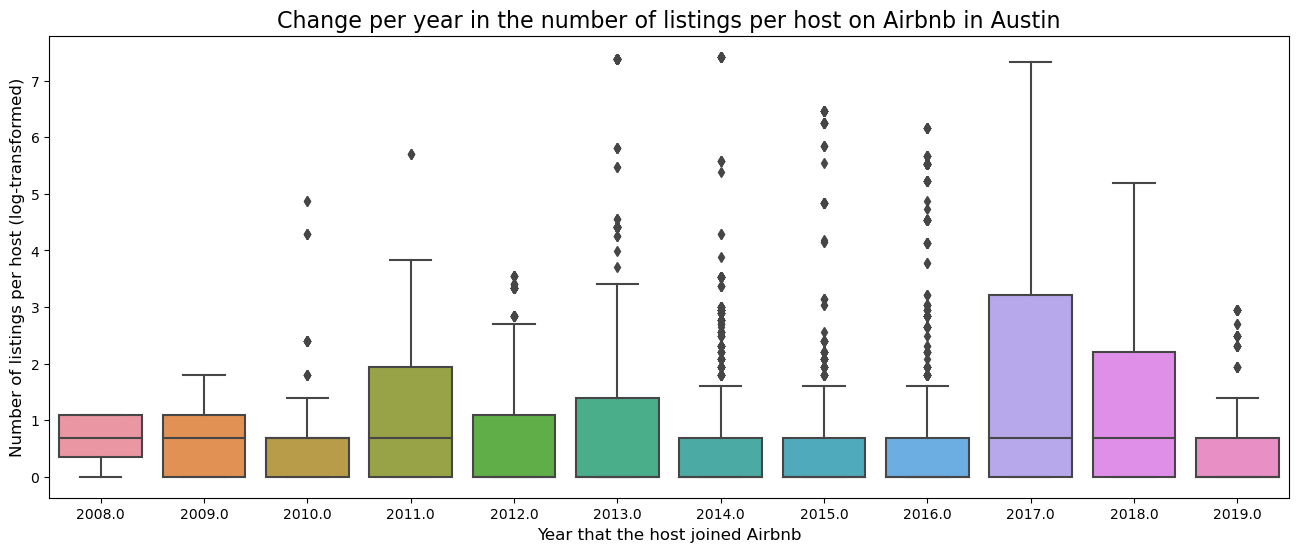

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(df.host_since.dt.year, np.log(df.host_listings_count))
plt.xlabel('Year that the host joined Airbnb', fontsize=12)
plt.ylabel('Number of listings per host (log-transformed)', fontsize=12)
plt.title('Change per year in the number of listings per host on Airbnb in Austin', fontsize=16)
plt.show()

In [ ]:
print("Average number of listings per host per year on Airbnb in Austin:")
print(round(df.set_index('host_since').host_listings_count.resample('YS').mean(),2))

Average number of listings per host per year on Airbnb in Austin:
host_since
2008-01-01     2.14
2009-01-01     2.21
2010-01-01     6.19
2011-01-01     8.00
2012-01-01     3.44
2013-01-01    89.92
2014-01-01    25.81
2015-01-01    12.17
2016-01-01    16.29
2017-01-01    98.26
2018-01-01    16.50
2019-01-01     3.42
Name: host_listings_count, dtype: float64


In [ ]:
# List of the largest host_listings_count and the year the host joined Airbnb
df.sort_values('host_listings_count').drop_duplicates('host_listings_count',keep='last').tail(10)[['host_since', 'host_listings_count']]

host_since  host_listings_count
5650  2017-04-03                314.0
7243  2013-10-08                332.0
7324  2015-04-14                349.0
7272  2016-10-21                472.0
7299  2015-11-16                516.0
11600 2015-04-07                641.0
8147  2017-02-01               1522.0
8171  2013-02-04               1614.0
10029 2014-01-03               1677.0
10386        NaT                  NaN

/Users/shaghayeghsharifian/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/shaghayeghsharifian/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


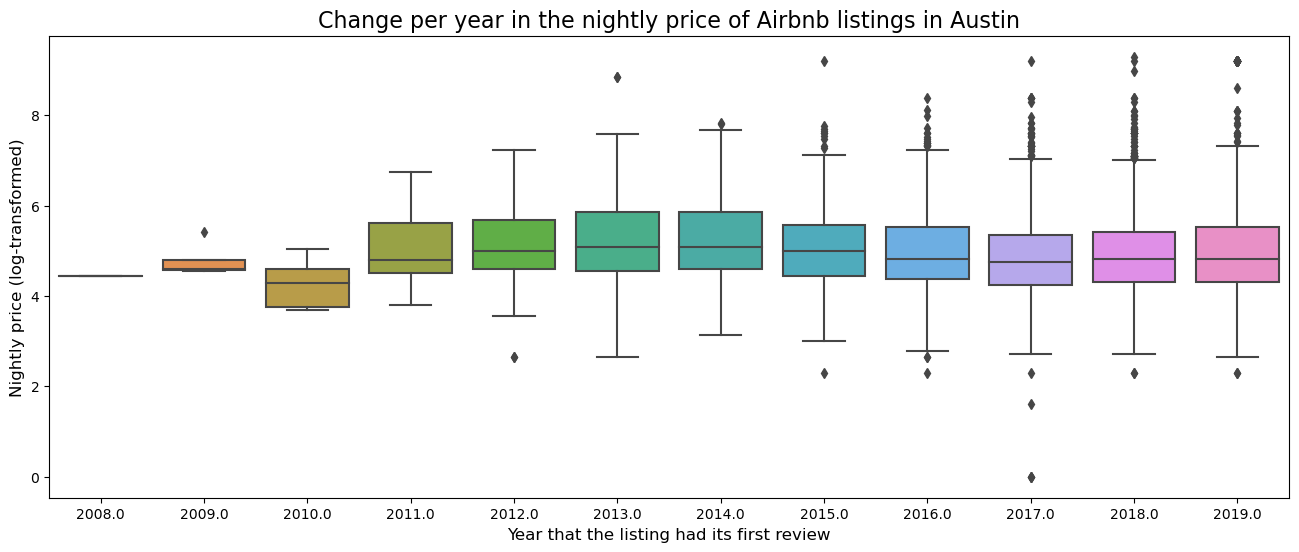

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(df.first_review.dt.year, np.log(df.price))
plt.xlabel('Year that the listing had its first review', fontsize=12)
plt.ylabel('Nightly price (log-transformed)', fontsize=12)
plt.title('Change per year in the nightly price of Airbnb listings in Austin', fontsize=16)
plt.show()

In [ ]:
print("Mean nightly price of listings in each year on Airbnb in Austin:")
print(round(df.set_index('first_review').price.resample('YS').mean(),2))

Mean nightly price of listings in each year on Airbnb in Austin:
first_review
2008-01-01     85.00
2009-01-01    129.75
2010-01-01     78.40
2011-01-01    202.76
2012-01-01    251.06
2013-01-01    311.51
2014-01-01    289.39
2015-01-01    244.19
2016-01-01    226.92
2017-01-01    225.43
2018-01-01    237.83
2019-01-01    514.67
Name: price, dtype: float64


In [ ]:
# List of the largest host_listings_count and the year the host joined Airbnb
df.sort_values('host_listings_count').drop_duplicates('host_listings_count',keep='last').tail(10)[['host_since', 'host_listings_count']]

host_since  host_listings_count
5650  2017-04-03                314.0
7243  2013-10-08                332.0
7324  2015-04-14                349.0
7272  2016-10-21                472.0
7299  2015-11-16                516.0
11600 2015-04-07                641.0
8147  2017-02-01               1522.0
8171  2013-02-04               1614.0
10029 2014-01-03               1677.0
10386        NaT                  NaN

/Users/shaghayeghsharifian/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/shaghayeghsharifian/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


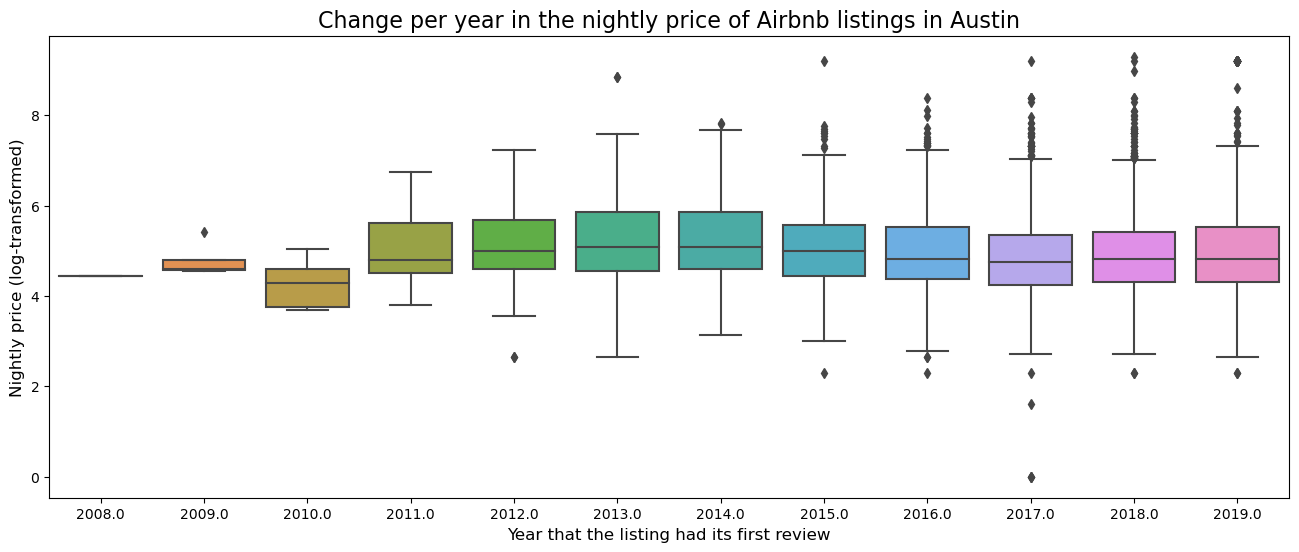

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(df.first_review.dt.year, np.log(df.price))
plt.xlabel('Year that the listing had its first review', fontsize=12)
plt.ylabel('Nightly price (log-transformed)', fontsize=12)
plt.title('Change per year in the nightly price of Airbnb listings in Austin', fontsize=16)
plt.show()

In [ ]:
print("Mean nightly price of listings in each year on Airbnb in London:")
print(round(df.set_index('first_review').price.resample('YS').mean(),2))

Mean nightly price of listings in each year on Airbnb in London:
first_review
2008-01-01     85.00
2009-01-01    129.75
2010-01-01     78.40
2011-01-01    202.76
2012-01-01    251.06
2013-01-01    311.51
2014-01-01    289.39
2015-01-01    244.19
2016-01-01    226.92
2017-01-01    225.43
2018-01-01    237.83
2019-01-01    514.67
Name: price, dtype: float64


In [ ]:
# Dropping host_since and first_review as they are no longer needed
df.drop(['host_since', 'first_review'], axis=1, inplace=True)

In [ ]:
df.describe()

id  host_is_superhost  host_listings_count  \
count  1.179200e+04       11789.000000         11789.000000   
mean   1.850189e+07           0.309611            33.840444   
std    1.043100e+07           0.462353           190.751678   
min    1.078000e+03           0.000000             0.000000   
25%    9.531644e+06           0.000000             1.000000   
50%    2.009422e+07           0.000000             1.000000   
75%    2.788003e+07           1.000000             3.000000   
max    3.469802e+07           1.000000          1677.000000   

       host_identity_verified  accommodates     bathrooms      bedrooms  \
count            11789.000000  11792.000000  11792.000000  11792.000000   
mean                 0.481720      4.627714      1.543207      1.792826   
std                  0.499687      3.132010      0.881627      1.267833   
min                  0.000000      1.000000      0.000000      0.000000   
25%                  0.000000      2.000000      1.000000      1.000000   
50%                  0.000000      4.000000      1.000000      1.000000   
75%                  1.000000      6.000000      2.000000      2.000000   
max                  1.000000     32.000000     16.500000     23.000000   

               beds         price  security_deposit  ...  outdoor_space  \
count  11792.000000  11792.000000      11792.000000  ...   11792.000000   
mean       2.512636    337.985414        214.724898  ...       0.202934   
std        2.326502    853.709939        476.714126  ...       0.402201   
min        0.000000      0.000000          0.000000  ...       0.000000   
25%        1.000000     80.000000          0.000000  ...       0.000000   
50%        2.000000    149.000000          0.000000  ...       0.000000   
75%        3.000000    300.000000        250.000000  ...       0.000000   
max       50.000000  13229.000000       5100.000000  ...       1.000000   

       hot_tub_sauna_or_pool      internet  long_term_stays  pets_allowed  \
count           11792.000000  11792.000000     11792.000000  11792.000000   
mean                0.308853      0.969725         0.238043      0.301645   
std                 0.462040      0.171350         0.425903      0.458992   
min                 0.000000      0.000000         0.000000      0.000000   
25%                 0.000000      1.000000         0.000000      0.000000   
50%                 0.000000      1.000000         0.000000      0.000000   
75%                 1.000000      1.000000         0.000000      1.000000   
max                 1.000000      1.000000         1.000000      1.000000   

       private_entrance        secure  self_check_in    accessible  \
count      11792.000000  11792.000000   11792.000000  11792.000000   
mean           0.354647      0.138399       0.406716      0.131699   
std            0.478427      0.345333       0.491242      0.338178   
min            0.000000      0.000000       0.000000      0.000000   
25%            0.000000      0.000000       0.000000      0.000000   
50%            0.000000      0.000000       0.000000      0.000000   
75%            1.000000      0.000000       1.000000      0.000000   
max            1.000000      1.000000       1.000000      1.000000   

       event_suitable  
count    11792.000000  
mean         0.105580  
std          0.307312  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  

[8 rows x 43 columns]

Looking at price distribution, advertised prices range from 0 to $13229. The extreme ends of the range are due to hosts not understanding how to use Airbnb advertised prices correctly. The advertised prices can be set to any arbitrary amount, and these are the prices that show when dates are not entered on the site. Once you enter the dates you want to occupy the property, prices can vary a lot.

In [ ]:
print(f"Nightly advertised prices range from ${min(df.price)} to ${max(df.price)}.")

Nightly advertised prices range from £0 to £13229.


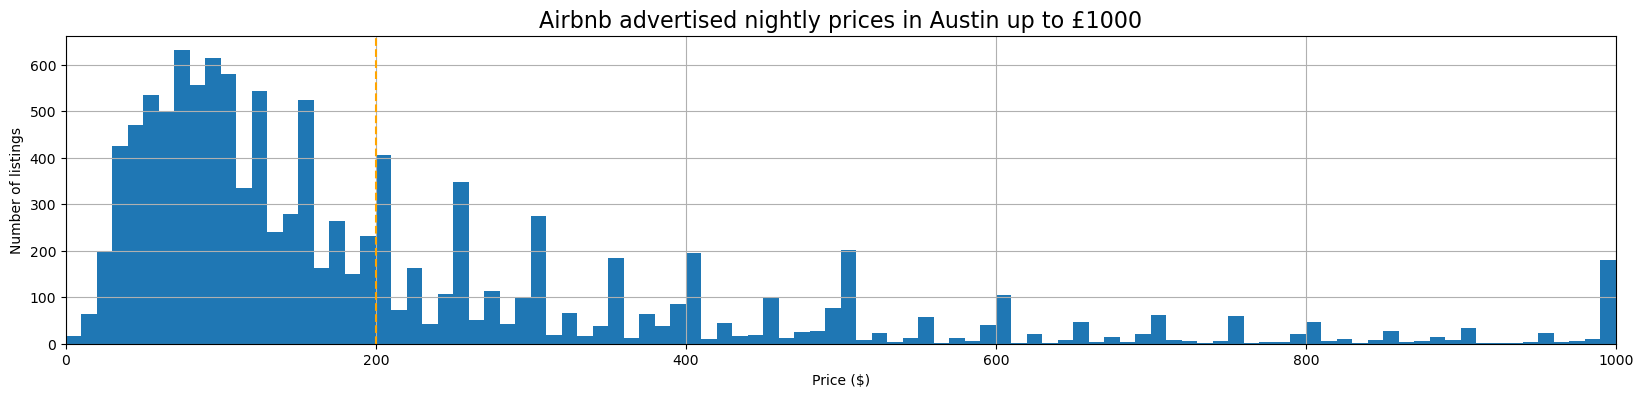

In [ ]:
# Distribution of prices from £0 to £1000
plt.figure(figsize=(20,4))
df.price.hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(200, color='orange', linestyle='--')
plt.title("Airbnb advertised nightly prices in Austin up to £1000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

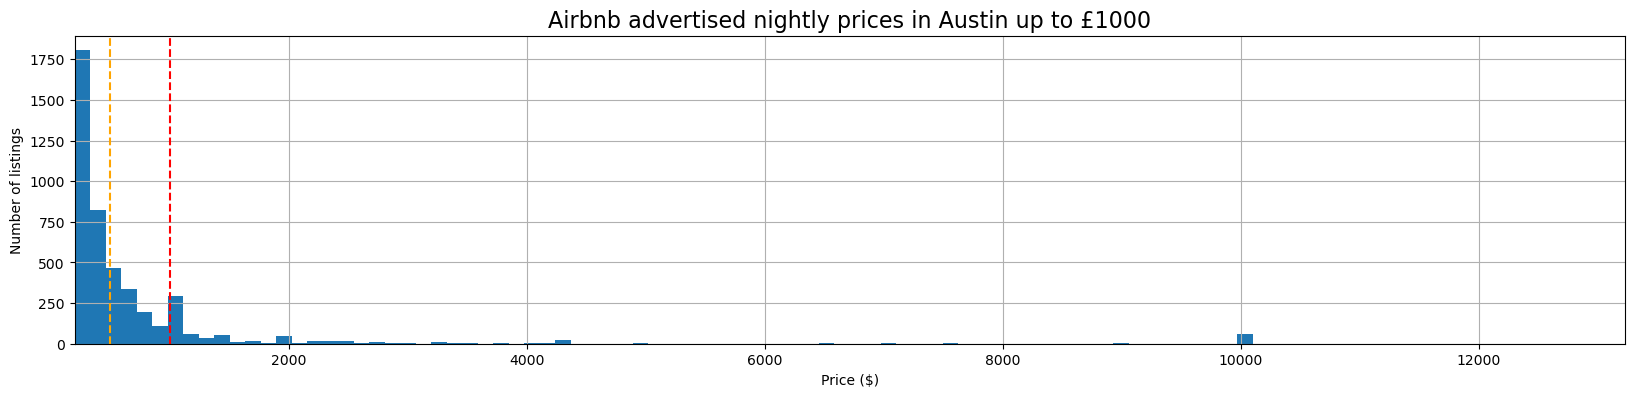

In [ ]:
# Distribution of prices from £200 upwards
plt.figure(figsize=(20,4))
df.price.hist(bins=100, range=(200, max(df.price)))
plt.margins(x=0)
plt.axvline(500, color='orange', linestyle='--')
plt.axvline(1000, color='red', linestyle='--')
plt.title("Airbnb advertised nightly prices in Austin up to £1000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

In [ ]:
# Replacing values under $10 with $10
df.loc[df.price <= 10, 'price'] = 10

# Replacing values over $1000 with $1000
df.loc[df.price >= 1000, 'price'] = 1000

In [ ]:
df

id  host_response_time host_response_rate  host_is_superhost  \
0          1078      within an hour               100%                1.0   
1          2265  within a few hours               100%                1.0   
2          5245  within a few hours               100%                1.0   
3          5456  within a few hours               100%                1.0   
4          5769      within an hour               100%                1.0   
...         ...                 ...                ...                ...   
11787  34687636             unknown            unknown                0.0   
11788  34687994             unknown            unknown                0.0   
11789  34689047             unknown            unknown                0.0   
11790  34693490             unknown            unknown                0.0   
11791  34698024             unknown            unknown                0.0   

       host_listings_count  host_identity_verified                 hood  \
0                      3.0                     1.0  University of Texas   
1                      3.0                     1.0        East Downtown   
2                      3.0                     1.0        East Downtown   
3                      1.0                     1.0        East Downtown   
4                      1.0                     1.0    SW Williamson Co.   
...                    ...                     ...                  ...   
11787                  1.0                     0.0               Zilker   
11788                  2.0                     1.0              Hancock   
11789                  2.0                     0.0                  NaN   
11790                  1.0                     0.0       South Congress   
11791                  1.0                     1.0  University of Texas   

      property_type        room_type  accommodates  ...  internet  \
0             Other  Entire home/apt             2  ...       1.0   
1             House  Entire home/apt             4  ...       1.0   
2             House     Private room             2  ...       1.0   
3             Other  Entire home/apt             3  ...       1.0   
4             House     Private room             2  ...       1.0   
...             ...              ...           ...  ...       ...   
11787         House     Private room             2  ...       1.0   
11788     Apartment     Private room             1  ...       1.0   
11789         House     Private room             1  ...       1.0   
11790     Apartment  Entire home/apt             3  ...       1.0   
11791     Apartment  Entire home/apt             2  ...       1.0   

       long_term_stays  pets_allowed  private_entrance  secure  self_check_in  \
0                  0.0           0.0               0.0     0.0            1.0   
1                  0.0           1.0               1.0     0.0            1.0   
2                  0.0           1.0               0.0     0.0            0.0   
3                  1.0           1.0               1.0     0.0            0.0   
4                  0.0           1.0               0.0     0.0            0.0   
...                ...           ...               ...     ...            ...   
11787              0.0           0.0               1.0     0.0            0.0   
11788              0.0           0.0               0.0     0.0            0.0   
11789              0.0           0.0               0.0     0.0            0.0   
11790              0.0           0.0               1.0     0.0            0.0   
11791              0.0           0.0               1.0     0.0            0.0   

       accessible  event_suitable  time_since_first_review  \
0             0.0             0.0                 4+ years   
1             0.0             0.0                 4+ years   
2             0.0             0.0                 4+ years   
3             0.0             0.0                 4+ years   
4             0.0             0.0                 4+ years   
...          

**host_listings_count**

The median number of listings that the host of each listing has is 1. This means that on average (median) each listing is hosted by a host who only manages that listing. The mean is higher (34) due to some hosts managing some (very) large numbers of listings, as discussed above in the Time Series section. About half of listings are from hosts with one listing, and half are from multi-listing hosts.

In [ ]:
print("Median number of listings per host:", int(df.host_listings_count.median()))
print("Mean number of listings per host:", int(round(df.host_listings_count.mean())))
print(f"{int(round(100*len(df[df.host_listings_count == 1])/len(df)))}% of listings are from hosts with one listing.")

Median number of listings per host: 1
Mean number of listings per host: 34
54% of listings are from hosts with one listing.


**Number of people accommodated, bathrooms, bedrooms, and beds**

The most common property setup sleeps two people in one bed in one bedroom, with one bathroom. Unsurprisingly, properties that accommodate more people achieve noticeably higher rates per night, with diminishing returns coming after about 10 people.

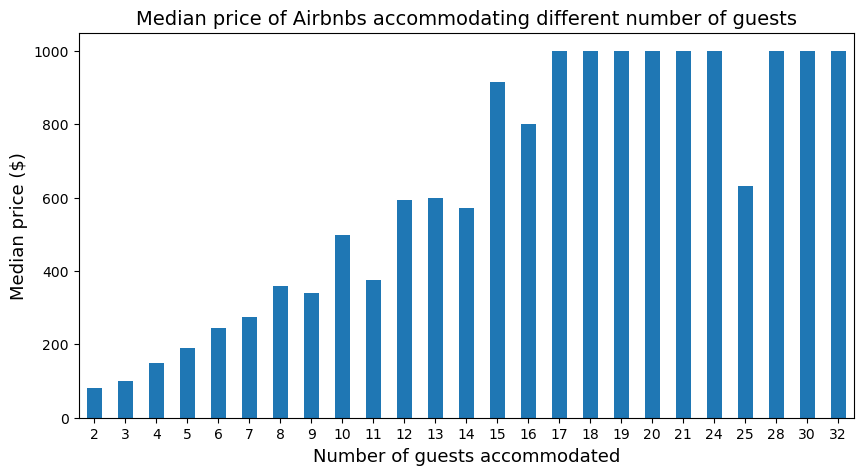

In [ ]:
plt.figure(figsize=(10,5))
df.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price ($)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

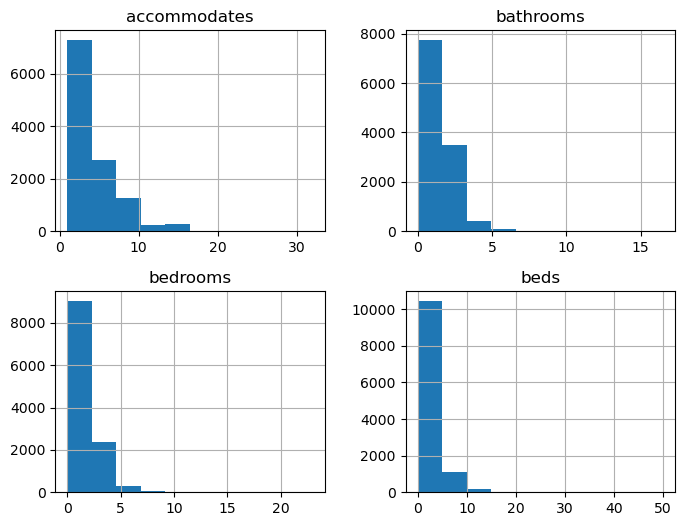

In [ ]:
df[['accommodates', 'bathrooms', 'bedrooms', 'beds']].hist(figsize=(8,6));

In [ ]:
df.hood.value_counts()

East Downtown          1124
Downtown                640
Travis Heights          484
University of Texas     411
Zilker                  388
                       ... 
Mesa Park                17
Walnut Creek             12
Cat Mountian             11
Gateway                  10
Canyon Mesa               5
Name: hood, Length: 78, dtype: int64

# **Categorical features**

Categorical features will be explored and plotted, to gain insights and to determine whether or not they should be included in the final model.

In [ ]:
# Renaming the neighbourhood column
df.rename(columns={'hood': 'borough'}, inplace=True)

# Importing the Austin borough boundary GeoJSON file as a dataframe in geopandas
map_df = gpd.read_file('austin.geojson')
map_df.head()

name  cartodb_id                       created_at  \
0      Blackland           1 2013-02-17 09:28:09.692000+00:00   
1  Bouldin Creek           2 2013-02-17 09:28:09.692000+00:00   
2      Brentwood           3 2013-02-17 09:28:09.692000+00:00   
3     Cherrywood           4 2013-02-17 09:28:09.692000+00:00   
4       Chestnut           5 2013-02-17 09:28:09.692000+00:00   

                        updated_at  \
0 2013-02-17 09:28:09.956000+00:00   
1 2013-02-17 09:28:09.956000+00:00   
2 2013-02-17 09:28:09.956000+00:00   
3 2013-02-17 09:28:09.956000+00:00   
4 2013-02-17 09:28:09.956000+00:00   

                                            geometry  
0  MULTIPOLYGON (((-97.72409 30.27926, -97.72514 ...  
1  MULTIPOLYGON (((-97.75962 30.24211, -97.76031 ...  
2  MULTIPOLYGON (((-97.72354 30.33038, -97.72371 ...  
3  MULTIPOLYGON (((-97.70711 30.28920, -97.70700 ...  
4  MULTIPOLYGON (((-97.71991 30.27379, -97.72010 ...

In [ ]:
# Creating a dataframe of listing counts and median price by borough
borough_df = pd.DataFrame(df.groupby('borough').size())
borough_df.rename(columns={0: 'number_of_listings'}, inplace=True)
borough_df['median_price'] = df.groupby('borough').price.median().values

# Joining the dataframes
borough_map_df = map_df.set_index('name').join(borough_df)

borough_map_df.head()

cartodb_id                       created_at  \
name                                                         
Blackland               1 2013-02-17 09:28:09.692000+00:00   
Bouldin Creek           2 2013-02-17 09:28:09.692000+00:00   
Brentwood               3 2013-02-17 09:28:09.692000+00:00   
Cherrywood              4 2013-02-17 09:28:09.692000+00:00   
Chestnut                5 2013-02-17 09:28:09.692000+00:00   

                                    updated_at  \
name                                             
Blackland     2013-02-17 09:28:09.956000+00:00   
Bouldin Creek 2013-02-17 09:28:09.956000+00:00   
Brentwood     2013-02-17 09:28:09.956000+00:00   
Cherrywood    2013-02-17 09:28:09.956000+00:00   
Chestnut      2013-02-17 09:28:09.956000+00:00   

                                                        geometry  \
name                                                               
Blackland      MULTIPOLYGON (((-97.72409 30.27926, -97.72514 ...   
Bouldin Creek  MULTIPOLYGON (((-97.75962 30.24211, -97.76031 ...   
Brentwood      MULTIPOLYGON (((-97.72354 30.33038, -97.72371 ...   
Cherrywood     MULTIPOLYGON (((-97.70711 30.28920, -97.70700 ...   
Chestnut       MULTIPOLYGON (((-97.71991 30.27379, -97.72010 ...   

               number_of_listings  median_price  
name                                             
Blackland                     NaN           NaN  
Bouldin Creek               356.0         212.0  
Brentwood                   128.0          98.5  
Cherrywood                    NaN           NaN  
Chestnut                      NaN           NaN

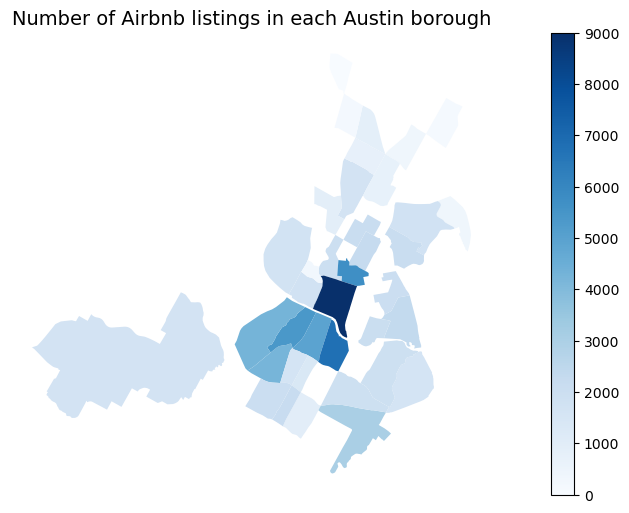

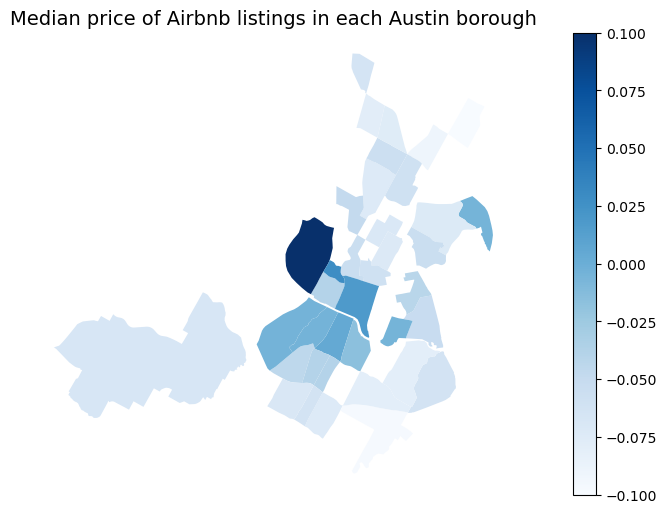

In [ ]:
# Plotting the number of listings in each borough
fig1, ax1 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot(column='number_of_listings', cmap='Blues', ax=ax1)
ax1.axis('off')
ax1.set_title('Number of Airbnb listings in each Austin borough', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=9000))
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)
plt.show()

# Plotting the median price of listings in each borough
fig2, ax2 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot(column='median_price', cmap='Blues', ax=ax2)
ax2.axis('off')
ax2.set_title('Median price of Airbnb listings in each Austin borough', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(borough_map_df.median_price), vmax=max(borough_map_df.median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()

In [ ]:
df.drop(['geometry'], axis=1, inplace=True)

**Property and room types**

In [ ]:
def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

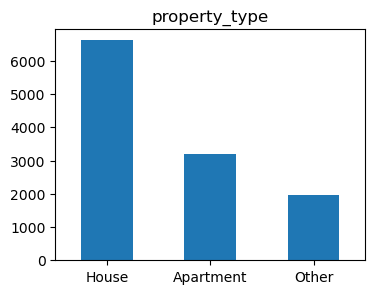

House        0.561313
Apartment    0.272049
Other        0.166638
Name: property_type, dtype: float64


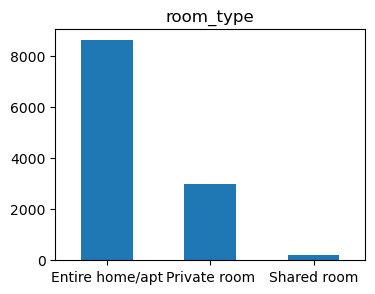

Entire home/apt    0.729393
Private room       0.254495
Shared room        0.016113
Name: room_type, dtype: float64


In [ ]:
for col in ['property_type', 'room_type']:
    category_count_plot(col, figsize=(4,3))
    print(df[col].value_counts(normalize=True))

**Reviews**

For every review category, the majority of listings that have had a review have received a 10/10 rating for that category (or 95-100/100 overall) - clearly, people love their Airbnbs. Ratings of 8 or below are rare. Guests seem to be most positive about communication, check-ins, and accuracy. As noted previously, about a quarter of listings have not yet been reviewed.

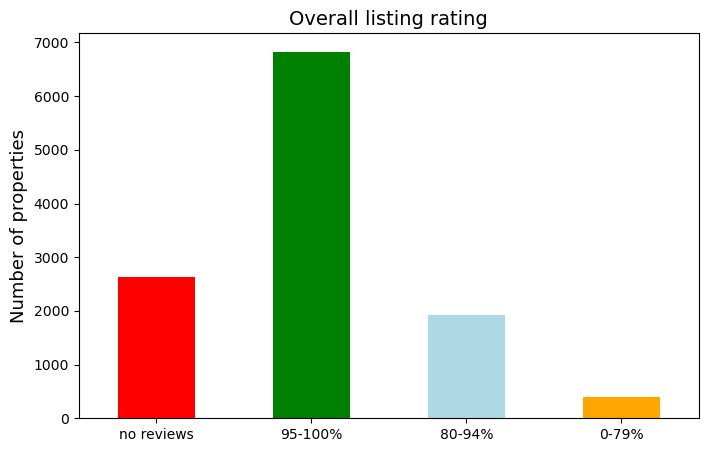

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_title('Overall listing rating', fontsize=14)
df['review_scores_rating'].value_counts().sort_index(ascending=False).plot(kind='bar', color=['red', 'green', 'lightblue', 'orange' ], ax=ax)
ax.set_xticklabels(labels=['no reviews', '95-100%', '80-94%', '0-79%'], rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Number of properties', fontsize=13)
plt.show()

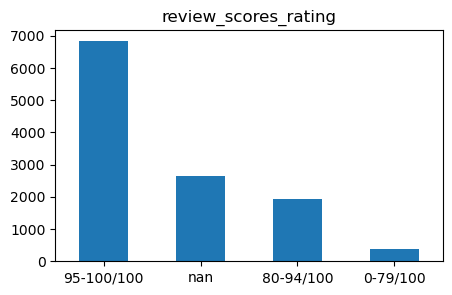

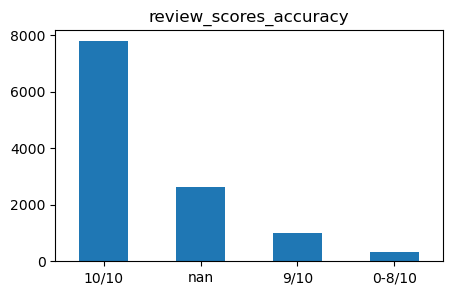

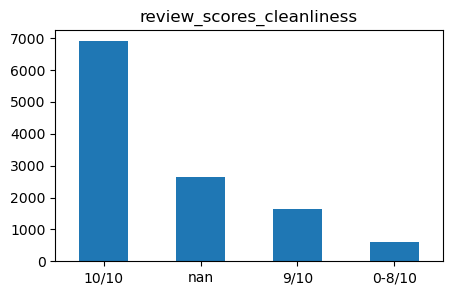

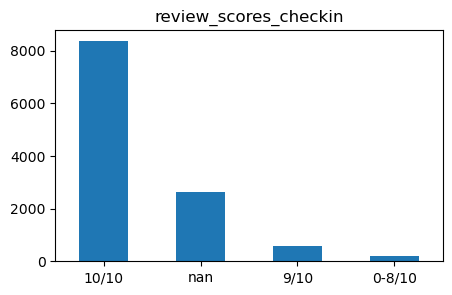

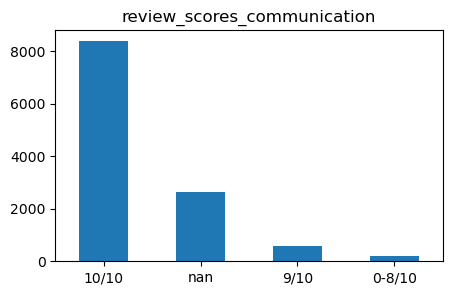

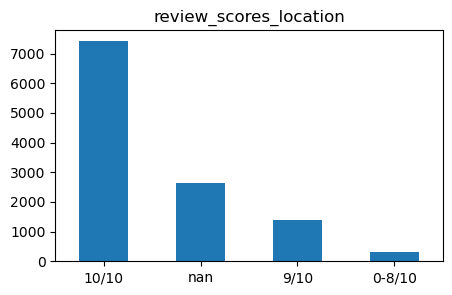

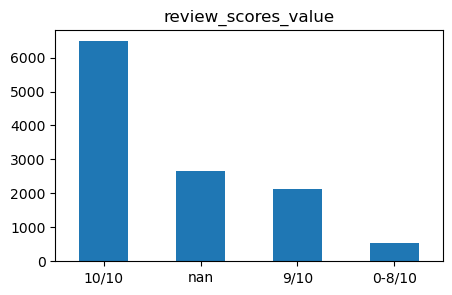

In [ ]:
for col in list(df.columns[df.columns.str.startswith("review_scores") == True]):
    category_count_plot(col, figsize=(5,3))

**First and last reviews**

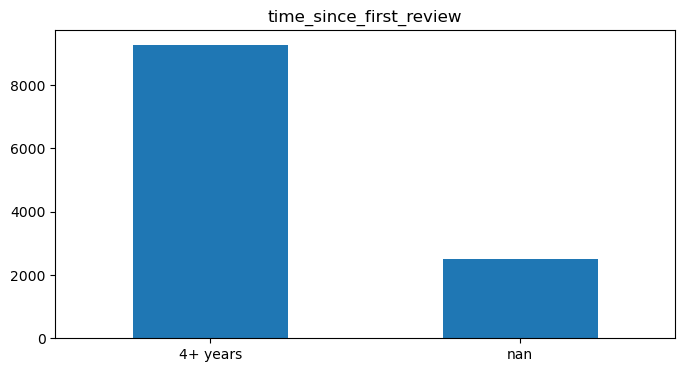

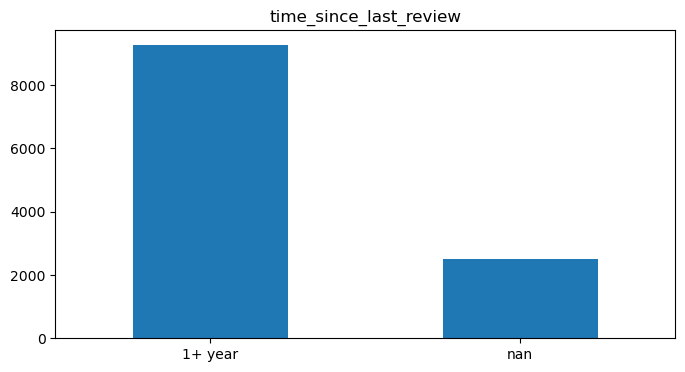

In [ ]:
for col in ['time_since_first_review', 'time_since_last_review']:
    category_count_plot(col)

### **Boolean (true or false) features**

Many features (e.g. for amenities) can be true or false.
This section compares the proportions of these features that are true or false
(to explore the data and also to ascertain whether the feature is worth retaining), and the median price of each category (to explore the relationship between the category and price).

In [ ]:
def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles

    df.groupby(col).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')

    df.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price ($)')
    ax2.set_xlabel('')

    plt.show()


**host_is_superhost**

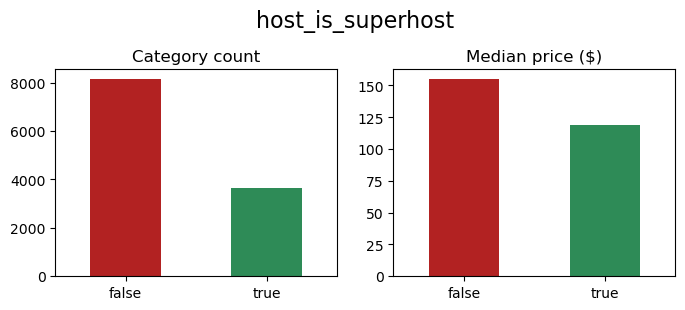

0.0    0.690389
1.0    0.309611
Name: host_is_superhost, dtype: float64


In [ ]:
binary_count_and_price_plot('host_is_superhost')
print(df.host_is_superhost.value_counts(normalize=True))

**host_identity_verified**

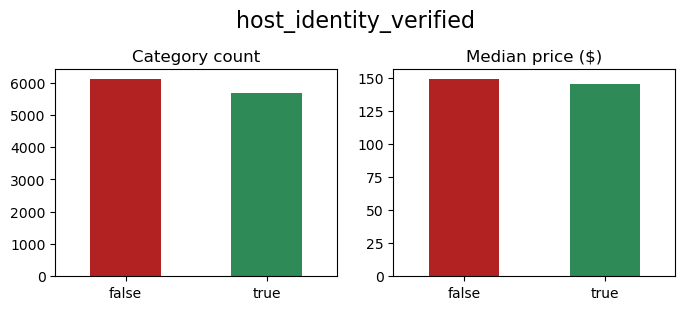

0.0    0.51828
1.0    0.48172
Name: host_identity_verified, dtype: float64

In [ ]:
binary_count_and_price_plot('host_identity_verified')
df.host_identity_verified.value_counts(normalize=True)

**instant_bookable**

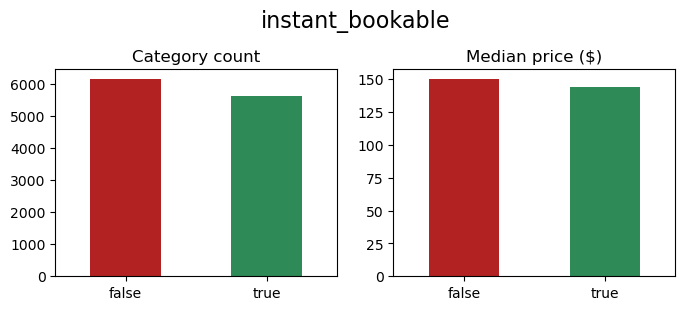

0    0.522388
1    0.477612
Name: instant_bookable, dtype: float64


In [ ]:
binary_count_and_price_plot('instant_bookable')
print(df.instant_bookable.value_counts(normalize=True))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11792 entries, 0 to 11791
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           11792 non-null  int64  
 1   host_response_time           11792 non-null  object 
 2   host_response_rate           11792 non-null  object 
 3   host_is_superhost            11789 non-null  float64
 4   host_listings_count          11789 non-null  float64
 5   host_identity_verified       11789 non-null  float64
 6   borough                      10965 non-null  object 
 7   property_type                11792 non-null  object 
 8   room_type                    11792 non-null  object 
 9   accommodates                 11792 non-null  int64  
 10  bathrooms                    11792 non-null  float64
 11  bedrooms                     11792 non-null  float64
 12  beds                         11792 non-null  float64
 13  price           

**Amenities**

Detecting amenities that have influenced the median price.

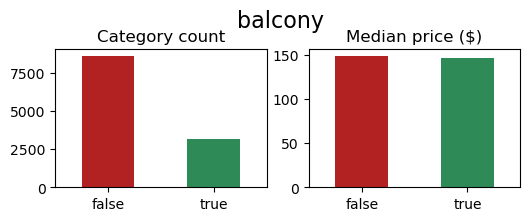

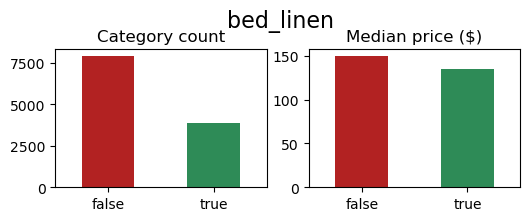

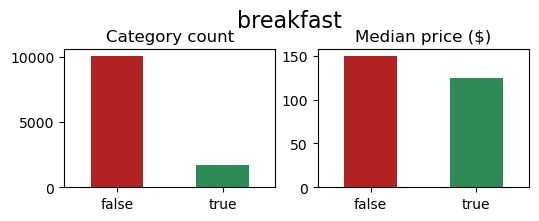

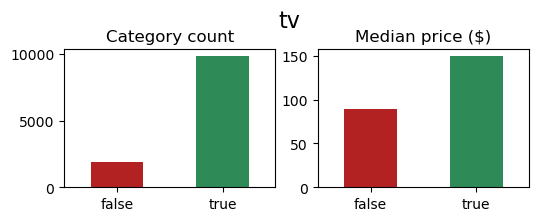

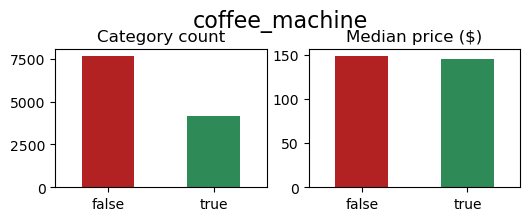

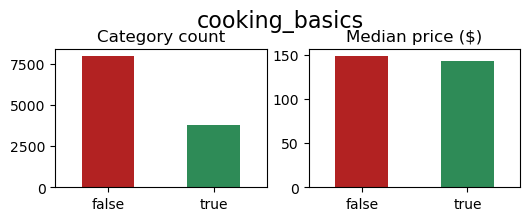

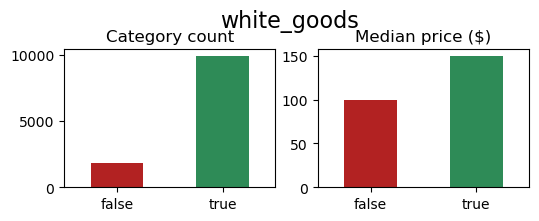

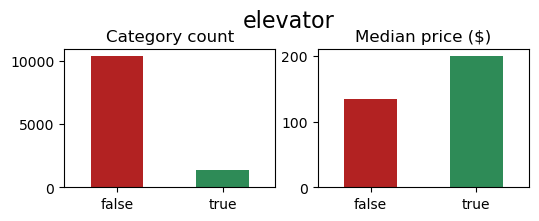

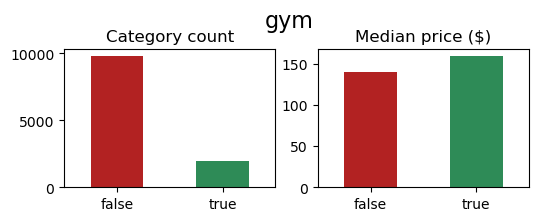

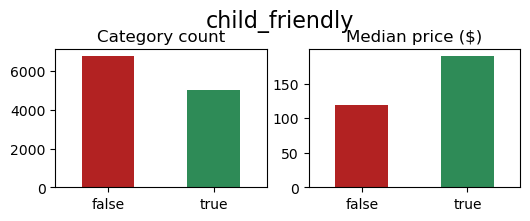

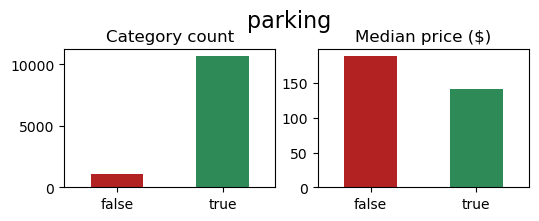

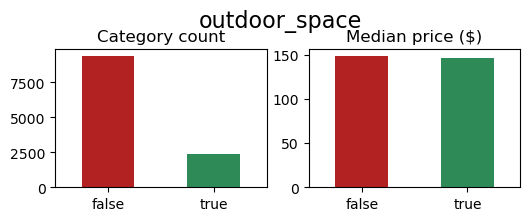

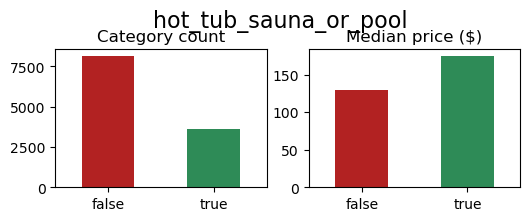

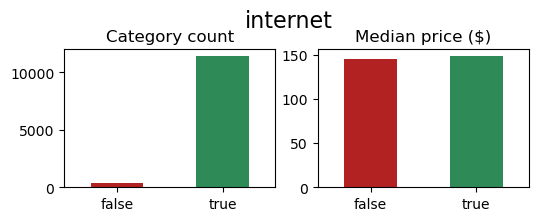

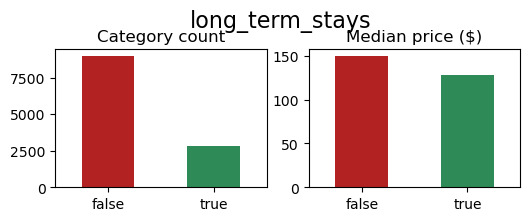

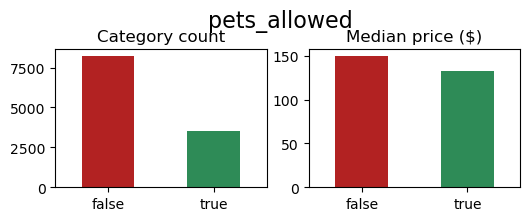

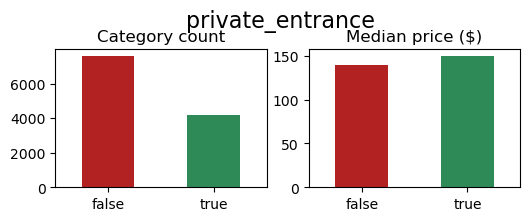

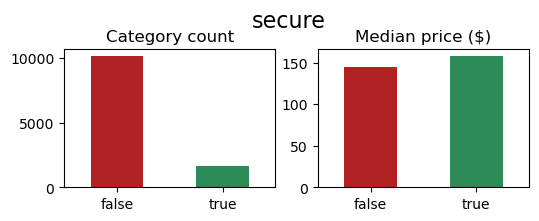

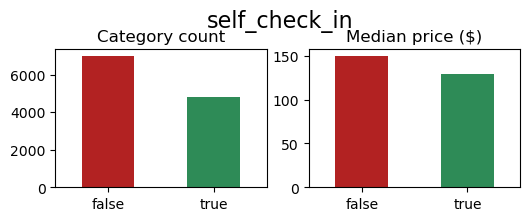

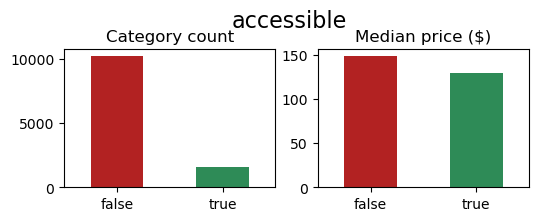

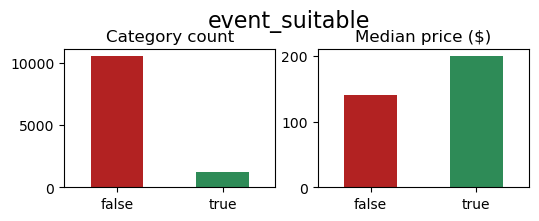

In [ ]:
for col in df.iloc[:,35:-2].columns:
    binary_count_and_price_plot(col, figsize=(6,2))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11792 entries, 0 to 11791
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           11792 non-null  int64  
 1   host_response_time           11792 non-null  object 
 2   host_response_rate           11792 non-null  object 
 3   host_is_superhost            11789 non-null  float64
 4   host_listings_count          11789 non-null  float64
 5   host_identity_verified       11789 non-null  float64
 6   borough                      10965 non-null  object 
 7   property_type                11792 non-null  object 
 8   room_type                    11792 non-null  object 
 9   accommodates                 11792 non-null  int64  
 10  bathrooms                    11792 non-null  float64
 11  bedrooms                     11792 non-null  float64
 12  beds                         11792 non-null  float64
 13  price           

### **Preparing the data for modeling**

Categorical variables will now be Label encoded:

In [ ]:
le = LabelEncoder()
df['host_response_time'] = le.fit_transform(df['host_response_time'])
df['host_response_rate'] = le.fit_transform(df['host_response_rate'])
df['property_type'] = le.fit_transform(df['property_type'])
df['room_type'] = le.fit_transform(df['room_type'])
df['review_scores_rating'] = le.fit_transform(df['review_scores_rating'])
df['review_scores_accuracy'] = le.fit_transform(df['review_scores_accuracy'])
df['review_scores_cleanliness'] = le.fit_transform(df['review_scores_cleanliness'])
df['review_scores_checkin'] = le.fit_transform(df['review_scores_checkin'])
df['review_scores_communication'] = le.fit_transform(df['review_scores_communication'])
df['review_scores_location'] = le.fit_transform(df['review_scores_location'])
df['review_scores_value'] = le.fit_transform(df['review_scores_value'])
df['cancellation_policy'] = le.fit_transform(df['cancellation_policy'])
df['time_since_first_review'] = le.fit_transform(df['time_since_first_review'])
df['time_since_last_review'] = le.fit_transform(df['time_since_last_review'])
df['borough'] = le.fit_transform(df['borough'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11792 entries, 0 to 11791
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           11792 non-null  int64  
 1   host_response_time           11792 non-null  int64  
 2   host_response_rate           11792 non-null  int64  
 3   host_is_superhost            11789 non-null  float64
 4   host_listings_count          11789 non-null  float64
 5   host_identity_verified       11789 non-null  float64
 6   borough                      11792 non-null  int64  
 7   property_type                11792 non-null  int64  
 8   room_type                    11792 non-null  int64  
 9   accommodates                 11792 non-null  int64  
 10  bathrooms                    11792 non-null  float64
 11  bedrooms                     11792 non-null  float64
 12  beds                         11792 non-null  float64
 13  price           

**Dropping columns and assessing multi-collinearity**

In [ ]:
def multi_collinearity_heatmap(df, figsize=(11,9)):

    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """

    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());


/var/folders/km/nmzhq1351tq2fl9x8z8x1_nw0000gn/T/ipykernel_23045/966998409.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


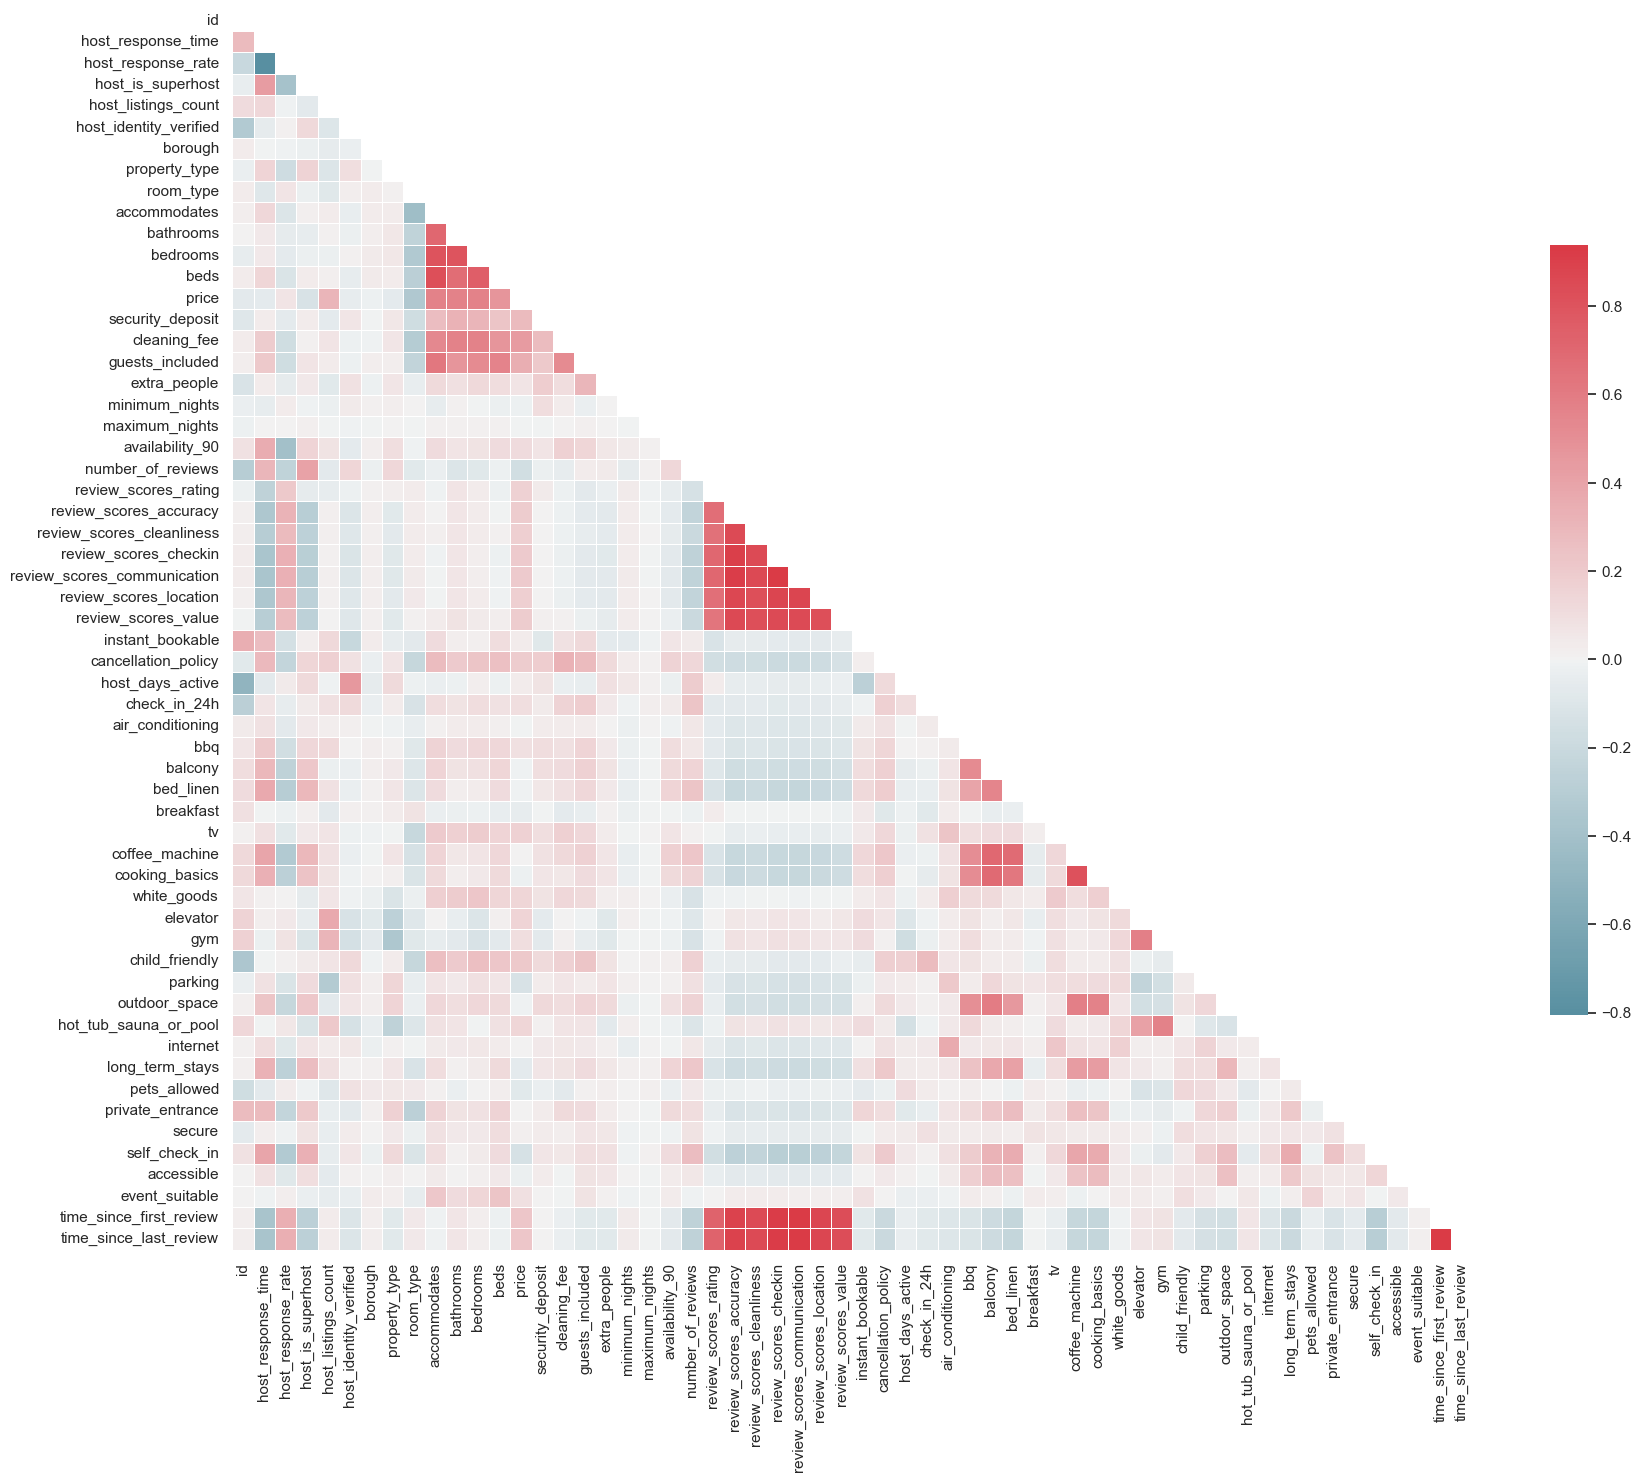

In [ ]:
multi_collinearity_heatmap(df, figsize=(20,20))

In [ ]:
# Dropping collinear features
df.drop(['bathrooms', 'bedrooms', 'beds', 'guests_included', 'review_scores_cleanliness', 'review_scores_value', 'review_scores_location', 'review_scores_communication', 'review_scores_checkin', 'review_scores_accuracy'],axis = 1, inplace = True)

/var/folders/km/nmzhq1351tq2fl9x8z8x1_nw0000gn/T/ipykernel_23045/966998409.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


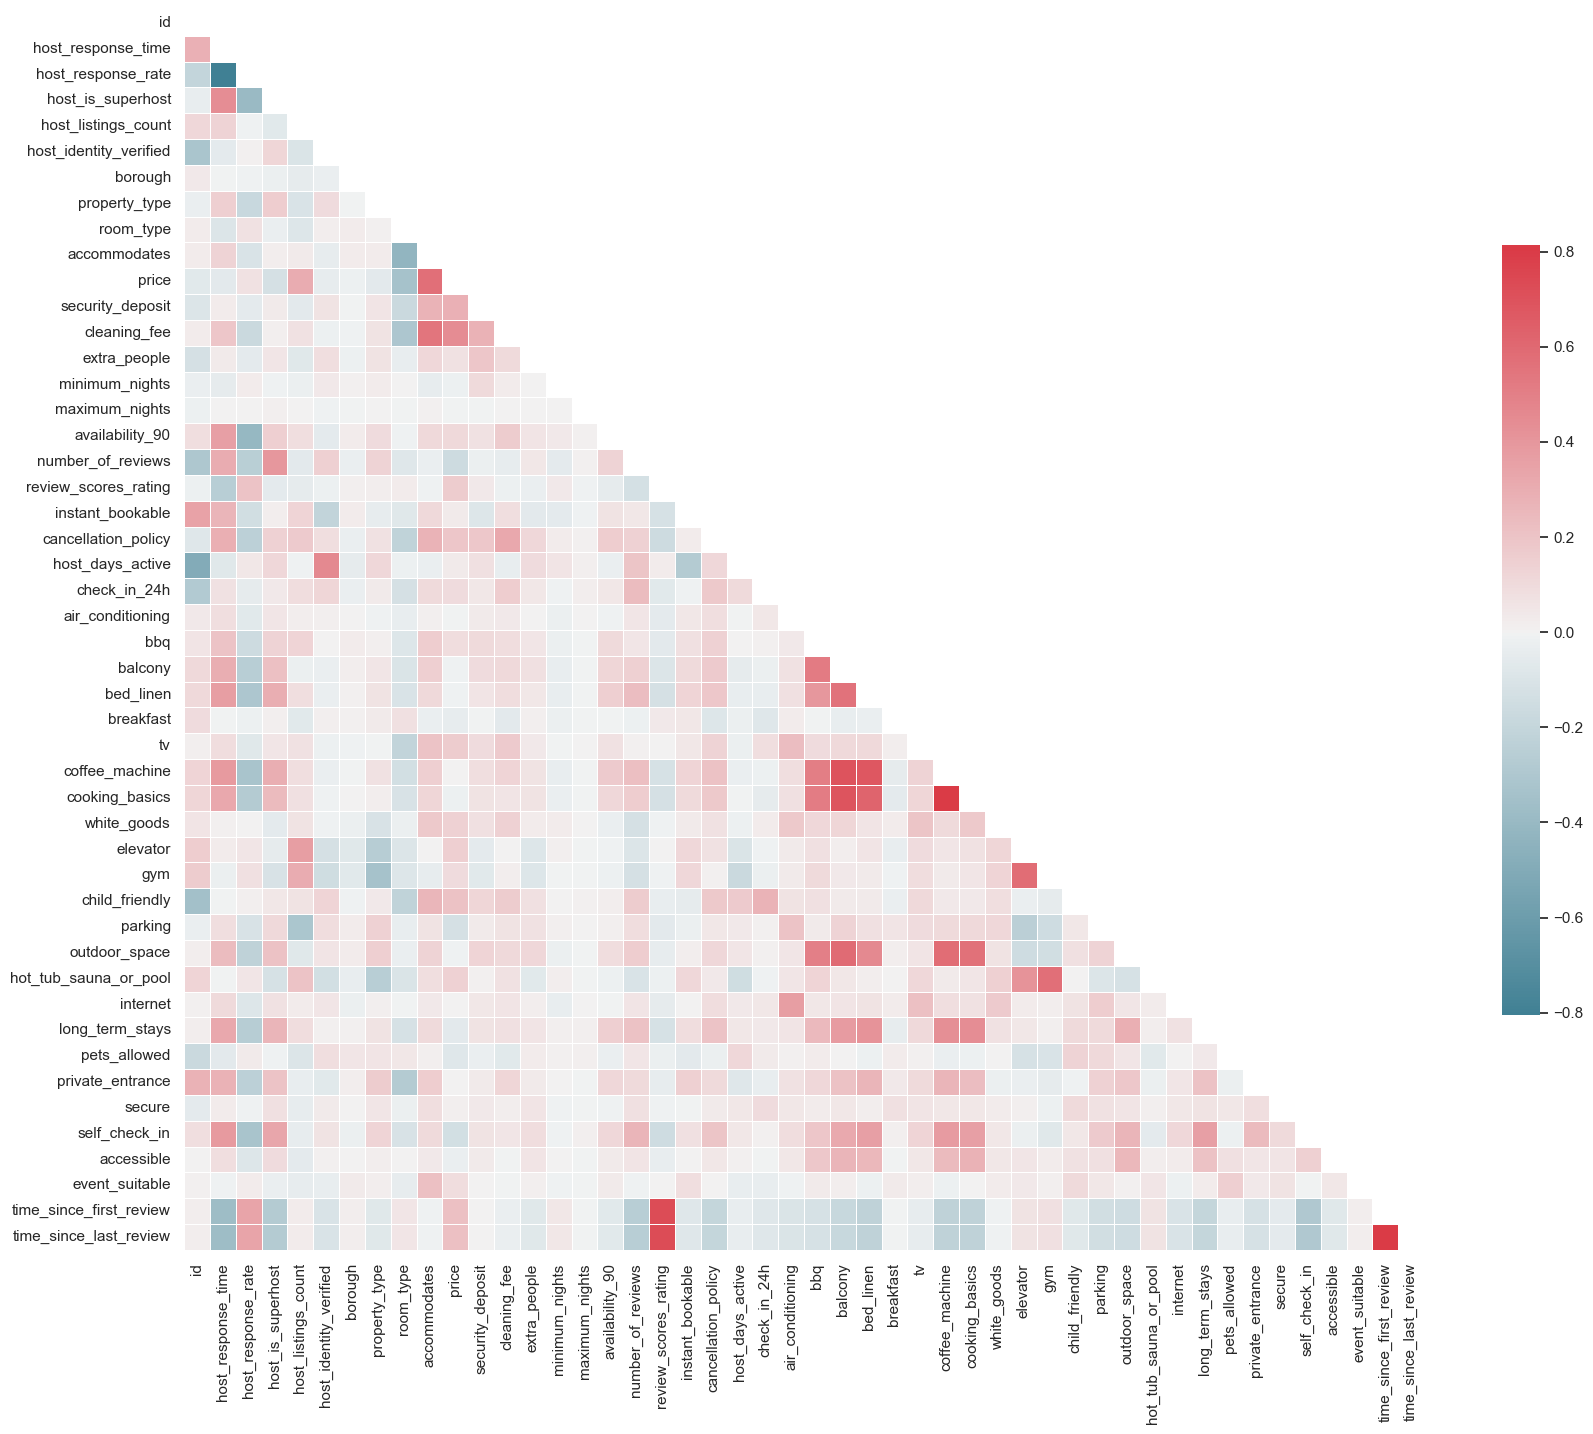

In [ ]:
multi_collinearity_heatmap(df, figsize=(20,20))

In [ ]:
# Final assessment of multi-collinearity
df.drop(['time_since_first_review', 'coffee_machine', 'bed_linen', 'balcony'],axis = 1, inplace = True)

**Save the final cleaned version of the dataset.**

In [ ]:
#Save the final version of our Dataset
with open('Final_df', 'wb') as f:
    pickle.dump(df, f)

### **Standardising and Normalising**

**Read the final cleaned version of the dataset.**

In [ ]:
# Read the final version of our Dataset
with open('Final_df', 'rb') as f:
    df = pickle.load(f)
df

id  host_response_time  host_response_rate  host_is_superhost  \
0          1078                   4                   1                1.0   
1          2265                   3                   1                1.0   
2          5245                   3                   1                1.0   
3          5456                   3                   1                1.0   
4          5769                   4                   1                1.0   
...         ...                 ...                 ...                ...   
11787  34687636                   1                   4                0.0   
11788  34687994                   1                   4                0.0   
11789  34689047                   1                   4                0.0   
11790  34693490                   1                   4                0.0   
11791  34698024                   1                   4                0.0   

       host_listings_count  host_identity_verified  borough  property_type  \
0                      3.0                     1.0       66              2   
1                      3.0                     1.0       21              1   
2                      3.0                     1.0       21              1   
3                      1.0                     1.0       21              2   
4                      1.0                     1.0       53              1   
...                    ...                     ...      ...            ...   
11787                  1.0                     0.0       77              1   
11788                  2.0                     1.0       28              0   
11789                  2.0                     0.0       78              1   
11790                  1.0                     0.0       55              0   
11791                  1.0                     1.0       66              0   

       room_type  accommodates  ...  hot_tub_sauna_or_pool  internet  \
0              0             2  ...                    0.0       1.0   
1              0             4  ...                    0.0       1.0   
2              1             2  ...                    0.0       1.0   
3              0             3  ...                    0.0       1.0   
4              1             2  ...                    0.0       1.0   
...          ...           ...  ...                    ...       ...   
11787          1             2  ...                    0.0       1.0   
11788          1             1  ...                    0.0       1.0   
11789          1             1  ...                    0.0       1.0   
11790          0             3  ...                    1.0       1.0   
11791          0             2  ...                    1.0       1.0   

       long_term_stays  pets_allowed  private_entrance  secure  self_check_in  \
0                  0.0           0.0               0.0     0.0            1.0   
1                  0.0           1.0               1.0     0.0            1.0   
2                  0.0           1.0               0.0     0.0            0.0   
3                  1.0           1.0               1.0     0.0            0.0   
4                  0.0           1.0               0.0     0.0            0.0   
...                ...           ...               ...     ...            ...   
11787              0.0           0.0               1.0     0.0            0.0   
11788              0.0           0.0               0.0     0.0            0.0   
11789              0.0           0.0               0.0     0.0            0.0   
11790              0.0           0.0               1.0     0.0            0.0   
11791              0.0           0.0               1.0     0.0            0.0   

       accessible  event_suitable  time_since_last_review  
0             0.0             0.0                       0  
1             0.0             0.0                       0  
2             0.0             0.0                       0  
3             0.0             0.0                       0  
4

Check the skewness of the data, to benefit from log transformation, in case of detecting skewness in features.

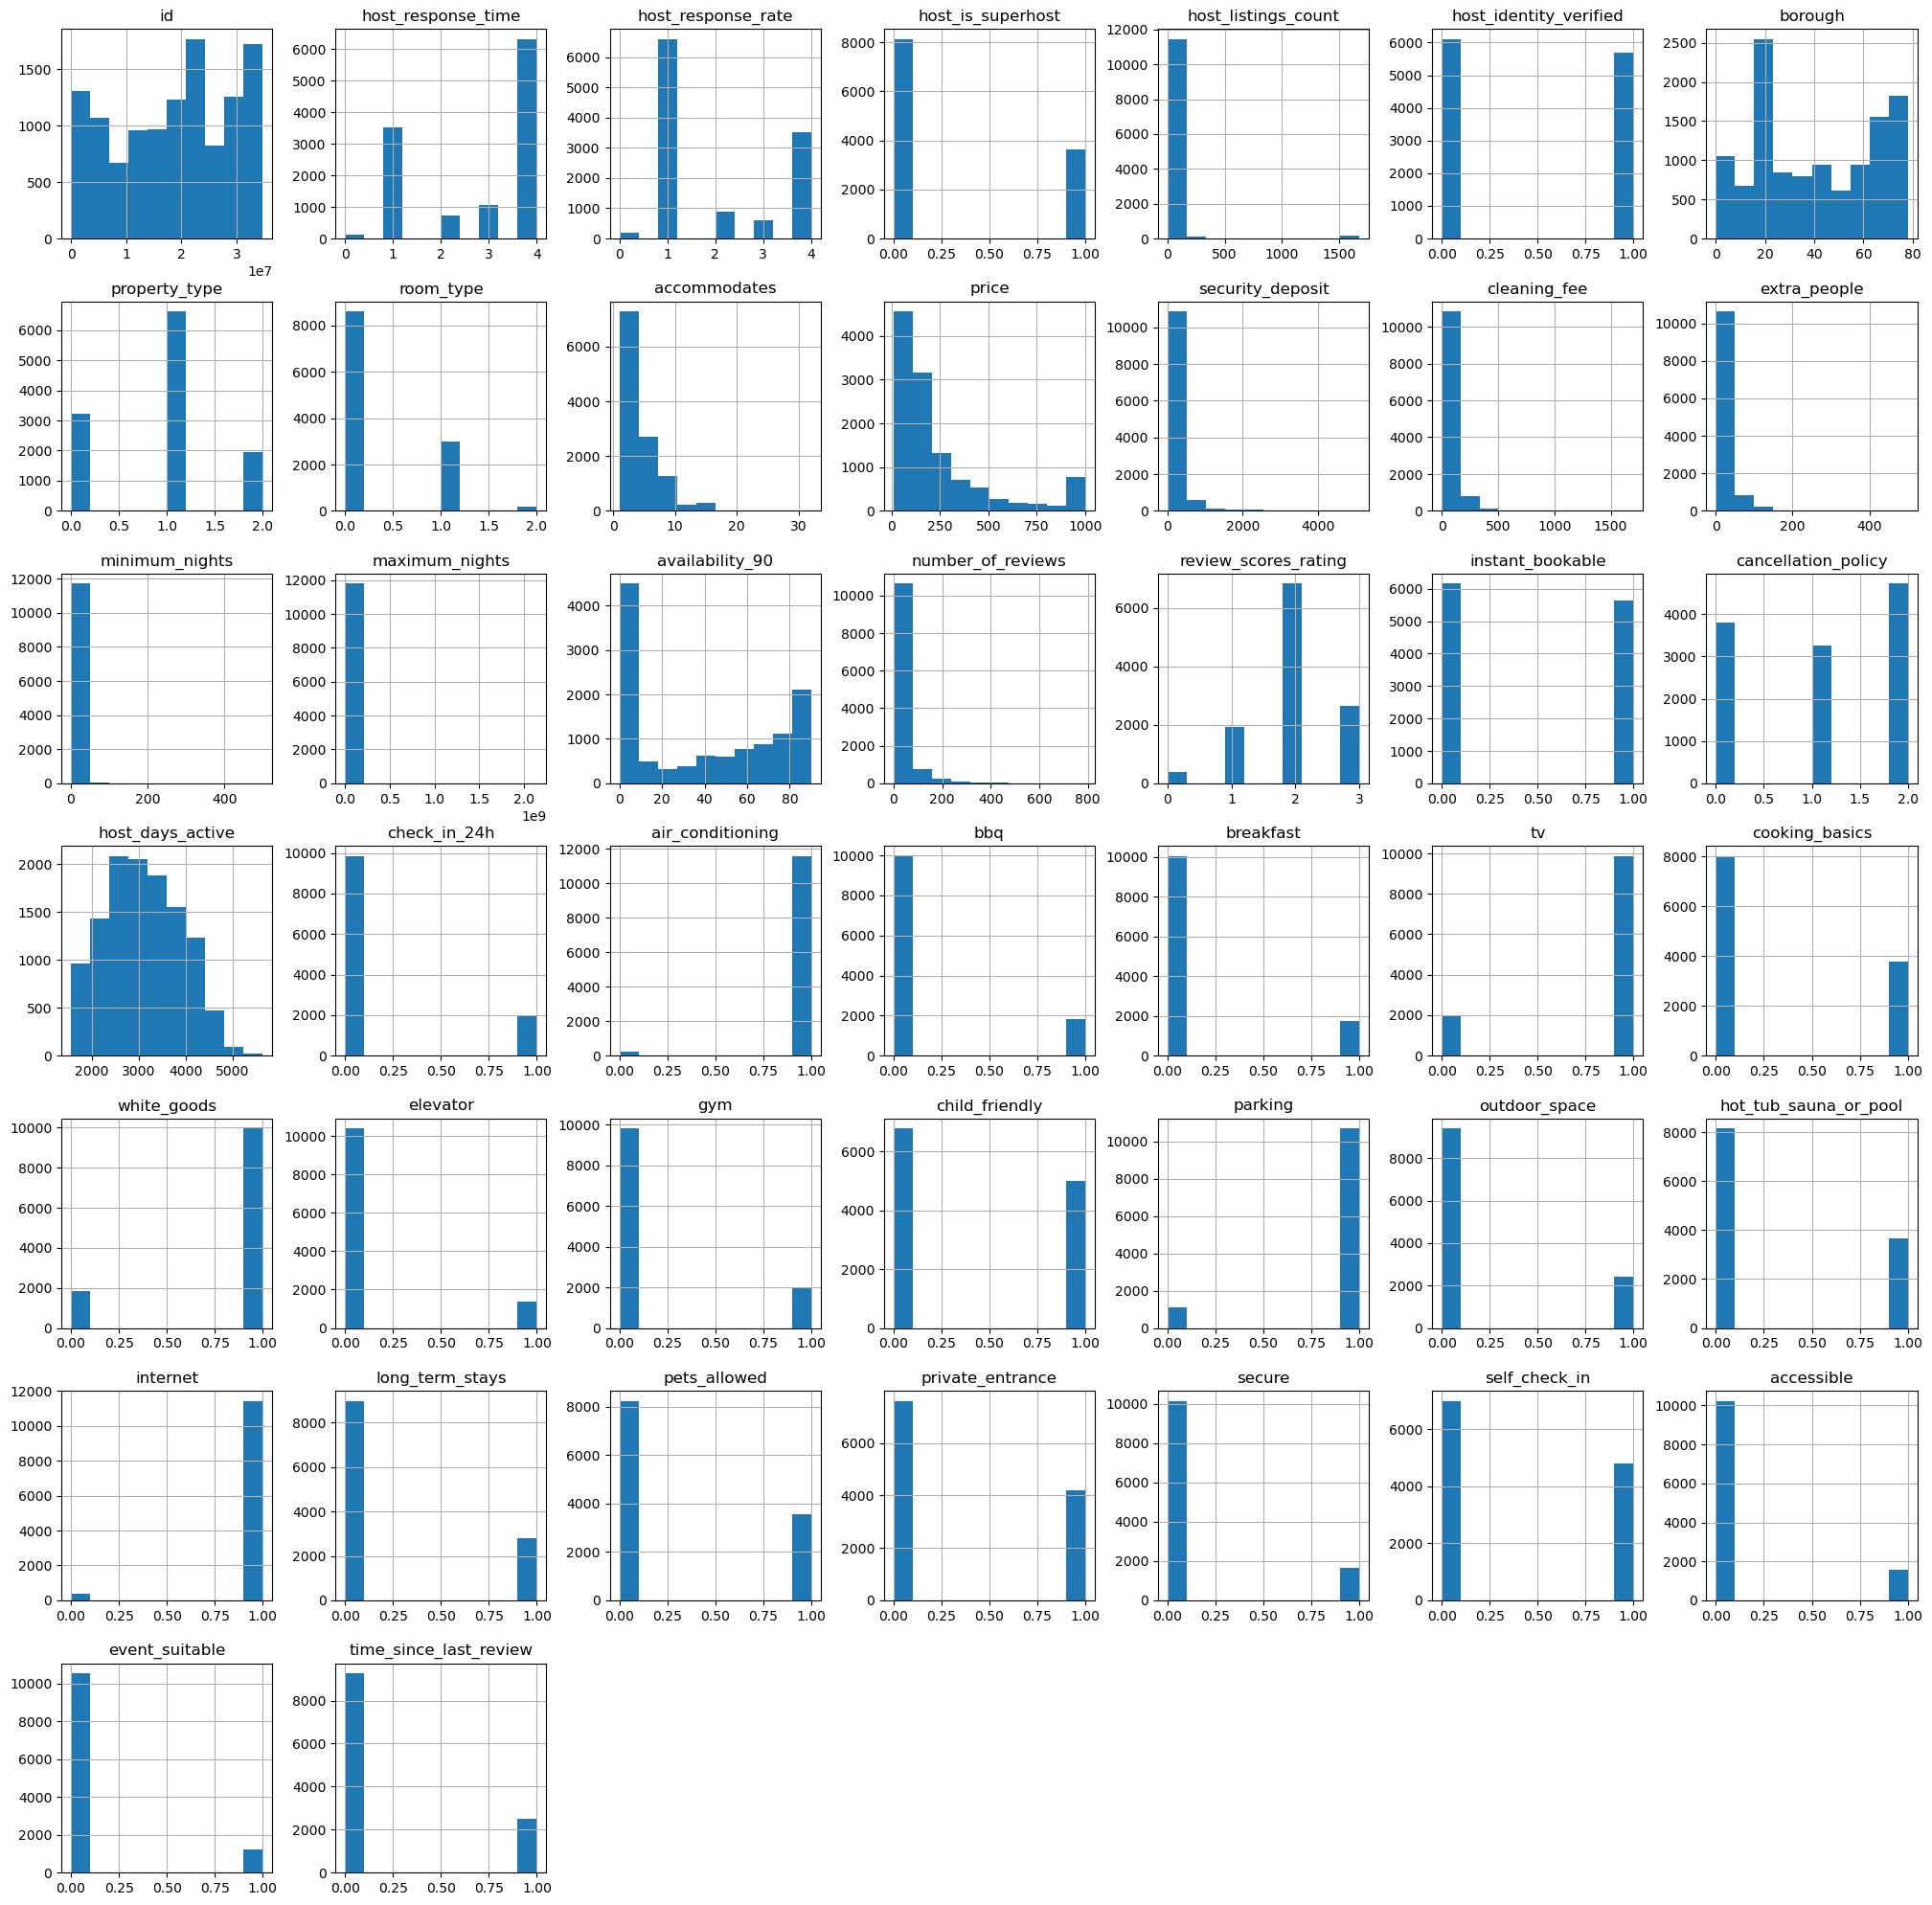

In [ ]:
df.hist(figsize=(25,25));



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: xlabel='price', ylabel='Density'>

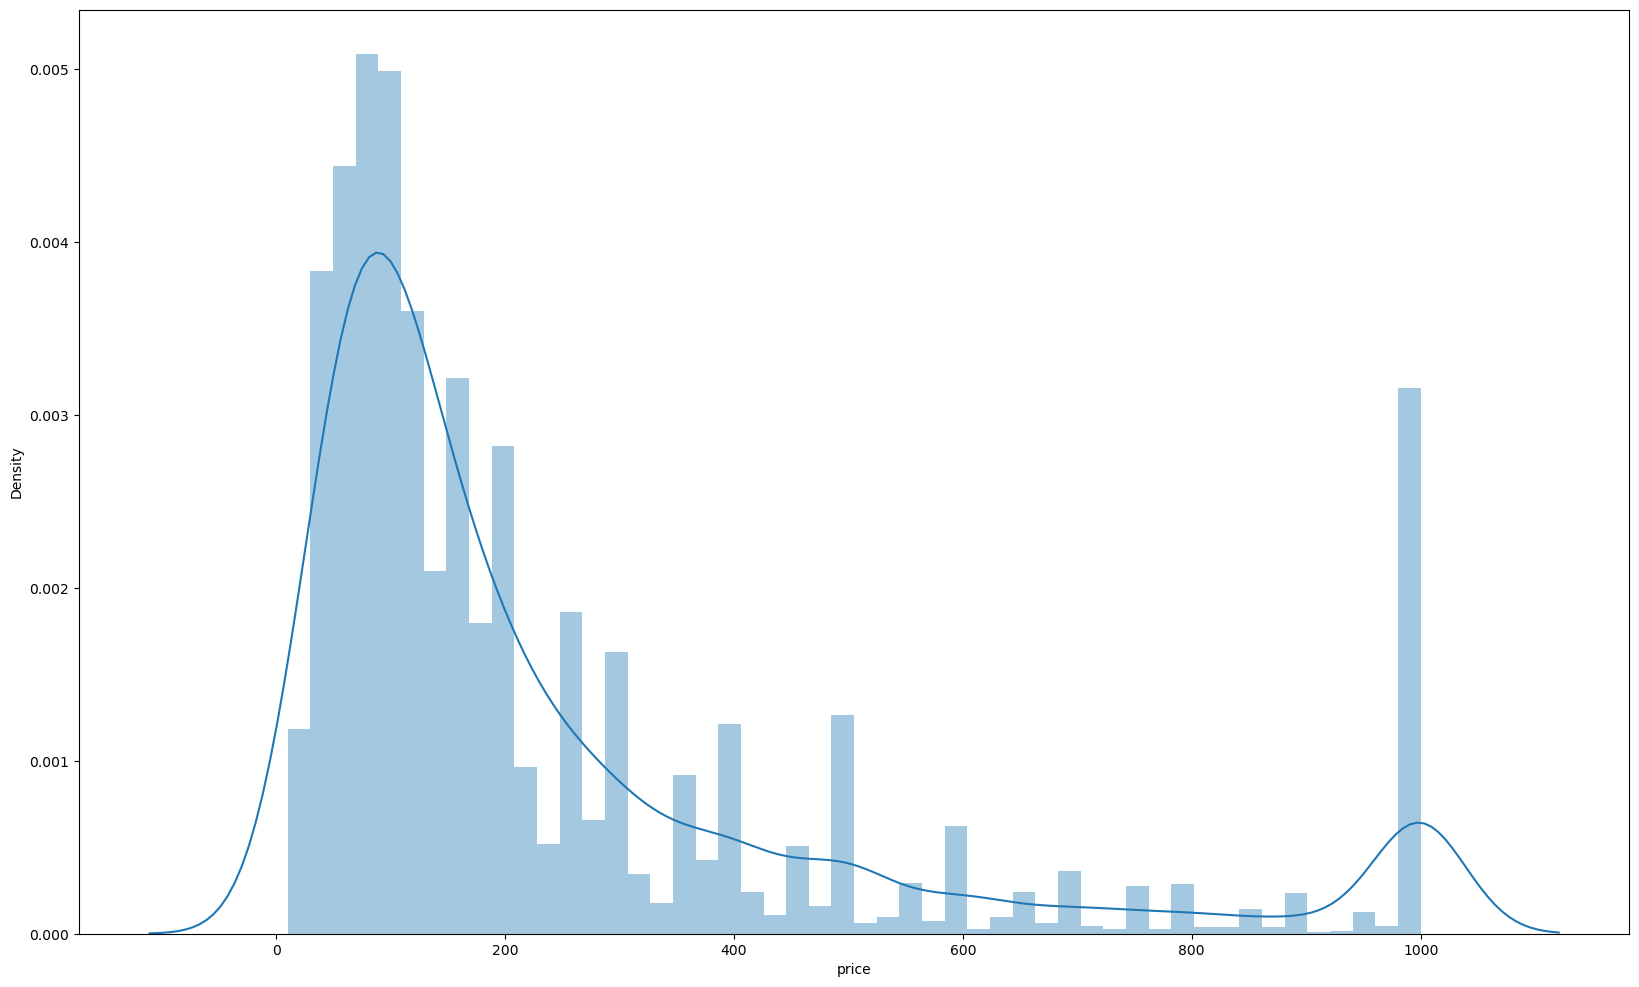

In [ ]:
plt.figure(figsize=(20, 12))
sns.distplot(df['price'])

In [ ]:
# Log transforming columns
columns = ['host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_identity_verified', 'borough',
       'property_type', 'room_type', 'accommodates', 'price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'minimum_nights',
       'maximum_nights', 'availability_90', 'number_of_reviews',
       'review_scores_rating', 'instant_bookable', 'cancellation_policy',
       'host_days_active', 'check_in_24h', 'air_conditioning', 'bbq',
        'breakfast', 'tv', 'cooking_basics', 'white_goods',
       'elevator', 'gym', 'child_friendly', 'parking', 'outdoor_space',
       'hot_tub_sauna_or_pool', 'internet', 'long_term_stays', 'pets_allowed',
       'private_entrance', 'secure', 'self_check_in', 'accessible',
       'event_suitable', 'time_since_last_review']
columns = [i for i in columns if i not in ['availability_90', 'host_days_active']] # Removing items not to be transformed

for col in columns:
    df[col] = df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    df[col] = np.log(df[col])



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: xlabel='price', ylabel='Density'>

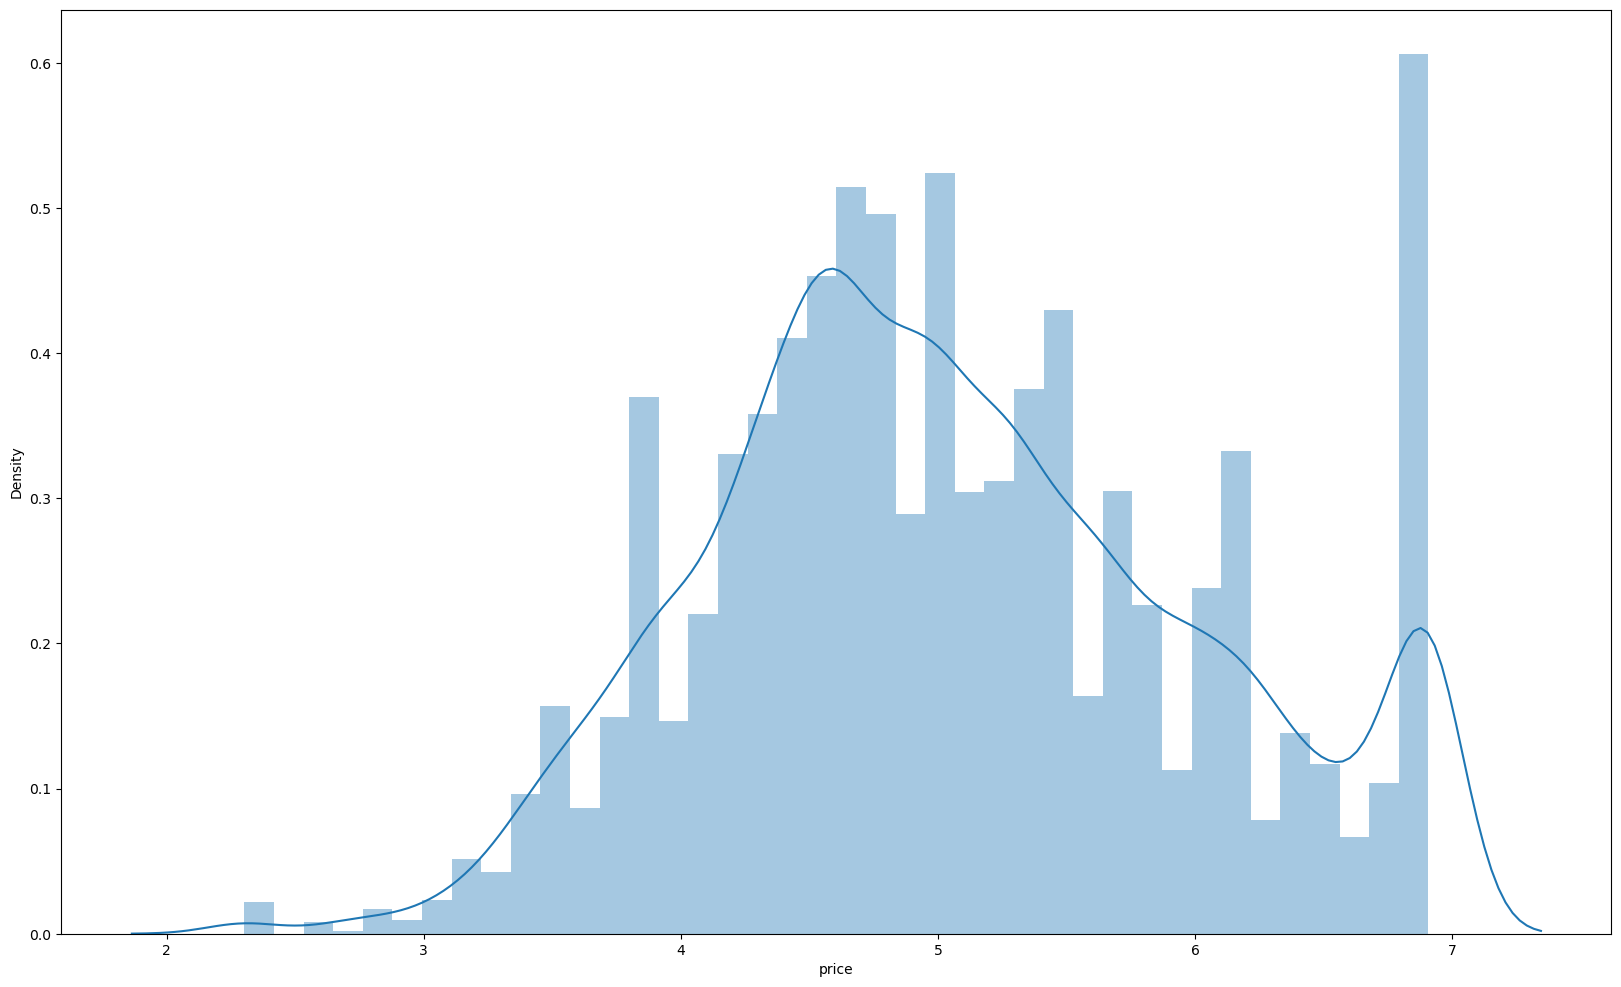

In [ ]:
plt.figure(figsize=(20, 12))
sns.distplot(df['price'])

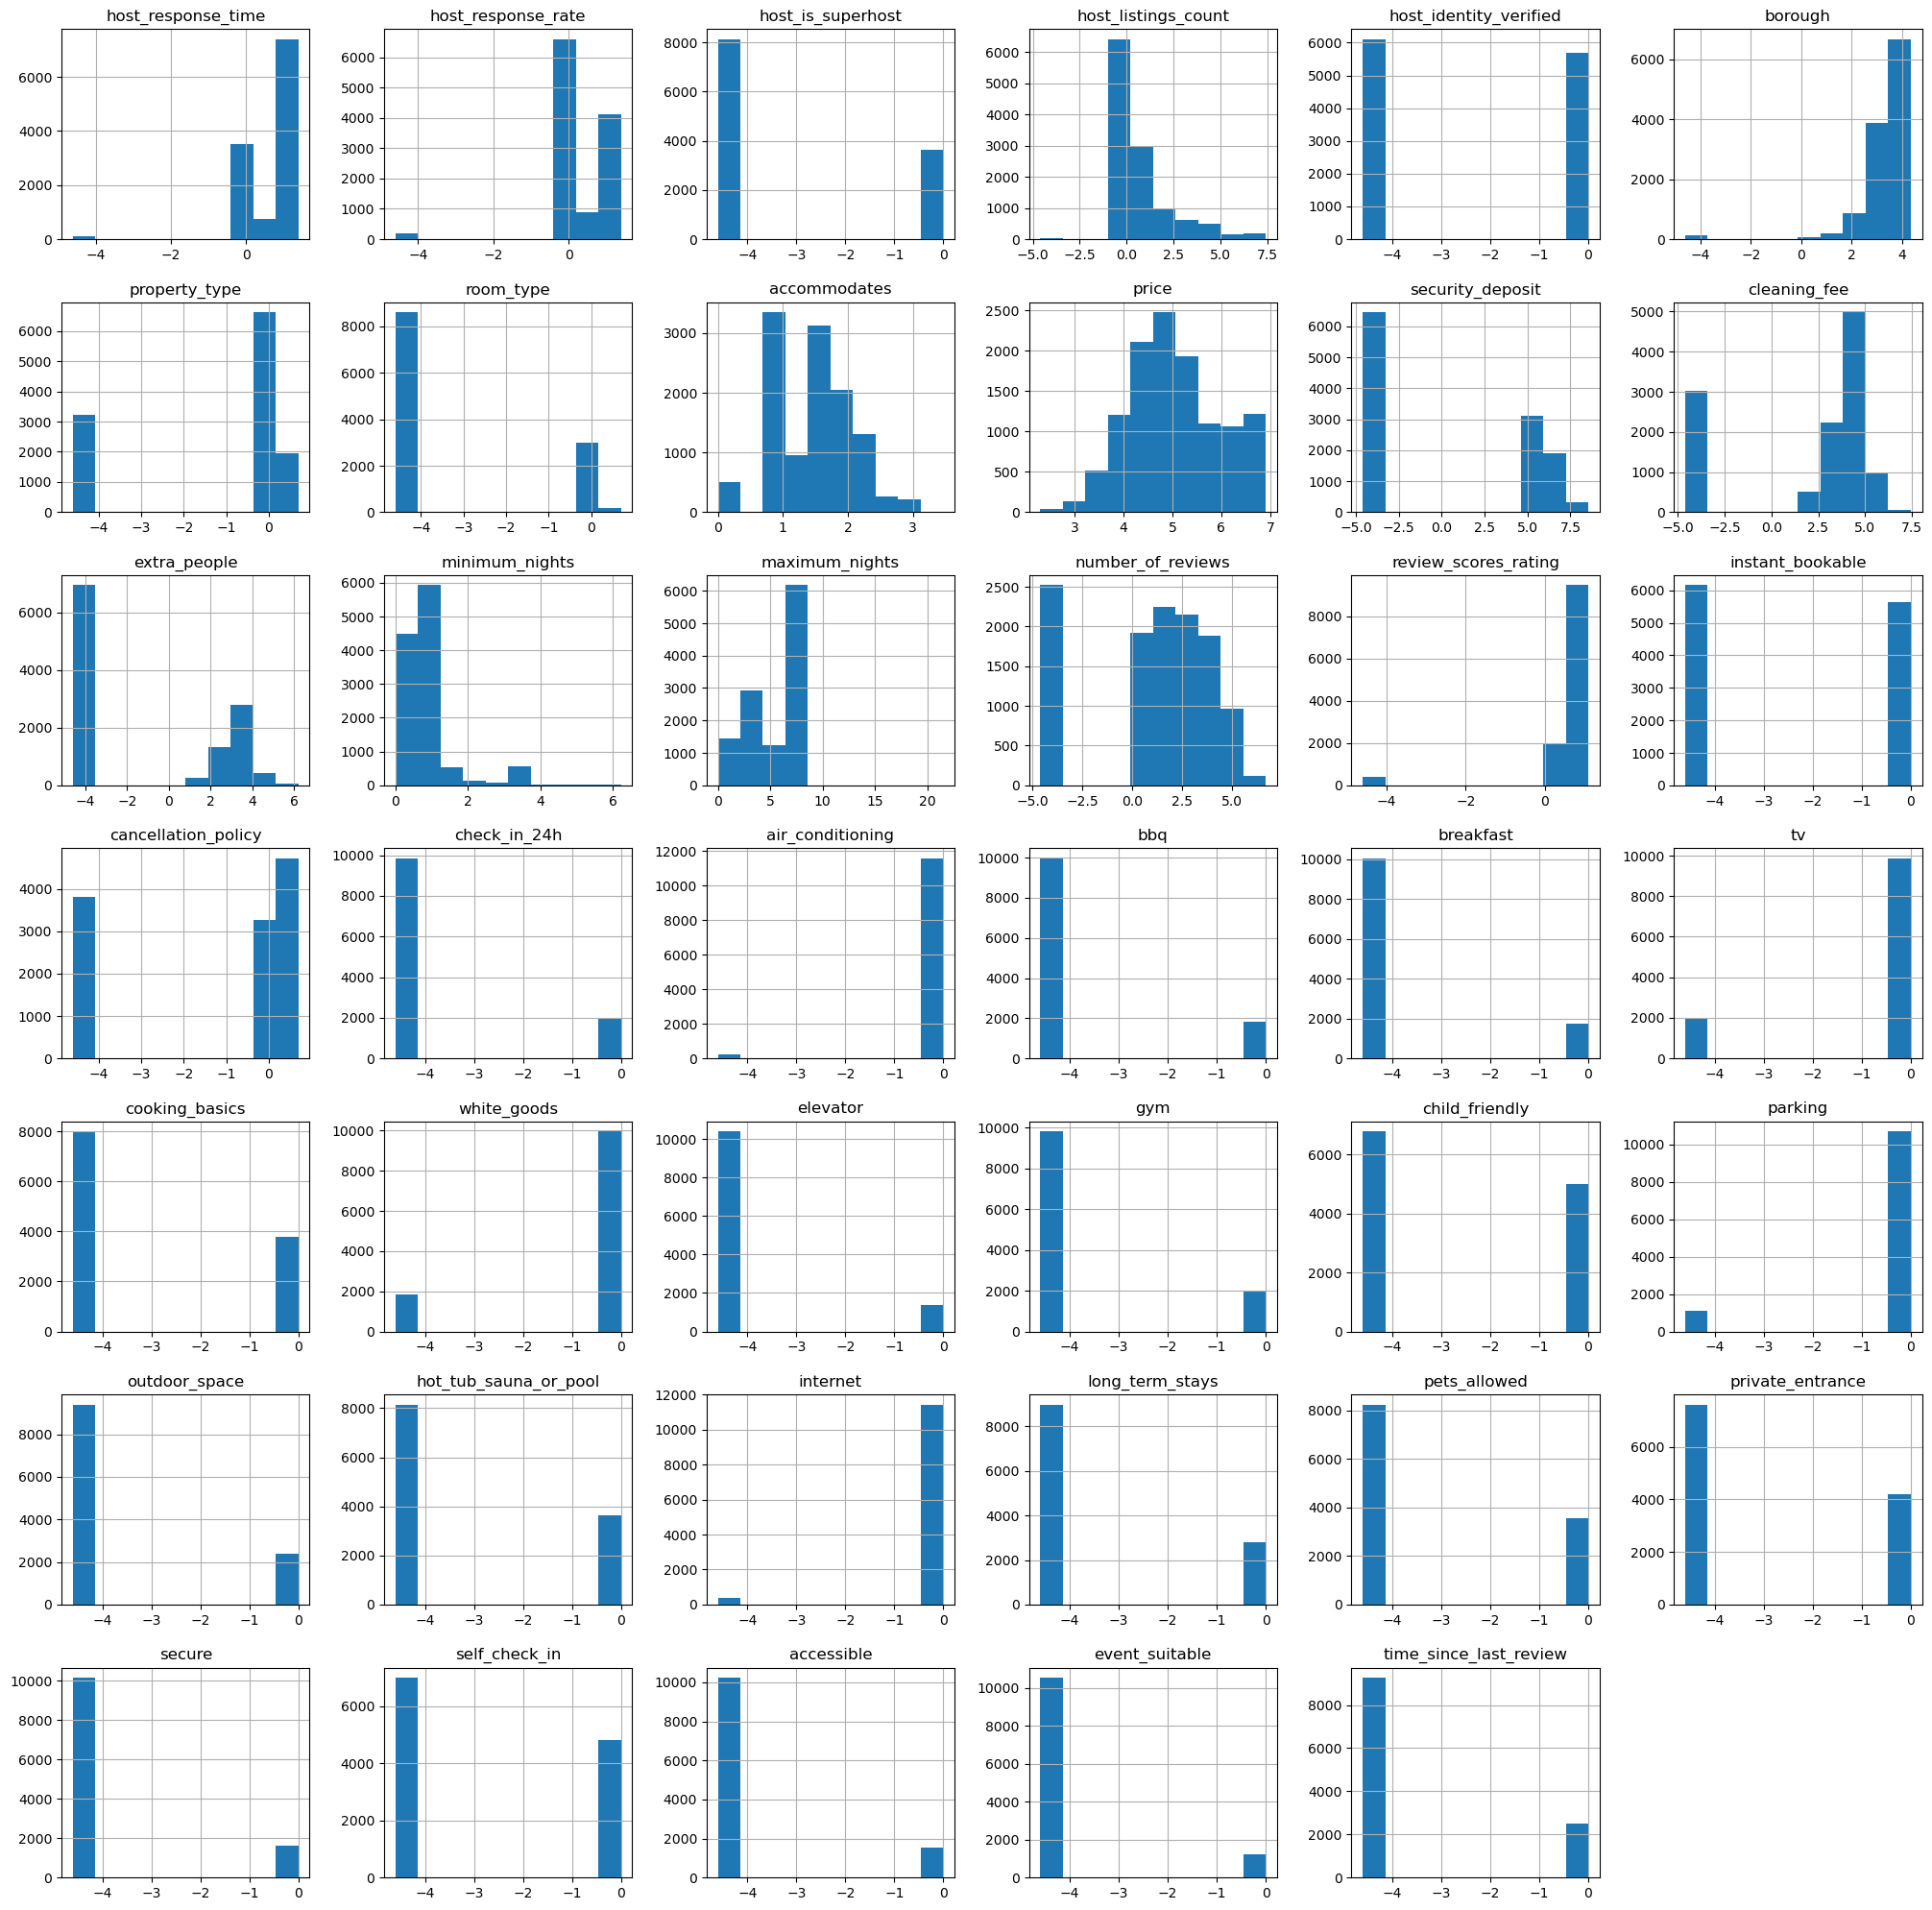

In [ ]:
df[columns].hist(figsize=(25,25));

### **Building the Model using CatBoostRegressor**

Finally, the predictive features X and the target feature y can be separated, and X will be scaled.
StandardScaler from sklearn will be used.

In [ ]:
# Separating X and y
X = df.drop('price', axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [ ]:
train_dataset = cb.Pool(X_train, y_train)
test_dataset = cb.Pool(X_test, y_test)

In [ ]:
# Scaling
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=list(X_train.columns))

In [ ]:
model = cb.CatBoostRegressor(loss_function='RMSE')

Finding the optimal combination of hyper-parameters, using grid_search.

In [ ]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

0:	learn: 4.9969498	test: 4.9667741	best: 4.9667741 (0)	total: 1.57ms	remaining: 155ms
1:	learn: 4.8522942	test: 4.8220861	best: 4.8220861 (1)	total: 3.37ms	remaining: 165ms
2:	learn: 4.7122171	test: 4.6820334	best: 4.6820334 (2)	total: 5.09ms	remaining: 165ms
3:	learn: 4.5765153	test: 4.5462462	best: 4.5462462 (3)	total: 6.75ms	remaining: 162ms
4:	learn: 4.4450226	test: 4.4146564	best: 4.4146564 (4)	total: 8.28ms	remaining: 157ms
5:	learn: 4.3176395	test: 4.2871152	best: 4.2871152 (5)	total: 9.71ms	remaining: 152ms
6:	learn: 4.1939709	test: 4.1633975	best: 4.1633975 (6)	total: 11.4ms	remaining: 151ms
7:	learn: 4.0743132	test: 4.0435618	best: 4.0435618 (7)	total: 12.9ms	remaining: 149ms
8:	learn: 3.9585770	test: 3.9277334	best: 3.9277334 (8)	total: 14.4ms	remaining: 145ms
9:	learn: 3.8465128	test: 3.8154439	best: 3.8154439 (9)	total: 15.9ms	remaining: 143ms
10:	learn: 3.7378955	test: 3.7067324	best: 3.7067324 (10)	total: 17.5ms	remaining: 141ms
11:	learn: 3.6318458	test: 3.6010558	best

4:	learn: 3.1196302	test: 3.0898963	best: 3.0898963 (4)	total: 8.9ms	remaining: 169ms
5:	learn: 2.8344582	test: 2.8040716	best: 2.8040716 (5)	total: 10.9ms	remaining: 171ms
6:	learn: 2.5793442	test: 2.5486130	best: 2.5486130 (6)	total: 13ms	remaining: 172ms
7:	learn: 2.3452496	test: 2.3160588	best: 2.3160588 (7)	total: 14.9ms	remaining: 171ms
8:	learn: 2.1440883	test: 2.1144581	best: 2.1144581 (8)	total: 16.5ms	remaining: 167ms
9:	learn: 1.9661981	test: 1.9357116	best: 1.9357116 (9)	total: 18.1ms	remaining: 163ms
10:	learn: 1.8067073	test: 1.7764515	best: 1.7764515 (10)	total: 19.8ms	remaining: 160ms
11:	learn: 1.6594804	test: 1.6304661	best: 1.6304661 (11)	total: 21.6ms	remaining: 159ms
12:	learn: 1.5285848	test: 1.5006953	best: 1.5006953 (12)	total: 24.3ms	remaining: 163ms
13:	learn: 1.4125404	test: 1.3852424	best: 1.3852424 (13)	total: 28.9ms	remaining: 178ms
14:	learn: 1.3095176	test: 1.2835218	best: 1.2835218 (14)	total: 33.6ms	remaining: 190ms
15:	learn: 1.2196601	test: 1.1937396

2:	learn: 3.7967650	test: 3.7678649	best: 3.7678649 (2)	total: 5.51ms	remaining: 178ms
3:	learn: 3.4393906	test: 3.4101012	best: 3.4101012 (3)	total: 7.55ms	remaining: 181ms
4:	learn: 3.1198653	test: 3.0901205	best: 3.0901205 (4)	total: 9.58ms	remaining: 182ms
5:	learn: 2.8347085	test: 2.8043121	best: 2.8043121 (5)	total: 11.5ms	remaining: 179ms
6:	learn: 2.5796100	test: 2.5488675	best: 2.5488675 (6)	total: 13.3ms	remaining: 176ms
7:	learn: 2.3455283	test: 2.3163263	best: 2.3163263 (7)	total: 15.2ms	remaining: 175ms
8:	learn: 2.1443665	test: 2.1147230	best: 2.1147230 (8)	total: 17ms	remaining: 172ms
9:	learn: 1.9664621	test: 1.9359592	best: 1.9359592 (9)	total: 18.8ms	remaining: 169ms
10:	learn: 1.8069757	test: 1.7767025	best: 1.7767025 (10)	total: 20.6ms	remaining: 167ms
11:	learn: 1.6597442	test: 1.6307135	best: 1.6307135 (11)	total: 22.6ms	remaining: 166ms
12:	learn: 1.5288371	test: 1.5009323	best: 1.5009323 (12)	total: 24.5ms	remaining: 164ms
13:	learn: 1.4127892	test: 1.3854769	be

97:	learn: 0.5565469	test: 0.5418906	best: 0.5418906 (97)	total: 202ms	remaining: 4.12ms
98:	learn: 0.5560202	test: 0.5414961	best: 0.5414961 (98)	total: 204ms	remaining: 2.06ms
99:	learn: 0.5555114	test: 0.5410792	best: 0.5410792 (99)	total: 206ms	remaining: 0us

bestTest = 0.5410792243
bestIteration = 99

3:	loss: 0.5410792	best: 0.5410792 (3)	total: 864ms	remaining: 19.9s
0:	learn: 4.9970098	test: 4.9668334	best: 4.9668334 (0)	total: 2.18ms	remaining: 216ms
1:	learn: 4.8523996	test: 4.8222021	best: 4.8222021 (1)	total: 3.97ms	remaining: 194ms
2:	learn: 4.7123969	test: 4.6821819	best: 4.6821819 (2)	total: 6.42ms	remaining: 208ms
3:	learn: 4.5767482	test: 4.5464472	best: 4.5464472 (3)	total: 8.48ms	remaining: 203ms
4:	learn: 4.4453019	test: 4.4149037	best: 4.4149037 (4)	total: 10.6ms	remaining: 201ms
5:	learn: 4.3179603	test: 4.2874053	best: 4.2874053 (5)	total: 12.7ms	remaining: 200ms
6:	learn: 4.1943375	test: 4.1637313	best: 4.1637313 (6)	total: 17.6ms	remaining: 234ms
7:	learn: 4.0

91:	learn: 0.5617437	test: 0.5470555	best: 0.5470555 (91)	total: 156ms	remaining: 13.6ms
92:	learn: 0.5610168	test: 0.5465851	best: 0.5465851 (92)	total: 158ms	remaining: 11.9ms
93:	learn: 0.5604180	test: 0.5462219	best: 0.5462219 (93)	total: 160ms	remaining: 10.2ms
94:	learn: 0.5596536	test: 0.5452406	best: 0.5452406 (94)	total: 162ms	remaining: 8.54ms
95:	learn: 0.5591000	test: 0.5448227	best: 0.5448227 (95)	total: 164ms	remaining: 6.83ms
96:	learn: 0.5584765	test: 0.5442833	best: 0.5442833 (96)	total: 166ms	remaining: 5.12ms
97:	learn: 0.5580187	test: 0.5437437	best: 0.5437437 (97)	total: 167ms	remaining: 3.41ms
98:	learn: 0.5575633	test: 0.5435075	best: 0.5435075 (98)	total: 169ms	remaining: 1.71ms
99:	learn: 0.5567532	test: 0.5428817	best: 0.5428817 (99)	total: 170ms	remaining: 0us

bestTest = 0.5428816605
bestIteration = 99

5:	loss: 0.5428817	best: 0.5410792 (3)	total: 1.29s	remaining: 19.4s
0:	learn: 4.9971590	test: 4.9669810	best: 4.9669810 (0)	total: 1.72ms	remaining: 170ms
1

4:	learn: 3.1217785	test: 3.0919237	best: 3.0919237 (4)	total: 8.38ms	remaining: 159ms
5:	learn: 2.8367428	test: 2.8062462	best: 2.8062462 (5)	total: 10.5ms	remaining: 164ms
6:	learn: 2.5817792	test: 2.5509236	best: 2.5509236 (6)	total: 12.1ms	remaining: 161ms
7:	learn: 2.3478113	test: 2.3184949	best: 2.3184949 (7)	total: 14.1ms	remaining: 162ms
8:	learn: 2.1466464	test: 2.1168709	best: 2.1168709 (8)	total: 15.7ms	remaining: 159ms
9:	learn: 1.9686128	test: 1.9379675	best: 1.9379675 (9)	total: 17.3ms	remaining: 156ms
10:	learn: 1.8091719	test: 1.7787452	best: 1.7787452 (10)	total: 19ms	remaining: 154ms
11:	learn: 1.6619115	test: 1.6327311	best: 1.6327311 (11)	total: 21.1ms	remaining: 155ms
12:	learn: 1.5309162	test: 1.5028681	best: 1.5028681 (12)	total: 22.9ms	remaining: 153ms
13:	learn: 1.4148454	test: 1.3873936	best: 1.3873936 (13)	total: 24.7ms	remaining: 152ms
14:	learn: 1.3117197	test: 1.2855748	best: 1.2855748 (14)	total: 26.5ms	remaining: 150ms
15:	learn: 1.2217174	test: 1.195657

30:	learn: 2.1447489	test: 2.1169566	best: 2.1169566 (30)	total: 48.2ms	remaining: 185ms
31:	learn: 2.0906898	test: 2.0627223	best: 2.0627223 (31)	total: 50.2ms	remaining: 185ms
32:	learn: 2.0364346	test: 2.0086183	best: 2.0086183 (32)	total: 52.3ms	remaining: 185ms
33:	learn: 1.9848507	test: 1.9572320	best: 1.9572320 (33)	total: 54.1ms	remaining: 184ms
34:	learn: 1.9345618	test: 1.9068570	best: 1.9068570 (34)	total: 56ms	remaining: 184ms
35:	learn: 1.8858024	test: 1.8581026	best: 1.8581026 (35)	total: 57.8ms	remaining: 183ms
36:	learn: 1.8375776	test: 1.8101854	best: 1.8101854 (36)	total: 59.5ms	remaining: 182ms
37:	learn: 1.7935173	test: 1.7659082	best: 1.7659082 (37)	total: 61.3ms	remaining: 181ms
38:	learn: 1.7486574	test: 1.7214156	best: 1.7214156 (38)	total: 63.1ms	remaining: 180ms
39:	learn: 1.7062373	test: 1.6790948	best: 1.6790948 (39)	total: 67.1ms	remaining: 185ms
40:	learn: 1.6647741	test: 1.6379048	best: 1.6379048 (40)	total: 71.7ms	remaining: 191ms
41:	learn: 1.6262109	te

145:	learn: 0.6234708	test: 0.6042161	best: 0.6042161 (145)	total: 242ms	remaining: 6.63ms
146:	learn: 0.6226441	test: 0.6033149	best: 0.6033149 (146)	total: 244ms	remaining: 4.99ms
147:	learn: 0.6217532	test: 0.6025449	best: 0.6025449 (147)	total: 246ms	remaining: 3.33ms
148:	learn: 0.6209309	test: 0.6018773	best: 0.6018773 (148)	total: 249ms	remaining: 1.67ms
149:	learn: 0.6200641	test: 0.6010811	best: 0.6010811 (149)	total: 251ms	remaining: 0us

bestTest = 0.6010810993
bestIteration = 149

8:	loss: 0.6010811	best: 0.5410792 (3)	total: 1.9s	remaining: 18.4s
0:	learn: 4.6461202	test: 4.6160923	best: 4.6160923 (0)	total: 1.93ms	remaining: 288ms
1:	learn: 4.2003482	test: 4.1701345	best: 4.1701345 (1)	total: 3.68ms	remaining: 272ms
2:	learn: 3.7965954	test: 3.7677055	best: 3.7677055 (2)	total: 5.51ms	remaining: 270ms
3:	learn: 3.4391811	test: 3.4099025	best: 3.4099025 (3)	total: 8.36ms	remaining: 305ms
4:	learn: 3.1196302	test: 3.0898963	best: 3.0898963 (4)	total: 10.4ms	remaining: 301ms

120:	learn: 0.5464994	test: 0.5364652	best: 0.5364652 (120)	total: 195ms	remaining: 46.9ms
121:	learn: 0.5459806	test: 0.5360485	best: 0.5360485 (121)	total: 198ms	remaining: 45.4ms
122:	learn: 0.5455815	test: 0.5357012	best: 0.5357012 (122)	total: 200ms	remaining: 43.8ms
123:	learn: 0.5451361	test: 0.5354665	best: 0.5354665 (123)	total: 202ms	remaining: 42.3ms
124:	learn: 0.5446823	test: 0.5352839	best: 0.5352839 (124)	total: 203ms	remaining: 40.7ms
125:	learn: 0.5442243	test: 0.5350124	best: 0.5350124 (125)	total: 205ms	remaining: 39.1ms
126:	learn: 0.5436415	test: 0.5349746	best: 0.5349746 (126)	total: 208ms	remaining: 37.6ms
127:	learn: 0.5432844	test: 0.5348048	best: 0.5348048 (127)	total: 210ms	remaining: 36.1ms
128:	learn: 0.5427954	test: 0.5346176	best: 0.5346176 (128)	total: 215ms	remaining: 34.9ms
129:	learn: 0.5423594	test: 0.5344234	best: 0.5344234 (129)	total: 220ms	remaining: 33.8ms
130:	learn: 0.5420328	test: 0.5340164	best: 0.5340164 (130)	total: 222ms	remaining: 32.2ms

78:	learn: 0.8369950	test: 0.8131977	best: 0.8131977 (78)	total: 129ms	remaining: 116ms
79:	learn: 0.8276029	test: 0.8038094	best: 0.8038094 (79)	total: 131ms	remaining: 115ms
80:	learn: 0.8189962	test: 0.7952775	best: 0.7952775 (80)	total: 133ms	remaining: 113ms
81:	learn: 0.8105195	test: 0.7870273	best: 0.7870273 (81)	total: 135ms	remaining: 112ms
82:	learn: 0.8025375	test: 0.7791950	best: 0.7791950 (82)	total: 137ms	remaining: 111ms
83:	learn: 0.7946584	test: 0.7714786	best: 0.7714786 (83)	total: 139ms	remaining: 109ms
84:	learn: 0.7871406	test: 0.7643186	best: 0.7643186 (84)	total: 140ms	remaining: 107ms
85:	learn: 0.7800054	test: 0.7574352	best: 0.7574352 (85)	total: 142ms	remaining: 106ms
86:	learn: 0.7736618	test: 0.7506206	best: 0.7506206 (86)	total: 144ms	remaining: 104ms
87:	learn: 0.7673775	test: 0.7445491	best: 0.7445491 (87)	total: 146ms	remaining: 103ms
88:	learn: 0.7614140	test: 0.7388135	best: 0.7388135 (88)	total: 147ms	remaining: 101ms
89:	learn: 0.7551863	test: 0.732

53:	learn: 0.6002235	test: 0.5813840	best: 0.5813840 (53)	total: 86.7ms	remaining: 154ms
54:	learn: 0.5986046	test: 0.5795849	best: 0.5795849 (54)	total: 88.7ms	remaining: 153ms
55:	learn: 0.5971294	test: 0.5783245	best: 0.5783245 (55)	total: 90.7ms	remaining: 152ms
56:	learn: 0.5953549	test: 0.5767837	best: 0.5767837 (56)	total: 92.8ms	remaining: 151ms
57:	learn: 0.5939184	test: 0.5755729	best: 0.5755729 (57)	total: 94.5ms	remaining: 150ms
58:	learn: 0.5924524	test: 0.5742502	best: 0.5742502 (58)	total: 96.3ms	remaining: 149ms
59:	learn: 0.5909801	test: 0.5731267	best: 0.5731267 (59)	total: 98ms	remaining: 147ms
60:	learn: 0.5895842	test: 0.5718555	best: 0.5718555 (60)	total: 99.8ms	remaining: 146ms
61:	learn: 0.5878860	test: 0.5700957	best: 0.5700957 (61)	total: 102ms	remaining: 144ms
62:	learn: 0.5867174	test: 0.5688647	best: 0.5688647 (62)	total: 104ms	remaining: 143ms
63:	learn: 0.5855856	test: 0.5679617	best: 0.5679617 (63)	total: 108ms	remaining: 145ms
64:	learn: 0.5846326	test:

7:	learn: 4.0747191	test: 4.0439343	best: 4.0439343 (7)	total: 15.6ms	remaining: 277ms
8:	learn: 3.9590173	test: 3.9281370	best: 3.9281370 (8)	total: 17.7ms	remaining: 277ms
9:	learn: 3.8469708	test: 3.8158578	best: 3.8158578 (9)	total: 19.5ms	remaining: 273ms
10:	learn: 3.7383844	test: 3.7071773	best: 3.7071773 (10)	total: 21.7ms	remaining: 274ms
11:	learn: 3.6323789	test: 3.6015446	best: 3.6015446 (11)	total: 23.6ms	remaining: 272ms
12:	learn: 3.5302033	test: 3.4995979	best: 3.4995979 (12)	total: 25.3ms	remaining: 266ms
13:	learn: 3.4316602	test: 3.4010614	best: 3.4010614 (13)	total: 26.8ms	remaining: 261ms
14:	learn: 3.3355722	test: 3.3052477	best: 3.3052477 (14)	total: 28.4ms	remaining: 255ms
15:	learn: 3.2432288	test: 3.2127154	best: 3.2127154 (15)	total: 30.1ms	remaining: 252ms
16:	learn: 3.1538096	test: 3.1232125	best: 3.1232125 (16)	total: 31.7ms	remaining: 248ms
17:	learn: 3.0673507	test: 3.0367431	best: 3.0367431 (17)	total: 33.2ms	remaining: 244ms
18:	learn: 2.9833023	test: 

56:	learn: 0.5956710	test: 0.5774980	best: 0.5774980 (56)	total: 89.7ms	remaining: 146ms
57:	learn: 0.5943340	test: 0.5763794	best: 0.5763794 (57)	total: 91.6ms	remaining: 145ms
58:	learn: 0.5929268	test: 0.5751832	best: 0.5751832 (58)	total: 93.9ms	remaining: 145ms
59:	learn: 0.5915760	test: 0.5739577	best: 0.5739577 (59)	total: 95.8ms	remaining: 144ms
60:	learn: 0.5903254	test: 0.5728135	best: 0.5728135 (60)	total: 97.6ms	remaining: 142ms
61:	learn: 0.5890332	test: 0.5716547	best: 0.5716547 (61)	total: 99.5ms	remaining: 141ms
62:	learn: 0.5878042	test: 0.5703190	best: 0.5703190 (62)	total: 101ms	remaining: 140ms
63:	learn: 0.5866767	test: 0.5692350	best: 0.5692350 (63)	total: 103ms	remaining: 139ms
64:	learn: 0.5857305	test: 0.5684202	best: 0.5684202 (64)	total: 106ms	remaining: 138ms
65:	learn: 0.5846069	test: 0.5673835	best: 0.5673835 (65)	total: 109ms	remaining: 139ms
66:	learn: 0.5834934	test: 0.5663329	best: 0.5663329 (66)	total: 114ms	remaining: 141ms
67:	learn: 0.5825237	test:

9:	learn: 3.8480649	test: 3.8168725	best: 3.8168725 (9)	total: 20.4ms	remaining: 285ms
10:	learn: 3.7395571	test: 3.7082708	best: 3.7082708 (10)	total: 22.4ms	remaining: 284ms
11:	learn: 3.6336625	test: 3.6027478	best: 3.6027478 (11)	total: 24.8ms	remaining: 285ms
12:	learn: 3.5315565	test: 3.5008706	best: 3.5008706 (12)	total: 26.6ms	remaining: 280ms
13:	learn: 3.4330824	test: 3.4023992	best: 3.4023992 (13)	total: 28.5ms	remaining: 277ms
14:	learn: 3.3370635	test: 3.3066518	best: 3.3066518 (14)	total: 32.7ms	remaining: 294ms
15:	learn: 3.2447316	test: 3.2141262	best: 3.2141262 (15)	total: 37.3ms	remaining: 312ms
16:	learn: 3.1553559	test: 3.1246669	best: 3.1246669 (16)	total: 41.9ms	remaining: 328ms
17:	learn: 3.0689414	test: 3.0382380	best: 3.0382380 (17)	total: 47.7ms	remaining: 350ms
18:	learn: 2.9849387	test: 2.9542464	best: 2.9542464 (18)	total: 50.1ms	remaining: 345ms
19:	learn: 2.9032737	test: 2.8729849	best: 2.8729849 (19)	total: 52.1ms	remaining: 339ms
20:	learn: 2.8227144	te

51:	learn: 0.6059155	test: 0.5876613	best: 0.5876613 (51)	total: 92.2ms	remaining: 174ms
52:	learn: 0.6039523	test: 0.5856472	best: 0.5856472 (52)	total: 94.6ms	remaining: 173ms
53:	learn: 0.6019079	test: 0.5838185	best: 0.5838185 (53)	total: 96.5ms	remaining: 171ms
54:	learn: 0.5997367	test: 0.5817683	best: 0.5817683 (54)	total: 98.3ms	remaining: 170ms
55:	learn: 0.5984008	test: 0.5804502	best: 0.5804502 (55)	total: 100ms	remaining: 168ms
56:	learn: 0.5965664	test: 0.5788495	best: 0.5788495 (56)	total: 102ms	remaining: 166ms
57:	learn: 0.5952950	test: 0.5777993	best: 0.5777993 (57)	total: 103ms	remaining: 164ms
58:	learn: 0.5932987	test: 0.5754190	best: 0.5754190 (58)	total: 105ms	remaining: 162ms
59:	learn: 0.5919532	test: 0.5741937	best: 0.5741937 (59)	total: 107ms	remaining: 161ms
60:	learn: 0.5906252	test: 0.5729322	best: 0.5729322 (60)	total: 109ms	remaining: 159ms
61:	learn: 0.5892275	test: 0.5716529	best: 0.5716529 (61)	total: 111ms	remaining: 157ms
62:	learn: 0.5879830	test: 0

21:	learn: 2.7424576	test: 2.7125081	best: 2.7125081 (21)	total: 33.7ms	remaining: 273ms
22:	learn: 2.6671298	test: 2.6373177	best: 2.6373177 (22)	total: 35.6ms	remaining: 274ms
23:	learn: 2.5954806	test: 2.5659872	best: 2.5659872 (23)	total: 37.5ms	remaining: 275ms
24:	learn: 2.5242235	test: 2.4951331	best: 2.4951331 (24)	total: 39.5ms	remaining: 277ms
25:	learn: 2.4554443	test: 2.4267733	best: 2.4267733 (25)	total: 41.5ms	remaining: 278ms
26:	learn: 2.3890269	test: 2.3607999	best: 2.3607999 (26)	total: 43.4ms	remaining: 278ms
27:	learn: 2.3251295	test: 2.2969353	best: 2.2969353 (27)	total: 45.4ms	remaining: 279ms
28:	learn: 2.2633650	test: 2.2351949	best: 2.2351949 (28)	total: 47.2ms	remaining: 278ms
29:	learn: 2.2029192	test: 2.1747746	best: 2.1747746 (29)	total: 49.3ms	remaining: 279ms
30:	learn: 2.1447489	test: 2.1169566	best: 2.1169566 (30)	total: 53.9ms	remaining: 294ms
31:	learn: 2.0906898	test: 2.0627223	best: 2.0627223 (31)	total: 58.3ms	remaining: 306ms
32:	learn: 2.0364346	

131:	learn: 0.6379458	test: 0.6179304	best: 0.6179304 (131)	total: 239ms	remaining: 123ms
132:	learn: 0.6366645	test: 0.6166759	best: 0.6166759 (132)	total: 242ms	remaining: 122ms
133:	learn: 0.6354655	test: 0.6154917	best: 0.6154917 (133)	total: 244ms	remaining: 120ms
134:	learn: 0.6342884	test: 0.6141337	best: 0.6141337 (134)	total: 246ms	remaining: 119ms
135:	learn: 0.6331593	test: 0.6131875	best: 0.6131875 (135)	total: 248ms	remaining: 117ms
136:	learn: 0.6321186	test: 0.6122395	best: 0.6122395 (136)	total: 250ms	remaining: 115ms
137:	learn: 0.6310621	test: 0.6111761	best: 0.6111761 (137)	total: 252ms	remaining: 113ms
138:	learn: 0.6300494	test: 0.6101948	best: 0.6101948 (138)	total: 254ms	remaining: 111ms
139:	learn: 0.6290256	test: 0.6091813	best: 0.6091813 (139)	total: 256ms	remaining: 110ms
140:	learn: 0.6280725	test: 0.6083108	best: 0.6083108 (140)	total: 258ms	remaining: 108ms
141:	learn: 0.6272297	test: 0.6076774	best: 0.6076774 (141)	total: 262ms	remaining: 107ms
142:	learn

68:	learn: 0.5819023	test: 0.5652999	best: 0.5652999 (68)	total: 200ms	remaining: 379ms
69:	learn: 0.5807312	test: 0.5643337	best: 0.5643337 (69)	total: 202ms	remaining: 375ms
70:	learn: 0.5794380	test: 0.5627064	best: 0.5627064 (70)	total: 206ms	remaining: 375ms
71:	learn: 0.5786937	test: 0.5619973	best: 0.5619973 (71)	total: 211ms	remaining: 375ms
72:	learn: 0.5776475	test: 0.5612390	best: 0.5612390 (72)	total: 216ms	remaining: 376ms
73:	learn: 0.5769669	test: 0.5607921	best: 0.5607921 (73)	total: 221ms	remaining: 376ms
74:	learn: 0.5761265	test: 0.5600217	best: 0.5600217 (74)	total: 225ms	remaining: 376ms
75:	learn: 0.5751871	test: 0.5592384	best: 0.5592384 (75)	total: 231ms	remaining: 377ms
76:	learn: 0.5742709	test: 0.5587792	best: 0.5587792 (76)	total: 234ms	remaining: 374ms
77:	learn: 0.5735512	test: 0.5582382	best: 0.5582382 (77)	total: 236ms	remaining: 369ms
78:	learn: 0.5728205	test: 0.5575824	best: 0.5575824 (78)	total: 239ms	remaining: 365ms
79:	learn: 0.5721021	test: 0.556

20:	learn: 2.8205620	test: 2.7905034	best: 2.7905034 (20)	total: 40.6ms	remaining: 346ms
21:	learn: 2.7427254	test: 2.7127533	best: 2.7127533 (21)	total: 42.7ms	remaining: 346ms
22:	learn: 2.6673981	test: 2.6375636	best: 2.6375636 (22)	total: 44.7ms	remaining: 344ms
23:	learn: 2.5957521	test: 2.5662365	best: 2.5662365 (23)	total: 46.6ms	remaining: 342ms
24:	learn: 2.5244998	test: 2.4953870	best: 2.4953870 (24)	total: 48.6ms	remaining: 340ms
25:	learn: 2.4557212	test: 2.4270280	best: 2.4270280 (25)	total: 50.4ms	remaining: 338ms
26:	learn: 2.3893064	test: 2.3610573	best: 2.3610573 (26)	total: 52.2ms	remaining: 335ms
27:	learn: 2.3254089	test: 2.2971931	best: 2.2971931 (27)	total: 54ms	remaining: 332ms
28:	learn: 2.2636441	test: 2.2354525	best: 2.2354525 (28)	total: 58.2ms	remaining: 343ms
29:	learn: 2.2031995	test: 2.1750349	best: 2.1750349 (29)	total: 63ms	remaining: 357ms
30:	learn: 2.1450306	test: 2.1172185	best: 2.1172185 (30)	total: 67.6ms	remaining: 369ms
31:	learn: 2.0909681	test

182:	learn: 0.5993876	test: 0.5818570	best: 0.5818570 (182)	total: 433ms	remaining: 40.2ms
183:	learn: 0.5987970	test: 0.5811684	best: 0.5811684 (183)	total: 435ms	remaining: 37.8ms
184:	learn: 0.5982756	test: 0.5807587	best: 0.5807587 (184)	total: 437ms	remaining: 35.4ms
185:	learn: 0.5977371	test: 0.5800838	best: 0.5800838 (185)	total: 439ms	remaining: 33ms
186:	learn: 0.5973070	test: 0.5796563	best: 0.5796563 (186)	total: 441ms	remaining: 30.6ms
187:	learn: 0.5968697	test: 0.5791310	best: 0.5791310 (187)	total: 446ms	remaining: 28.4ms
188:	learn: 0.5963806	test: 0.5787351	best: 0.5787351 (188)	total: 450ms	remaining: 26.2ms
189:	learn: 0.5959333	test: 0.5782238	best: 0.5782238 (189)	total: 455ms	remaining: 24ms
190:	learn: 0.5954973	test: 0.5778321	best: 0.5778321 (190)	total: 460ms	remaining: 21.7ms
191:	learn: 0.5950104	test: 0.5773422	best: 0.5773422 (191)	total: 464ms	remaining: 19.3ms
192:	learn: 0.5945767	test: 0.5770016	best: 0.5770016 (192)	total: 469ms	remaining: 17ms
193:	

140:	learn: 0.5369367	test: 0.5292458	best: 0.5292458 (140)	total: 348ms	remaining: 146ms
141:	learn: 0.5361166	test: 0.5289823	best: 0.5289823 (141)	total: 350ms	remaining: 143ms
142:	learn: 0.5358361	test: 0.5287411	best: 0.5287411 (142)	total: 353ms	remaining: 141ms
143:	learn: 0.5355811	test: 0.5284537	best: 0.5284537 (143)	total: 358ms	remaining: 139ms
144:	learn: 0.5351811	test: 0.5284993	best: 0.5284537 (143)	total: 362ms	remaining: 137ms
145:	learn: 0.5348998	test: 0.5283717	best: 0.5283717 (145)	total: 367ms	remaining: 136ms
146:	learn: 0.5345333	test: 0.5281011	best: 0.5281011 (146)	total: 369ms	remaining: 133ms
147:	learn: 0.5343036	test: 0.5279080	best: 0.5279080 (147)	total: 374ms	remaining: 131ms
148:	learn: 0.5339931	test: 0.5277607	best: 0.5277607 (148)	total: 379ms	remaining: 130ms
149:	learn: 0.5333356	test: 0.5276187	best: 0.5276187 (149)	total: 383ms	remaining: 128ms
150:	learn: 0.5330650	test: 0.5273177	best: 0.5273177 (150)	total: 387ms	remaining: 126ms
151:	learn

34:	learn: 1.9353036	test: 1.9075454	best: 1.9075454 (34)	total: 80.4ms	remaining: 379ms
35:	learn: 1.8865378	test: 1.8587851	best: 1.8587851 (35)	total: 82.4ms	remaining: 375ms
36:	learn: 1.8383081	test: 1.8108629	best: 1.8108629 (36)	total: 84.2ms	remaining: 371ms
37:	learn: 1.7942433	test: 1.7665805	best: 1.7665805 (37)	total: 86.2ms	remaining: 368ms
38:	learn: 1.7493809	test: 1.7220866	best: 1.7220866 (38)	total: 87.9ms	remaining: 363ms
39:	learn: 1.7069613	test: 1.6797667	best: 1.6797667 (39)	total: 90.7ms	remaining: 363ms
40:	learn: 1.6654929	test: 1.6385720	best: 1.6385720 (40)	total: 92.7ms	remaining: 360ms
41:	learn: 1.6269304	test: 1.5995769	best: 1.5995769 (41)	total: 94.6ms	remaining: 356ms
42:	learn: 1.5878853	test: 1.5608520	best: 1.5608520 (42)	total: 96.6ms	remaining: 353ms
43:	learn: 1.5508652	test: 1.5238782	best: 1.5238782 (43)	total: 98.6ms	remaining: 350ms
44:	learn: 1.5145608	test: 1.4878088	best: 1.4878088 (44)	total: 101ms	remaining: 347ms
45:	learn: 1.4803381	t

196:	learn: 0.5930882	test: 0.5760184	best: 0.5760184 (196)	total: 480ms	remaining: 7.3ms
197:	learn: 0.5926676	test: 0.5756503	best: 0.5756503 (197)	total: 483ms	remaining: 4.88ms
198:	learn: 0.5922279	test: 0.5751500	best: 0.5751500 (198)	total: 485ms	remaining: 2.44ms
199:	learn: 0.5915980	test: 0.5745817	best: 0.5745817 (199)	total: 487ms	remaining: 0us

bestTest = 0.5745816566
bestIteration = 199

20:	loss: 0.5745817	best: 0.5187099 (19)	total: 6.47s	remaining: 23.1s
0:	learn: 4.6463198	test: 4.6162898	best: 4.6162898 (0)	total: 1.51ms	remaining: 301ms
1:	learn: 4.2006714	test: 4.1704925	best: 4.1704925 (1)	total: 3.03ms	remaining: 300ms
2:	learn: 3.7970440	test: 3.7681252	best: 3.7681252 (2)	total: 10ms	remaining: 659ms
3:	learn: 3.4397365	test: 3.4104274	best: 3.4104274 (3)	total: 14.7ms	remaining: 719ms
4:	learn: 3.1202541	test: 3.0904896	best: 3.0904896 (4)	total: 19.3ms	remaining: 754ms
5:	learn: 2.8351224	test: 2.8047081	best: 2.8047081 (5)	total: 24.4ms	remaining: 788ms
6:	

151:	learn: 0.5338419	test: 0.5274601	best: 0.5274601 (151)	total: 389ms	remaining: 123ms
152:	learn: 0.5335970	test: 0.5273245	best: 0.5273245 (152)	total: 391ms	remaining: 120ms
153:	learn: 0.5332739	test: 0.5272022	best: 0.5272022 (153)	total: 393ms	remaining: 117ms
154:	learn: 0.5330604	test: 0.5271203	best: 0.5271203 (154)	total: 394ms	remaining: 114ms
155:	learn: 0.5324892	test: 0.5265808	best: 0.5265808 (155)	total: 396ms	remaining: 112ms
156:	learn: 0.5321314	test: 0.5266390	best: 0.5265808 (155)	total: 398ms	remaining: 109ms
157:	learn: 0.5318499	test: 0.5263211	best: 0.5263211 (157)	total: 399ms	remaining: 106ms
158:	learn: 0.5315865	test: 0.5260397	best: 0.5260397 (158)	total: 401ms	remaining: 103ms
159:	learn: 0.5313726	test: 0.5258085	best: 0.5258085 (159)	total: 402ms	remaining: 101ms
160:	learn: 0.5311504	test: 0.5256784	best: 0.5256784 (160)	total: 404ms	remaining: 97.8ms
161:	learn: 0.5308747	test: 0.5255454	best: 0.5255454 (161)	total: 406ms	remaining: 95.1ms
162:	lea

92:	learn: 0.7400276	test: 0.7175934	best: 0.7175934 (92)	total: 276ms	remaining: 317ms
93:	learn: 0.7351178	test: 0.7127893	best: 0.7127893 (93)	total: 279ms	remaining: 314ms
94:	learn: 0.7304337	test: 0.7080394	best: 0.7080394 (94)	total: 281ms	remaining: 310ms
95:	learn: 0.7255623	test: 0.7034244	best: 0.7034244 (95)	total: 283ms	remaining: 306ms
96:	learn: 0.7211893	test: 0.6990831	best: 0.6990831 (96)	total: 285ms	remaining: 302ms
97:	learn: 0.7172142	test: 0.6951764	best: 0.6951764 (97)	total: 287ms	remaining: 299ms
98:	learn: 0.7129570	test: 0.6909345	best: 0.6909345 (98)	total: 289ms	remaining: 295ms
99:	learn: 0.7089055	test: 0.6870920	best: 0.6870920 (99)	total: 291ms	remaining: 291ms
100:	learn: 0.7050421	test: 0.6834377	best: 0.6834377 (100)	total: 294ms	remaining: 289ms
101:	learn: 0.7016279	test: 0.6801212	best: 0.6801212 (101)	total: 296ms	remaining: 285ms
102:	learn: 0.6981444	test: 0.6766879	best: 0.6766879 (102)	total: 298ms	remaining: 280ms
103:	learn: 0.6950524	test

37:	learn: 0.6456725	test: 0.6245174	best: 0.6245174 (37)	total: 94.6ms	remaining: 403ms
38:	learn: 0.6415060	test: 0.6210631	best: 0.6210631 (38)	total: 97.3ms	remaining: 402ms
39:	learn: 0.6374925	test: 0.6173561	best: 0.6173561 (39)	total: 99.6ms	remaining: 399ms
40:	learn: 0.6337358	test: 0.6134021	best: 0.6134021 (40)	total: 102ms	remaining: 395ms
41:	learn: 0.6303672	test: 0.6097112	best: 0.6097112 (41)	total: 104ms	remaining: 391ms
42:	learn: 0.6270569	test: 0.6067309	best: 0.6067309 (42)	total: 106ms	remaining: 387ms
43:	learn: 0.6235958	test: 0.6035446	best: 0.6035446 (43)	total: 108ms	remaining: 383ms
44:	learn: 0.6210393	test: 0.6012911	best: 0.6012911 (44)	total: 110ms	remaining: 379ms
45:	learn: 0.6187130	test: 0.5990530	best: 0.5990530 (45)	total: 112ms	remaining: 375ms
46:	learn: 0.6158532	test: 0.5964265	best: 0.5964265 (46)	total: 114ms	remaining: 371ms
47:	learn: 0.6136736	test: 0.5944552	best: 0.5944552 (47)	total: 116ms	remaining: 366ms
48:	learn: 0.6115025	test: 0.

168:	learn: 0.5293465	test: 0.5246187	best: 0.5246187 (168)	total: 491ms	remaining: 90.1ms
169:	learn: 0.5291419	test: 0.5244555	best: 0.5244555 (169)	total: 493ms	remaining: 87ms
170:	learn: 0.5286427	test: 0.5240142	best: 0.5240142 (170)	total: 495ms	remaining: 84ms
171:	learn: 0.5284460	test: 0.5237697	best: 0.5237697 (171)	total: 497ms	remaining: 80.9ms
172:	learn: 0.5279853	test: 0.5233493	best: 0.5233493 (172)	total: 499ms	remaining: 77.9ms
173:	learn: 0.5275909	test: 0.5233733	best: 0.5233493 (172)	total: 501ms	remaining: 74.8ms
174:	learn: 0.5274411	test: 0.5231719	best: 0.5231719 (174)	total: 502ms	remaining: 71.8ms
175:	learn: 0.5271086	test: 0.5232028	best: 0.5231719 (174)	total: 504ms	remaining: 68.7ms
176:	learn: 0.5269766	test: 0.5231270	best: 0.5231270 (176)	total: 506ms	remaining: 65.8ms
177:	learn: 0.5266478	test: 0.5229839	best: 0.5229839 (177)	total: 508ms	remaining: 62.8ms
178:	learn: 0.5263612	test: 0.5228293	best: 0.5228293 (178)	total: 510ms	remaining: 59.8ms
179

74:	learn: 0.8400339	test: 0.8190908	best: 0.8190908 (74)	total: 331ms	remaining: 110ms
75:	learn: 0.8288749	test: 0.8077379	best: 0.8077379 (75)	total: 335ms	remaining: 106ms
76:	learn: 0.8178868	test: 0.7968766	best: 0.7968766 (76)	total: 338ms	remaining: 101ms
77:	learn: 0.8071806	test: 0.7863620	best: 0.7863620 (77)	total: 341ms	remaining: 96.3ms
78:	learn: 0.7973153	test: 0.7766699	best: 0.7766699 (78)	total: 344ms	remaining: 91.5ms
79:	learn: 0.7872879	test: 0.7669091	best: 0.7669091 (79)	total: 349ms	remaining: 87.2ms
80:	learn: 0.7780819	test: 0.7579657	best: 0.7579657 (80)	total: 356ms	remaining: 83.6ms
81:	learn: 0.7695784	test: 0.7495889	best: 0.7495889 (81)	total: 365ms	remaining: 80.2ms
82:	learn: 0.7616004	test: 0.7417441	best: 0.7417441 (82)	total: 370ms	remaining: 75.8ms
83:	learn: 0.7532277	test: 0.7336280	best: 0.7336280 (83)	total: 378ms	remaining: 72ms
84:	learn: 0.7454385	test: 0.7261755	best: 0.7261755 (84)	total: 385ms	remaining: 68ms
85:	learn: 0.7378391	test: 0

0:	learn: 4.9970476	test: 4.9668751	best: 4.9668751 (0)	total: 7.25ms	remaining: 718ms
1:	learn: 4.8512300	test: 4.8213089	best: 4.8213089 (1)	total: 10.9ms	remaining: 533ms
2:	learn: 4.7111297	test: 4.6811030	best: 4.6811030 (2)	total: 14.1ms	remaining: 457ms
3:	learn: 4.5741328	test: 4.5443203	best: 4.5443203 (3)	total: 17.4ms	remaining: 418ms
4:	learn: 4.4425639	test: 4.4125608	best: 4.4125608 (4)	total: 20.7ms	remaining: 393ms
5:	learn: 4.3151183	test: 4.2849631	best: 4.2849631 (5)	total: 24.3ms	remaining: 380ms
6:	learn: 4.1912618	test: 4.1613145	best: 4.1613145 (6)	total: 27.4ms	remaining: 365ms
7:	learn: 4.0703797	test: 4.0406109	best: 4.0406109 (7)	total: 32.3ms	remaining: 372ms
8:	learn: 3.9536467	test: 3.9240763	best: 3.9240763 (8)	total: 35.7ms	remaining: 361ms
9:	learn: 3.8396968	test: 3.8106846	best: 3.8106846 (9)	total: 39.1ms	remaining: 352ms
10:	learn: 3.7296680	test: 3.7007203	best: 3.7007203 (10)	total: 44.3ms	remaining: 359ms
11:	learn: 3.6223186	test: 3.5938601	best

3:	learn: 3.4358113	test: 3.4067670	best: 3.4067670 (3)	total: 23.9ms	remaining: 573ms
4:	learn: 3.1156222	test: 3.0858728	best: 3.0858728 (4)	total: 28.7ms	remaining: 544ms
5:	learn: 2.8283997	test: 2.7986618	best: 2.7986618 (5)	total: 32.9ms	remaining: 516ms
6:	learn: 2.5716217	test: 2.5424328	best: 2.5424328 (6)	total: 36.2ms	remaining: 481ms
7:	learn: 2.3402098	test: 2.3112696	best: 2.3112696 (7)	total: 39.8ms	remaining: 457ms
8:	learn: 2.1339360	test: 2.1054987	best: 2.1054987 (8)	total: 47.7ms	remaining: 482ms
9:	learn: 1.9447186	test: 1.9189481	best: 1.9189481 (9)	total: 51.2ms	remaining: 461ms
10:	learn: 1.7767340	test: 1.7520317	best: 1.7520317 (10)	total: 54.6ms	remaining: 442ms
11:	learn: 1.6269639	test: 1.6031114	best: 1.6031114 (11)	total: 57.5ms	remaining: 421ms
12:	learn: 1.4971364	test: 1.4737310	best: 1.4737310 (12)	total: 60.2ms	remaining: 403ms
13:	learn: 1.3812924	test: 1.3578395	best: 1.3578395 (13)	total: 64.1ms	remaining: 394ms
14:	learn: 1.2777850	test: 1.254654

12:	learn: 3.5208398	test: 3.4923483	best: 3.4923483 (12)	total: 64.7ms	remaining: 433ms
13:	learn: 3.4217142	test: 3.3927886	best: 3.3927886 (13)	total: 68ms	remaining: 418ms
14:	learn: 3.3260369	test: 3.2969706	best: 3.2969706 (14)	total: 69.8ms	remaining: 396ms
15:	learn: 3.2317637	test: 3.2028901	best: 3.2028901 (15)	total: 73.2ms	remaining: 385ms
16:	learn: 3.1401778	test: 3.1115430	best: 3.1115430 (16)	total: 76.5ms	remaining: 373ms
17:	learn: 3.0511469	test: 3.0230401	best: 3.0230401 (17)	total: 79.8ms	remaining: 364ms
18:	learn: 2.9665846	test: 2.9385472	best: 2.9385472 (18)	total: 83ms	remaining: 354ms
19:	learn: 2.8850782	test: 2.8570488	best: 2.8570488 (19)	total: 86.5ms	remaining: 346ms
20:	learn: 2.8047482	test: 2.7770823	best: 2.7770823 (20)	total: 90ms	remaining: 339ms
21:	learn: 2.7264340	test: 2.6988366	best: 2.6988366 (21)	total: 96.2ms	remaining: 341ms
22:	learn: 2.6519984	test: 2.6239250	best: 2.6239250 (22)	total: 101ms	remaining: 337ms
23:	learn: 2.5795686	test: 2

23:	learn: 0.7682820	test: 0.7462878	best: 0.7462878 (23)	total: 72.9ms	remaining: 231ms
24:	learn: 0.7417705	test: 0.7203526	best: 0.7203526 (24)	total: 76.7ms	remaining: 230ms
25:	learn: 0.7176024	test: 0.6968397	best: 0.6968397 (25)	total: 80.2ms	remaining: 228ms
26:	learn: 0.6973100	test: 0.6778113	best: 0.6778113 (26)	total: 83.9ms	remaining: 227ms
27:	learn: 0.6793771	test: 0.6604769	best: 0.6604769 (27)	total: 87.4ms	remaining: 225ms
28:	learn: 0.6642171	test: 0.6463606	best: 0.6463606 (28)	total: 91.3ms	remaining: 223ms
29:	learn: 0.6511409	test: 0.6341580	best: 0.6341580 (29)	total: 96.5ms	remaining: 225ms
30:	learn: 0.6399172	test: 0.6236156	best: 0.6236156 (30)	total: 99.5ms	remaining: 221ms
31:	learn: 0.6301345	test: 0.6142664	best: 0.6142664 (31)	total: 102ms	remaining: 218ms
32:	learn: 0.6212346	test: 0.6064730	best: 0.6064730 (32)	total: 105ms	remaining: 214ms
33:	learn: 0.6139185	test: 0.5991879	best: 0.5991879 (33)	total: 111ms	remaining: 215ms
34:	learn: 0.6078577	tes

15:	learn: 3.2364398	test: 3.2075718	best: 3.2075718 (15)	total: 62.2ms	remaining: 326ms
16:	learn: 3.1450130	test: 3.1164110	best: 3.1164110 (16)	total: 65.4ms	remaining: 319ms
17:	learn: 3.0561485	test: 3.0281000	best: 3.0281000 (17)	total: 69ms	remaining: 314ms
18:	learn: 2.9717464	test: 2.9437912	best: 2.9437912 (18)	total: 72.4ms	remaining: 309ms
19:	learn: 2.8903328	test: 2.8623777	best: 2.8623777 (19)	total: 75.9ms	remaining: 304ms
20:	learn: 2.8101449	test: 2.7825688	best: 2.7825688 (20)	total: 79.2ms	remaining: 298ms
21:	learn: 2.7319846	test: 2.7045291	best: 2.7045291 (21)	total: 83.1ms	remaining: 295ms
22:	learn: 2.6575785	test: 2.6296723	best: 2.6296723 (22)	total: 88.3ms	remaining: 296ms
23:	learn: 2.5852407	test: 2.5575149	best: 2.5575149 (23)	total: 91.9ms	remaining: 291ms
24:	learn: 2.5141851	test: 2.4867162	best: 2.4867162 (24)	total: 99.4ms	remaining: 298ms
25:	learn: 2.4461331	test: 2.4185702	best: 2.4185702 (25)	total: 105ms	remaining: 299ms
26:	learn: 2.3795863	tes

64:	learn: 0.5389308	test: 0.5312726	best: 0.5312726 (64)	total: 232ms	remaining: 125ms
65:	learn: 0.5380577	test: 0.5306825	best: 0.5306825 (65)	total: 236ms	remaining: 122ms
66:	learn: 0.5371555	test: 0.5298520	best: 0.5298520 (66)	total: 244ms	remaining: 120ms
67:	learn: 0.5362461	test: 0.5295133	best: 0.5295133 (67)	total: 252ms	remaining: 119ms
68:	learn: 0.5351888	test: 0.5283792	best: 0.5283792 (68)	total: 260ms	remaining: 117ms
69:	learn: 0.5342199	test: 0.5276863	best: 0.5276863 (69)	total: 267ms	remaining: 114ms
70:	learn: 0.5335153	test: 0.5272145	best: 0.5272145 (70)	total: 275ms	remaining: 112ms
71:	learn: 0.5324371	test: 0.5262868	best: 0.5262868 (71)	total: 279ms	remaining: 108ms
72:	learn: 0.5317648	test: 0.5259082	best: 0.5259082 (72)	total: 285ms	remaining: 106ms
73:	learn: 0.5308275	test: 0.5251948	best: 0.5251948 (73)	total: 292ms	remaining: 103ms
74:	learn: 0.5302427	test: 0.5245659	best: 0.5245659 (74)	total: 295ms	remaining: 98.3ms
75:	learn: 0.5297640	test: 0.52

59:	learn: 1.0759155	test: 1.0534837	best: 1.0534837 (59)	total: 251ms	remaining: 376ms
60:	learn: 1.0551410	test: 1.0327720	best: 1.0327720 (60)	total: 255ms	remaining: 372ms
61:	learn: 1.0353215	test: 1.0130626	best: 1.0130626 (61)	total: 258ms	remaining: 366ms
62:	learn: 1.0165113	test: 0.9943360	best: 0.9943360 (62)	total: 261ms	remaining: 361ms
63:	learn: 0.9982889	test: 0.9762377	best: 0.9762377 (63)	total: 265ms	remaining: 356ms
64:	learn: 0.9809315	test: 0.9589873	best: 0.9589873 (64)	total: 268ms	remaining: 350ms
65:	learn: 0.9645992	test: 0.9424012	best: 0.9424012 (65)	total: 271ms	remaining: 345ms
66:	learn: 0.9481670	test: 0.9261481	best: 0.9261481 (66)	total: 275ms	remaining: 340ms
67:	learn: 0.9331136	test: 0.9110699	best: 0.9110699 (67)	total: 280ms	remaining: 337ms
68:	learn: 0.9185890	test: 0.8966079	best: 0.8966079 (68)	total: 287ms	remaining: 336ms
69:	learn: 0.9042177	test: 0.8823140	best: 0.8823140 (69)	total: 292ms	remaining: 334ms
70:	learn: 0.8905113	test: 0.868

0:	learn: 4.6461438	test: 4.6161234	best: 4.6161234 (0)	total: 5.2ms	remaining: 775ms
1:	learn: 4.1965167	test: 4.1671505	best: 4.1671505 (1)	total: 9.76ms	remaining: 722ms
2:	learn: 3.7969194	test: 3.7673313	best: 3.7673313 (2)	total: 14.3ms	remaining: 701ms
3:	learn: 3.4351929	test: 3.4060844	best: 3.4060844 (3)	total: 18.6ms	remaining: 679ms
4:	learn: 3.1148924	test: 3.0850901	best: 3.0850901 (4)	total: 22.9ms	remaining: 664ms
5:	learn: 2.8276394	test: 2.7978330	best: 2.7978330 (5)	total: 26.7ms	remaining: 641ms
6:	learn: 2.5708060	test: 2.5415490	best: 2.5415490 (6)	total: 31.5ms	remaining: 644ms
7:	learn: 2.3393526	test: 2.3103474	best: 2.3103474 (7)	total: 39ms	remaining: 693ms
8:	learn: 2.1330331	test: 2.1045471	best: 2.1045471 (8)	total: 44.1ms	remaining: 691ms
9:	learn: 1.9437477	test: 1.9179335	best: 1.9179335 (9)	total: 49.2ms	remaining: 688ms
10:	learn: 1.7757550	test: 1.7510077	best: 1.7510077 (10)	total: 57.1ms	remaining: 721ms
11:	learn: 1.6259693	test: 1.6020576	best: 1

131:	learn: 0.4897157	test: 0.4965475	best: 0.4965475 (131)	total: 630ms	remaining: 85.9ms
132:	learn: 0.4892969	test: 0.4962682	best: 0.4962682 (132)	total: 633ms	remaining: 80.9ms
133:	learn: 0.4889671	test: 0.4960442	best: 0.4960442 (133)	total: 637ms	remaining: 76ms
134:	learn: 0.4885923	test: 0.4957666	best: 0.4957666 (134)	total: 640ms	remaining: 71.1ms
135:	learn: 0.4881283	test: 0.4954879	best: 0.4954879 (135)	total: 643ms	remaining: 66.2ms
136:	learn: 0.4877633	test: 0.4953262	best: 0.4953262 (136)	total: 646ms	remaining: 61.3ms
137:	learn: 0.4875026	test: 0.4951854	best: 0.4951854 (137)	total: 649ms	remaining: 56.5ms
138:	learn: 0.4869333	test: 0.4947210	best: 0.4947210 (138)	total: 653ms	remaining: 51.6ms
139:	learn: 0.4864225	test: 0.4945019	best: 0.4945019 (139)	total: 658ms	remaining: 47ms
140:	learn: 0.4861791	test: 0.4941801	best: 0.4941801 (140)	total: 661ms	remaining: 42.2ms
141:	learn: 0.4857778	test: 0.4939609	best: 0.4939609 (141)	total: 663ms	remaining: 37.4ms
142

104:	learn: 0.6445571	test: 0.6280805	best: 0.6280805 (104)	total: 542ms	remaining: 232ms
105:	learn: 0.6413363	test: 0.6251934	best: 0.6251934 (105)	total: 546ms	remaining: 227ms
106:	learn: 0.6384206	test: 0.6222651	best: 0.6222651 (106)	total: 549ms	remaining: 221ms
107:	learn: 0.6354193	test: 0.6191713	best: 0.6191713 (107)	total: 553ms	remaining: 215ms
108:	learn: 0.6324884	test: 0.6161878	best: 0.6161878 (108)	total: 556ms	remaining: 209ms
109:	learn: 0.6297023	test: 0.6136454	best: 0.6136454 (109)	total: 559ms	remaining: 203ms
110:	learn: 0.6269591	test: 0.6110176	best: 0.6110176 (110)	total: 563ms	remaining: 198ms
111:	learn: 0.6244596	test: 0.6089001	best: 0.6089001 (111)	total: 566ms	remaining: 192ms
112:	learn: 0.6219699	test: 0.6064422	best: 0.6064422 (112)	total: 571ms	remaining: 187ms
113:	learn: 0.6194498	test: 0.6039133	best: 0.6039133 (113)	total: 574ms	remaining: 181ms
114:	learn: 0.6171849	test: 0.6016430	best: 0.6016430 (114)	total: 576ms	remaining: 175ms
115:	learn

65:	learn: 0.5349426	test: 0.5287184	best: 0.5287184 (65)	total: 216ms	remaining: 275ms
66:	learn: 0.5340748	test: 0.5279292	best: 0.5279292 (66)	total: 220ms	remaining: 272ms
67:	learn: 0.5329209	test: 0.5275644	best: 0.5275644 (67)	total: 224ms	remaining: 270ms
68:	learn: 0.5318464	test: 0.5267808	best: 0.5267808 (68)	total: 227ms	remaining: 267ms
69:	learn: 0.5307531	test: 0.5256636	best: 0.5256636 (69)	total: 230ms	remaining: 263ms
70:	learn: 0.5296993	test: 0.5249809	best: 0.5249809 (70)	total: 233ms	remaining: 260ms
71:	learn: 0.5286917	test: 0.5245423	best: 0.5245423 (71)	total: 237ms	remaining: 257ms
72:	learn: 0.5280128	test: 0.5239942	best: 0.5239942 (72)	total: 241ms	remaining: 254ms
73:	learn: 0.5265367	test: 0.5224178	best: 0.5224178 (73)	total: 244ms	remaining: 250ms
74:	learn: 0.5255728	test: 0.5217141	best: 0.5217141 (74)	total: 249ms	remaining: 249ms
75:	learn: 0.5250702	test: 0.5211532	best: 0.5211532 (75)	total: 252ms	remaining: 245ms
76:	learn: 0.5243665	test: 0.520

53:	learn: 1.2179075	test: 1.1953404	best: 1.1953404 (53)	total: 148ms	remaining: 263ms
54:	learn: 1.1922590	test: 1.1699546	best: 1.1699546 (54)	total: 151ms	remaining: 262ms
55:	learn: 1.1672924	test: 1.1452352	best: 1.1452352 (55)	total: 155ms	remaining: 260ms
56:	learn: 1.1430369	test: 1.1211530	best: 1.1211530 (56)	total: 159ms	remaining: 260ms
57:	learn: 1.1203165	test: 1.0985552	best: 1.0985552 (57)	total: 163ms	remaining: 258ms
58:	learn: 1.0981485	test: 1.0761613	best: 1.0761613 (58)	total: 166ms	remaining: 256ms
59:	learn: 1.0767479	test: 1.0550368	best: 1.0550368 (59)	total: 169ms	remaining: 254ms
60:	learn: 1.0559756	test: 1.0343257	best: 1.0343257 (60)	total: 173ms	remaining: 253ms
61:	learn: 1.0361188	test: 1.0145814	best: 1.0145814 (61)	total: 177ms	remaining: 251ms
62:	learn: 1.0172686	test: 0.9958201	best: 0.9958201 (62)	total: 181ms	remaining: 249ms
63:	learn: 0.9993064	test: 0.9780308	best: 0.9780308 (63)	total: 183ms	remaining: 246ms
64:	learn: 0.9819085	test: 0.960

38:	learn: 0.5872461	test: 0.5740689	best: 0.5740689 (38)	total: 107ms	remaining: 306ms
39:	learn: 0.5830261	test: 0.5699285	best: 0.5699285 (39)	total: 111ms	remaining: 304ms
40:	learn: 0.5792059	test: 0.5663300	best: 0.5663300 (40)	total: 115ms	remaining: 305ms
41:	learn: 0.5764056	test: 0.5639716	best: 0.5639716 (41)	total: 118ms	remaining: 304ms
42:	learn: 0.5739201	test: 0.5616776	best: 0.5616776 (42)	total: 121ms	remaining: 301ms
43:	learn: 0.5708068	test: 0.5589868	best: 0.5589868 (43)	total: 124ms	remaining: 300ms
44:	learn: 0.5686133	test: 0.5566421	best: 0.5566421 (44)	total: 128ms	remaining: 298ms
45:	learn: 0.5665950	test: 0.5549083	best: 0.5549083 (45)	total: 131ms	remaining: 296ms
46:	learn: 0.5644579	test: 0.5529127	best: 0.5529127 (46)	total: 134ms	remaining: 295ms
47:	learn: 0.5623659	test: 0.5511349	best: 0.5511349 (47)	total: 139ms	remaining: 295ms
48:	learn: 0.5605683	test: 0.5498155	best: 0.5498155 (48)	total: 141ms	remaining: 291ms
49:	learn: 0.5576737	test: 0.546

14:	learn: 3.3305946	test: 3.3015221	best: 3.3015221 (14)	total: 47.4ms	remaining: 426ms
15:	learn: 3.2364398	test: 3.2075718	best: 3.2075718 (15)	total: 50.6ms	remaining: 424ms
16:	learn: 3.1450130	test: 3.1164110	best: 3.1164110 (16)	total: 54.1ms	remaining: 423ms
17:	learn: 3.0561485	test: 3.0281000	best: 3.0281000 (17)	total: 57.5ms	remaining: 422ms
18:	learn: 2.9717464	test: 2.9437912	best: 2.9437912 (18)	total: 60.9ms	remaining: 420ms
19:	learn: 2.8903328	test: 2.8623777	best: 2.8623777 (19)	total: 65.8ms	remaining: 427ms
20:	learn: 2.8101449	test: 2.7825688	best: 2.7825688 (20)	total: 69.5ms	remaining: 427ms
21:	learn: 2.7319846	test: 2.7045291	best: 2.7045291 (21)	total: 73.5ms	remaining: 428ms
22:	learn: 2.6575785	test: 2.6296723	best: 2.6296723 (22)	total: 76.1ms	remaining: 420ms
23:	learn: 2.5852407	test: 2.5575149	best: 2.5575149 (23)	total: 80ms	remaining: 420ms
24:	learn: 2.5141851	test: 2.4867162	best: 2.4867162 (24)	total: 82.6ms	remaining: 413ms
25:	learn: 2.4461331	te

140:	learn: 0.5805231	test: 0.5680630	best: 0.5680630 (140)	total: 454ms	remaining: 29ms
141:	learn: 0.5796070	test: 0.5670113	best: 0.5670113 (141)	total: 458ms	remaining: 25.8ms
142:	learn: 0.5787139	test: 0.5662920	best: 0.5662920 (142)	total: 461ms	remaining: 22.6ms
143:	learn: 0.5779096	test: 0.5655466	best: 0.5655466 (143)	total: 465ms	remaining: 19.4ms
144:	learn: 0.5770686	test: 0.5647481	best: 0.5647481 (144)	total: 468ms	remaining: 16.1ms
145:	learn: 0.5762657	test: 0.5640990	best: 0.5640990 (145)	total: 471ms	remaining: 12.9ms
146:	learn: 0.5754230	test: 0.5632043	best: 0.5632043 (146)	total: 474ms	remaining: 9.67ms
147:	learn: 0.5746541	test: 0.5624617	best: 0.5624617 (147)	total: 477ms	remaining: 6.44ms
148:	learn: 0.5738044	test: 0.5618192	best: 0.5618192 (148)	total: 480ms	remaining: 3.22ms
149:	learn: 0.5730302	test: 0.5612517	best: 0.5612517 (149)	total: 483ms	remaining: 0us

bestTest = 0.5612516828
bestIteration = 149

38:	loss: 0.5612517	best: 0.4921279 (33)	total: 1

110:	learn: 0.5055011	test: 0.5058348	best: 0.5058348 (110)	total: 376ms	remaining: 132ms
111:	learn: 0.5044289	test: 0.5048679	best: 0.5048679 (111)	total: 384ms	remaining: 130ms
112:	learn: 0.5038777	test: 0.5042494	best: 0.5042494 (112)	total: 392ms	remaining: 128ms
113:	learn: 0.5031928	test: 0.5040389	best: 0.5040389 (113)	total: 399ms	remaining: 126ms
114:	learn: 0.5027903	test: 0.5038293	best: 0.5038293 (114)	total: 402ms	remaining: 122ms
115:	learn: 0.5022600	test: 0.5033558	best: 0.5033558 (115)	total: 408ms	remaining: 120ms
116:	learn: 0.5017490	test: 0.5028541	best: 0.5028541 (116)	total: 413ms	remaining: 116ms
117:	learn: 0.5012637	test: 0.5025942	best: 0.5025942 (117)	total: 416ms	remaining: 113ms
118:	learn: 0.5006683	test: 0.5023260	best: 0.5023260 (118)	total: 419ms	remaining: 109ms
119:	learn: 0.5001756	test: 0.5018720	best: 0.5018720 (119)	total: 422ms	remaining: 105ms
120:	learn: 0.4994508	test: 0.5014891	best: 0.5014891 (120)	total: 424ms	remaining: 102ms
121:	learn

82:	learn: 0.7616004	test: 0.7417441	best: 0.7417441 (82)	total: 257ms	remaining: 363ms
83:	learn: 0.7532277	test: 0.7336280	best: 0.7336280 (83)	total: 260ms	remaining: 360ms
84:	learn: 0.7454385	test: 0.7261755	best: 0.7261755 (84)	total: 264ms	remaining: 357ms
85:	learn: 0.7378391	test: 0.7188679	best: 0.7188679 (85)	total: 267ms	remaining: 354ms
86:	learn: 0.7305771	test: 0.7118639	best: 0.7118639 (86)	total: 270ms	remaining: 351ms
87:	learn: 0.7237207	test: 0.7050422	best: 0.7050422 (87)	total: 275ms	remaining: 350ms
88:	learn: 0.7173726	test: 0.6990129	best: 0.6990129 (88)	total: 278ms	remaining: 347ms
89:	learn: 0.7111292	test: 0.6928526	best: 0.6928526 (89)	total: 287ms	remaining: 350ms
90:	learn: 0.7056475	test: 0.6874579	best: 0.6874579 (90)	total: 291ms	remaining: 349ms
91:	learn: 0.7000149	test: 0.6818826	best: 0.6818826 (91)	total: 294ms	remaining: 346ms
92:	learn: 0.6945941	test: 0.6765900	best: 0.6765900 (92)	total: 297ms	remaining: 342ms
93:	learn: 0.6891108	test: 0.671

7:	learn: 2.3393526	test: 2.3103474	best: 2.3103474 (7)	total: 38.6ms	remaining: 926ms
8:	learn: 2.1330331	test: 2.1045471	best: 2.1045471 (8)	total: 41.7ms	remaining: 885ms
9:	learn: 1.9437477	test: 1.9179335	best: 1.9179335 (9)	total: 44.6ms	remaining: 847ms
10:	learn: 1.7757550	test: 1.7510077	best: 1.7510077 (10)	total: 58.9ms	remaining: 1.01s
11:	learn: 1.6259693	test: 1.6020576	best: 1.6020576 (11)	total: 66.4ms	remaining: 1.04s
12:	learn: 1.4961368	test: 1.4726690	best: 1.4726690 (12)	total: 71.5ms	remaining: 1.03s
13:	learn: 1.3803361	test: 1.3568182	best: 1.3568182 (13)	total: 74.3ms	remaining: 987ms
14:	learn: 1.2768778	test: 1.2536943	best: 1.2536943 (14)	total: 77.1ms	remaining: 950ms
15:	learn: 1.1880479	test: 1.1647171	best: 1.1647171 (15)	total: 81.3ms	remaining: 935ms
16:	learn: 1.1071675	test: 1.0838428	best: 1.0838428 (16)	total: 84.1ms	remaining: 905ms
17:	learn: 1.0370855	test: 1.0133387	best: 1.0133387 (17)	total: 87.5ms	remaining: 884ms
18:	learn: 0.9764887	test: 

152:	learn: 0.4817475	test: 0.4914287	best: 0.4914287 (152)	total: 666ms	remaining: 204ms
153:	learn: 0.4814703	test: 0.4915256	best: 0.4914287 (152)	total: 669ms	remaining: 200ms
154:	learn: 0.4808719	test: 0.4910768	best: 0.4910768 (154)	total: 673ms	remaining: 195ms
155:	learn: 0.4804714	test: 0.4908631	best: 0.4908631 (155)	total: 676ms	remaining: 191ms
156:	learn: 0.4801399	test: 0.4905538	best: 0.4905538 (156)	total: 679ms	remaining: 186ms
157:	learn: 0.4799081	test: 0.4904154	best: 0.4904154 (157)	total: 683ms	remaining: 182ms
158:	learn: 0.4796035	test: 0.4903122	best: 0.4903122 (158)	total: 691ms	remaining: 178ms
159:	learn: 0.4792942	test: 0.4900743	best: 0.4900743 (159)	total: 700ms	remaining: 175ms
160:	learn: 0.4789489	test: 0.4898465	best: 0.4898465 (160)	total: 704ms	remaining: 170ms
161:	learn: 0.4785892	test: 0.4895941	best: 0.4895941 (161)	total: 707ms	remaining: 166ms
162:	learn: 0.4783273	test: 0.4893558	best: 0.4893558 (162)	total: 709ms	remaining: 161ms
163:	learn

71:	learn: 0.8769351	test: 0.8558875	best: 0.8558875 (71)	total: 255ms	remaining: 454ms
72:	learn: 0.8640586	test: 0.8430085	best: 0.8430085 (72)	total: 261ms	remaining: 454ms
73:	learn: 0.8515604	test: 0.8308359	best: 0.8308359 (73)	total: 271ms	remaining: 461ms
74:	learn: 0.8401047	test: 0.8195870	best: 0.8195870 (74)	total: 274ms	remaining: 457ms
75:	learn: 0.8289237	test: 0.8082125	best: 0.8082125 (75)	total: 277ms	remaining: 453ms
76:	learn: 0.8179215	test: 0.7973361	best: 0.7973361 (76)	total: 289ms	remaining: 462ms
77:	learn: 0.8072064	test: 0.7868141	best: 0.7868141 (77)	total: 296ms	remaining: 463ms
78:	learn: 0.7973399	test: 0.7771166	best: 0.7771166 (78)	total: 301ms	remaining: 461ms
79:	learn: 0.7874030	test: 0.7673726	best: 0.7673726 (79)	total: 308ms	remaining: 462ms
80:	learn: 0.7781672	test: 0.7582778	best: 0.7582778 (80)	total: 311ms	remaining: 457ms
81:	learn: 0.7692816	test: 0.7496856	best: 0.7496856 (81)	total: 321ms	remaining: 462ms
82:	learn: 0.7613032	test: 0.741

180:	learn: 0.5516184	test: 0.5401946	best: 0.5401946 (180)	total: 664ms	remaining: 69.7ms
181:	learn: 0.5512765	test: 0.5399144	best: 0.5399144 (181)	total: 668ms	remaining: 66ms
182:	learn: 0.5509367	test: 0.5396013	best: 0.5396013 (182)	total: 671ms	remaining: 62.3ms
183:	learn: 0.5505294	test: 0.5392592	best: 0.5392592 (183)	total: 673ms	remaining: 58.6ms
184:	learn: 0.5501597	test: 0.5388708	best: 0.5388708 (184)	total: 676ms	remaining: 54.8ms
185:	learn: 0.5497830	test: 0.5385883	best: 0.5385883 (185)	total: 680ms	remaining: 51.2ms
186:	learn: 0.5494536	test: 0.5383322	best: 0.5383322 (186)	total: 683ms	remaining: 47.5ms
187:	learn: 0.5488826	test: 0.5378240	best: 0.5378240 (187)	total: 686ms	remaining: 43.8ms
188:	learn: 0.5483266	test: 0.5373282	best: 0.5373282 (188)	total: 690ms	remaining: 40.1ms
189:	learn: 0.5479298	test: 0.5369325	best: 0.5369325 (189)	total: 693ms	remaining: 36.5ms
190:	learn: 0.5475659	test: 0.5365820	best: 0.5365820 (190)	total: 699ms	remaining: 33ms
191

116:	learn: 0.4965654	test: 0.5022856	best: 0.5022856 (116)	total: 348ms	remaining: 247ms
117:	learn: 0.4961575	test: 0.5021416	best: 0.5021416 (117)	total: 353ms	remaining: 245ms
118:	learn: 0.4956244	test: 0.5019451	best: 0.5019451 (118)	total: 356ms	remaining: 242ms
119:	learn: 0.4952071	test: 0.5015614	best: 0.5015614 (119)	total: 359ms	remaining: 239ms
120:	learn: 0.4948218	test: 0.5013082	best: 0.5013082 (120)	total: 362ms	remaining: 236ms
121:	learn: 0.4943797	test: 0.5007995	best: 0.5007995 (121)	total: 364ms	remaining: 233ms
122:	learn: 0.4939545	test: 0.5003442	best: 0.5003442 (122)	total: 368ms	remaining: 230ms
123:	learn: 0.4936043	test: 0.5001256	best: 0.5001256 (123)	total: 372ms	remaining: 228ms
124:	learn: 0.4932829	test: 0.4999606	best: 0.4999606 (124)	total: 380ms	remaining: 228ms
125:	learn: 0.4929632	test: 0.4997840	best: 0.4997840 (125)	total: 388ms	remaining: 228ms
126:	learn: 0.4925341	test: 0.4995535	best: 0.4995535 (126)	total: 392ms	remaining: 225ms
127:	learn

71:	learn: 0.8780993	test: 0.8573207	best: 0.8573207 (71)	total: 218ms	remaining: 388ms
72:	learn: 0.8652015	test: 0.8444261	best: 0.8444261 (72)	total: 222ms	remaining: 386ms
73:	learn: 0.8526476	test: 0.8322091	best: 0.8322091 (73)	total: 225ms	remaining: 383ms
74:	learn: 0.8411478	test: 0.8209215	best: 0.8209215 (74)	total: 231ms	remaining: 385ms
75:	learn: 0.8299285	test: 0.8095155	best: 0.8095155 (75)	total: 239ms	remaining: 390ms
76:	learn: 0.8188990	test: 0.7986137	best: 0.7986137 (76)	total: 247ms	remaining: 394ms
77:	learn: 0.8081511	test: 0.7880634	best: 0.7880634 (77)	total: 253ms	remaining: 396ms
78:	learn: 0.7982905	test: 0.7783724	best: 0.7783724 (78)	total: 258ms	remaining: 395ms
79:	learn: 0.7883342	test: 0.7686112	best: 0.7686112 (79)	total: 262ms	remaining: 393ms
80:	learn: 0.7790696	test: 0.7594843	best: 0.7594843 (80)	total: 265ms	remaining: 390ms
81:	learn: 0.7705264	test: 0.7510700	best: 0.7510700 (81)	total: 269ms	remaining: 387ms
82:	learn: 0.7625098	test: 0.743

0:	learn: 4.6469284	test: 4.6169193	best: 4.6169193 (0)	total: 4.1ms	remaining: 817ms
1:	learn: 4.1975439	test: 4.1683191	best: 4.1683191 (1)	total: 7.79ms	remaining: 771ms
2:	learn: 3.7981465	test: 3.7687031	best: 3.7687031 (2)	total: 11ms	remaining: 721ms
3:	learn: 3.4368292	test: 3.4078757	best: 3.4078757 (3)	total: 14.1ms	remaining: 693ms
4:	learn: 3.1168224	test: 3.0871464	best: 3.0871464 (4)	total: 17.3ms	remaining: 674ms
5:	learn: 2.8296488	test: 2.8000100	best: 2.8000100 (5)	total: 20.4ms	remaining: 660ms
6:	learn: 2.5729584	test: 2.5438685	best: 2.5438685 (6)	total: 24.3ms	remaining: 669ms
7:	learn: 2.3416180	test: 2.3127719	best: 2.3127719 (7)	total: 27.6ms	remaining: 664ms
8:	learn: 2.1354098	test: 2.1070492	best: 2.1070492 (8)	total: 31ms	remaining: 658ms
9:	learn: 1.9463074	test: 1.9206048	best: 1.9206048 (9)	total: 37.3ms	remaining: 708ms
10:	learn: 1.7783402	test: 1.7537077	best: 1.7537077 (10)	total: 40.5ms	remaining: 695ms
11:	learn: 1.6285942	test: 1.6048373	best: 1.6

121:	learn: 0.4961469	test: 0.5005546	best: 0.5005546 (121)	total: 408ms	remaining: 261ms
122:	learn: 0.4957237	test: 0.5004016	best: 0.5004016 (122)	total: 412ms	remaining: 258ms
123:	learn: 0.4950821	test: 0.4998704	best: 0.4998704 (123)	total: 416ms	remaining: 255ms
124:	learn: 0.4945426	test: 0.4996003	best: 0.4996003 (124)	total: 419ms	remaining: 251ms
125:	learn: 0.4937879	test: 0.4990803	best: 0.4990803 (125)	total: 424ms	remaining: 249ms
126:	learn: 0.4934819	test: 0.4989290	best: 0.4989290 (126)	total: 429ms	remaining: 247ms
127:	learn: 0.4930898	test: 0.4988654	best: 0.4988654 (127)	total: 437ms	remaining: 246ms
128:	learn: 0.4927575	test: 0.4989508	best: 0.4988654 (127)	total: 442ms	remaining: 243ms
129:	learn: 0.4924203	test: 0.4988096	best: 0.4988096 (129)	total: 445ms	remaining: 240ms
130:	learn: 0.4920811	test: 0.4986383	best: 0.4986383 (130)	total: 449ms	remaining: 236ms
131:	learn: 0.4917337	test: 0.4982735	best: 0.4982735 (131)	total: 455ms	remaining: 234ms
132:	learn

45:	learn: 1.4641015	test: 1.4398822	best: 1.4398822 (45)	total: 260ms	remaining: 870ms
46:	learn: 1.4313754	test: 1.4071090	best: 1.4071090 (46)	total: 263ms	remaining: 857ms
47:	learn: 1.3978787	test: 1.3740054	best: 1.3740054 (47)	total: 267ms	remaining: 844ms
48:	learn: 1.3666118	test: 1.3430456	best: 1.3430456 (48)	total: 270ms	remaining: 831ms
49:	learn: 1.3357725	test: 1.3126280	best: 1.3126280 (49)	total: 273ms	remaining: 819ms
50:	learn: 1.3064567	test: 1.2834943	best: 1.2834943 (50)	total: 276ms	remaining: 807ms
51:	learn: 1.2785014	test: 1.2555458	best: 1.2555458 (51)	total: 281ms	remaining: 799ms
52:	learn: 1.2509261	test: 1.2281395	best: 1.2281395 (52)	total: 290ms	remaining: 806ms
53:	learn: 1.2240119	test: 1.2015453	best: 1.2015453 (53)	total: 298ms	remaining: 807ms
54:	learn: 1.1982849	test: 1.1760927	best: 1.1760927 (54)	total: 302ms	remaining: 795ms
55:	learn: 1.1732254	test: 1.1512878	best: 1.1512878 (55)	total: 306ms	remaining: 787ms
56:	learn: 1.1488931	test: 1.127

139:	learn: 0.5816644	test: 0.5691760	best: 0.5691760 (139)	total: 668ms	remaining: 286ms
140:	learn: 0.5805231	test: 0.5680630	best: 0.5680630 (140)	total: 671ms	remaining: 281ms
141:	learn: 0.5796070	test: 0.5670113	best: 0.5670113 (141)	total: 674ms	remaining: 275ms
142:	learn: 0.5787139	test: 0.5662920	best: 0.5662920 (142)	total: 677ms	remaining: 270ms
143:	learn: 0.5779096	test: 0.5655466	best: 0.5655466 (143)	total: 680ms	remaining: 265ms
144:	learn: 0.5770686	test: 0.5647481	best: 0.5647481 (144)	total: 684ms	remaining: 259ms
145:	learn: 0.5762657	test: 0.5640990	best: 0.5640990 (145)	total: 687ms	remaining: 254ms
146:	learn: 0.5754230	test: 0.5632043	best: 0.5632043 (146)	total: 690ms	remaining: 249ms
147:	learn: 0.5746541	test: 0.5624617	best: 0.5624617 (147)	total: 693ms	remaining: 244ms
148:	learn: 0.5738044	test: 0.5618192	best: 0.5618192 (148)	total: 696ms	remaining: 238ms
149:	learn: 0.5730302	test: 0.5612517	best: 0.5612517 (149)	total: 705ms	remaining: 235ms
150:	learn

76:	learn: 0.5290164	test: 0.5233612	best: 0.5233612 (76)	total: 340ms	remaining: 543ms
77:	learn: 0.5284383	test: 0.5228260	best: 0.5228260 (77)	total: 344ms	remaining: 537ms
78:	learn: 0.5275079	test: 0.5218652	best: 0.5218652 (78)	total: 347ms	remaining: 531ms
79:	learn: 0.5266855	test: 0.5212141	best: 0.5212141 (79)	total: 350ms	remaining: 525ms
80:	learn: 0.5261076	test: 0.5207543	best: 0.5207543 (80)	total: 353ms	remaining: 519ms
81:	learn: 0.5254762	test: 0.5202822	best: 0.5202822 (81)	total: 356ms	remaining: 513ms
82:	learn: 0.5247069	test: 0.5196442	best: 0.5196442 (82)	total: 360ms	remaining: 507ms
83:	learn: 0.5241263	test: 0.5194583	best: 0.5194583 (83)	total: 363ms	remaining: 501ms
84:	learn: 0.5230517	test: 0.5188509	best: 0.5188509 (84)	total: 366ms	remaining: 495ms
85:	learn: 0.5223428	test: 0.5181150	best: 0.5181150 (85)	total: 376ms	remaining: 498ms
86:	learn: 0.5214192	test: 0.5174542	best: 0.5174542 (86)	total: 378ms	remaining: 492ms
87:	learn: 0.5203627	test: 0.516

6:	learn: 4.1915022	test: 4.1625213	best: 4.1625213 (6)	total: 62ms	remaining: 824ms
7:	learn: 4.0702359	test: 4.0414633	best: 4.0414633 (7)	total: 68.9ms	remaining: 793ms
8:	learn: 3.9526057	test: 3.9242962	best: 3.9242962 (8)	total: 75.2ms	remaining: 760ms
9:	learn: 3.8385025	test: 3.8102585	best: 3.8102585 (9)	total: 81.5ms	remaining: 733ms
10:	learn: 3.7279645	test: 3.7004897	best: 3.7004897 (10)	total: 90ms	remaining: 728ms
11:	learn: 3.6208144	test: 3.5935972	best: 3.5935972 (11)	total: 96ms	remaining: 704ms
12:	learn: 3.5184406	test: 3.4911217	best: 3.4911217 (12)	total: 101ms	remaining: 678ms
13:	learn: 3.4185170	test: 3.3921123	best: 3.3921123 (13)	total: 110ms	remaining: 678ms
14:	learn: 3.3210641	test: 3.2948552	best: 3.2948552 (14)	total: 118ms	remaining: 670ms
15:	learn: 3.2260157	test: 3.2005433	best: 3.2005433 (15)	total: 124ms	remaining: 651ms
16:	learn: 3.1341979	test: 3.1091549	best: 3.1091549 (16)	total: 132ms	remaining: 644ms
17:	learn: 3.0452406	test: 3.0207520	bes

20:	learn: 0.8438179	test: 0.8288613	best: 0.8288613 (20)	total: 171ms	remaining: 644ms
21:	learn: 0.8016033	test: 0.7873249	best: 0.7873249 (21)	total: 178ms	remaining: 629ms
22:	learn: 0.7665535	test: 0.7528496	best: 0.7528496 (22)	total: 184ms	remaining: 615ms
23:	learn: 0.7329060	test: 0.7203904	best: 0.7203904 (23)	total: 197ms	remaining: 624ms
24:	learn: 0.7055319	test: 0.6931312	best: 0.6931312 (24)	total: 212ms	remaining: 635ms
25:	learn: 0.6826472	test: 0.6711711	best: 0.6711711 (25)	total: 218ms	remaining: 621ms
26:	learn: 0.6611146	test: 0.6500055	best: 0.6500055 (26)	total: 223ms	remaining: 604ms
27:	learn: 0.6450011	test: 0.6344003	best: 0.6344003 (27)	total: 236ms	remaining: 607ms
28:	learn: 0.6298359	test: 0.6201168	best: 0.6201168 (28)	total: 243ms	remaining: 596ms
29:	learn: 0.6177831	test: 0.6081486	best: 0.6081486 (29)	total: 248ms	remaining: 579ms
30:	learn: 0.6061204	test: 0.5962088	best: 0.5962088 (30)	total: 258ms	remaining: 573ms
31:	learn: 0.5954954	test: 0.586

16:	learn: 3.1367385	test: 3.1117521	best: 3.1117521 (16)	total: 97.4ms	remaining: 476ms
17:	learn: 3.0479004	test: 3.0234915	best: 3.0234915 (17)	total: 104ms	remaining: 474ms
18:	learn: 2.9612728	test: 2.9370426	best: 2.9370426 (18)	total: 111ms	remaining: 473ms
19:	learn: 2.8790011	test: 2.8548734	best: 2.8548734 (19)	total: 124ms	remaining: 495ms
20:	learn: 2.7980389	test: 2.7746826	best: 2.7746826 (20)	total: 138ms	remaining: 519ms
21:	learn: 2.7195318	test: 2.6965170	best: 2.6965170 (21)	total: 144ms	remaining: 510ms
22:	learn: 2.6439312	test: 2.6212208	best: 2.6212208 (22)	total: 151ms	remaining: 506ms
23:	learn: 2.5700181	test: 2.5476952	best: 2.5476952 (23)	total: 156ms	remaining: 494ms
24:	learn: 2.4988709	test: 2.4767334	best: 2.4767334 (24)	total: 161ms	remaining: 482ms
25:	learn: 2.4294796	test: 2.4078414	best: 2.4078414 (25)	total: 168ms	remaining: 479ms
26:	learn: 2.3635410	test: 2.3419775	best: 2.3419775 (26)	total: 180ms	remaining: 488ms
27:	learn: 2.3003032	test: 2.27

18:	learn: 0.9529485	test: 0.9367193	best: 0.9367193 (18)	total: 150ms	remaining: 639ms
19:	learn: 0.8980665	test: 0.8831299	best: 0.8831299 (19)	total: 159ms	remaining: 637ms
20:	learn: 0.8493966	test: 0.8355002	best: 0.8355002 (20)	total: 172ms	remaining: 649ms
21:	learn: 0.8068526	test: 0.7934927	best: 0.7934927 (21)	total: 186ms	remaining: 658ms
22:	learn: 0.7717620	test: 0.7589520	best: 0.7589520 (22)	total: 192ms	remaining: 642ms
23:	learn: 0.7396404	test: 0.7269613	best: 0.7269613 (23)	total: 197ms	remaining: 623ms
24:	learn: 0.7121860	test: 0.6995426	best: 0.6995426 (24)	total: 202ms	remaining: 605ms
25:	learn: 0.6894680	test: 0.6777462	best: 0.6777462 (25)	total: 213ms	remaining: 606ms
26:	learn: 0.6686407	test: 0.6573396	best: 0.6573396 (26)	total: 222ms	remaining: 600ms
27:	learn: 0.6516278	test: 0.6405608	best: 0.6405608 (27)	total: 231ms	remaining: 593ms
28:	learn: 0.6366387	test: 0.6261048	best: 0.6261048 (28)	total: 238ms	remaining: 582ms
29:	learn: 0.6237697	test: 0.613

17:	learn: 3.0520906	test: 3.0277734	best: 3.0277734 (17)	total: 120ms	remaining: 546ms
18:	learn: 2.9655280	test: 2.9413970	best: 2.9413970 (18)	total: 127ms	remaining: 541ms
19:	learn: 2.8835077	test: 2.8594928	best: 2.8594928 (19)	total: 140ms	remaining: 559ms
20:	learn: 2.8028350	test: 2.7795840	best: 2.7795840 (20)	total: 149ms	remaining: 561ms
21:	learn: 2.7243056	test: 2.7013899	best: 2.7013899 (21)	total: 154ms	remaining: 545ms
22:	learn: 2.6486584	test: 2.6260100	best: 2.6260100 (22)	total: 163ms	remaining: 545ms
23:	learn: 2.5749362	test: 2.5524883	best: 2.5524883 (23)	total: 173ms	remaining: 547ms
24:	learn: 2.5039100	test: 2.4816819	best: 2.4816819 (24)	total: 182ms	remaining: 546ms
25:	learn: 2.4345733	test: 2.4128476	best: 2.4128476 (25)	total: 190ms	remaining: 541ms
26:	learn: 2.3686875	test: 2.3470054	best: 2.3470054 (26)	total: 203ms	remaining: 549ms
27:	learn: 2.3054229	test: 2.2835413	best: 2.2835413 (27)	total: 210ms	remaining: 539ms
28:	learn: 2.2440199	test: 2.221

29:	learn: 0.6225188	test: 0.6114786	best: 0.6114786 (29)	total: 199ms	remaining: 465ms
30:	learn: 0.6097558	test: 0.5984657	best: 0.5984657 (30)	total: 205ms	remaining: 457ms
31:	learn: 0.5989236	test: 0.5884766	best: 0.5884766 (31)	total: 212ms	remaining: 449ms
32:	learn: 0.5898383	test: 0.5801599	best: 0.5801599 (32)	total: 218ms	remaining: 442ms
33:	learn: 0.5822587	test: 0.5733341	best: 0.5733341 (33)	total: 224ms	remaining: 435ms
34:	learn: 0.5755579	test: 0.5672877	best: 0.5672877 (34)	total: 235ms	remaining: 436ms
35:	learn: 0.5693620	test: 0.5617214	best: 0.5617214 (35)	total: 243ms	remaining: 433ms
36:	learn: 0.5643122	test: 0.5568113	best: 0.5568113 (36)	total: 250ms	remaining: 426ms
37:	learn: 0.5592076	test: 0.5523119	best: 0.5523119 (37)	total: 259ms	remaining: 423ms
38:	learn: 0.5551862	test: 0.5485794	best: 0.5485794 (38)	total: 265ms	remaining: 414ms
39:	learn: 0.5508582	test: 0.5448767	best: 0.5448767 (39)	total: 270ms	remaining: 404ms
40:	learn: 0.5474366	test: 0.542

28:	learn: 2.2616585	test: 2.2395552	best: 2.2395552 (28)	total: 172ms	remaining: 420ms
29:	learn: 2.2013794	test: 2.1793002	best: 2.1793002 (29)	total: 179ms	remaining: 417ms
30:	learn: 2.1427988	test: 2.1210812	best: 2.1210812 (30)	total: 185ms	remaining: 411ms
31:	learn: 2.0858847	test: 2.0643319	best: 2.0643319 (31)	total: 191ms	remaining: 406ms
32:	learn: 2.0307189	test: 2.0091736	best: 2.0091736 (32)	total: 197ms	remaining: 401ms
33:	learn: 1.9786925	test: 1.9570807	best: 1.9570807 (33)	total: 205ms	remaining: 397ms
34:	learn: 1.9266263	test: 1.9054721	best: 1.9054721 (34)	total: 211ms	remaining: 392ms
35:	learn: 1.8768783	test: 1.8556622	best: 1.8556622 (35)	total: 216ms	remaining: 384ms
36:	learn: 1.8290892	test: 1.8081504	best: 1.8081504 (36)	total: 221ms	remaining: 376ms
37:	learn: 1.7823251	test: 1.7617059	best: 1.7617059 (37)	total: 227ms	remaining: 370ms
38:	learn: 1.7369579	test: 1.7167632	best: 1.7167632 (38)	total: 232ms	remaining: 362ms
39:	learn: 1.6939587	test: 1.673

30:	learn: 0.6183878	test: 0.6092267	best: 0.6092267 (30)	total: 196ms	remaining: 436ms
31:	learn: 0.6073038	test: 0.5987766	best: 0.5987766 (31)	total: 203ms	remaining: 430ms
32:	learn: 0.5986342	test: 0.5906709	best: 0.5906709 (32)	total: 209ms	remaining: 423ms
33:	learn: 0.5909467	test: 0.5836040	best: 0.5836040 (33)	total: 215ms	remaining: 418ms
34:	learn: 0.5828314	test: 0.5759387	best: 0.5759387 (34)	total: 226ms	remaining: 419ms
35:	learn: 0.5769962	test: 0.5704432	best: 0.5704432 (35)	total: 236ms	remaining: 419ms
36:	learn: 0.5712682	test: 0.5650809	best: 0.5650809 (36)	total: 241ms	remaining: 410ms
37:	learn: 0.5660720	test: 0.5604982	best: 0.5604982 (37)	total: 245ms	remaining: 401ms
38:	learn: 0.5611840	test: 0.5559706	best: 0.5559706 (38)	total: 252ms	remaining: 394ms
39:	learn: 0.5575765	test: 0.5521413	best: 0.5521413 (39)	total: 258ms	remaining: 388ms
40:	learn: 0.5539802	test: 0.5487511	best: 0.5487511 (40)	total: 263ms	remaining: 379ms
41:	learn: 0.5506760	test: 0.545

40:	learn: 1.6282892	test: 1.6081733	best: 1.6081733 (40)	total: 362ms	remaining: 963ms
41:	learn: 1.5876916	test: 1.5676101	best: 1.5676101 (41)	total: 370ms	remaining: 951ms
42:	learn: 1.5484690	test: 1.5284849	best: 1.5284849 (42)	total: 378ms	remaining: 941ms
43:	learn: 1.5103945	test: 1.4909526	best: 1.4909526 (43)	total: 386ms	remaining: 929ms
44:	learn: 1.4733073	test: 1.4544347	best: 1.4544347 (44)	total: 393ms	remaining: 917ms
45:	learn: 1.4374821	test: 1.4189369	best: 1.4189369 (45)	total: 408ms	remaining: 922ms
46:	learn: 1.4028659	test: 1.3843826	best: 1.3843826 (46)	total: 418ms	remaining: 916ms
47:	learn: 1.3699077	test: 1.3517148	best: 1.3517148 (47)	total: 425ms	remaining: 902ms
48:	learn: 1.3382101	test: 1.3198505	best: 1.3198505 (48)	total: 431ms	remaining: 889ms
49:	learn: 1.3074461	test: 1.2894164	best: 1.2894164 (49)	total: 438ms	remaining: 877ms
50:	learn: 1.2777386	test: 1.2599077	best: 1.2599077 (50)	total: 443ms	remaining: 860ms
51:	learn: 1.2483843	test: 1.231

140:	learn: 0.5419057	test: 0.5385317	best: 0.5385317 (140)	total: 1.21s	remaining: 77.3ms
141:	learn: 0.5408798	test: 0.5376191	best: 0.5376191 (141)	total: 1.22s	remaining: 68.7ms
142:	learn: 0.5396808	test: 0.5365702	best: 0.5365702 (142)	total: 1.23s	remaining: 60.1ms
143:	learn: 0.5384513	test: 0.5353185	best: 0.5353185 (143)	total: 1.24s	remaining: 51.5ms
144:	learn: 0.5373676	test: 0.5343587	best: 0.5343587 (144)	total: 1.24s	remaining: 42.9ms
145:	learn: 0.5363906	test: 0.5335213	best: 0.5335213 (145)	total: 1.25s	remaining: 34.3ms
146:	learn: 0.5353112	test: 0.5323968	best: 0.5323968 (146)	total: 1.26s	remaining: 25.7ms
147:	learn: 0.5345010	test: 0.5317274	best: 0.5317274 (147)	total: 1.27s	remaining: 17.2ms
148:	learn: 0.5336467	test: 0.5310748	best: 0.5310748 (148)	total: 1.28s	remaining: 8.62ms
149:	learn: 0.5329278	test: 0.5304592	best: 0.5304592 (149)	total: 1.29s	remaining: 0us

bestTest = 0.5304592138
bestIteration = 149

56:	loss: 0.5304592	best: 0.4822176 (43)	total:

98:	learn: 0.4709162	test: 0.4902687	best: 0.4902687 (98)	total: 746ms	remaining: 384ms
99:	learn: 0.4702094	test: 0.4897907	best: 0.4897907 (99)	total: 753ms	remaining: 376ms
100:	learn: 0.4696359	test: 0.4896255	best: 0.4896255 (100)	total: 759ms	remaining: 368ms
101:	learn: 0.4690183	test: 0.4891864	best: 0.4891864 (101)	total: 768ms	remaining: 361ms
102:	learn: 0.4683967	test: 0.4892229	best: 0.4891864 (101)	total: 782ms	remaining: 357ms
103:	learn: 0.4678102	test: 0.4887644	best: 0.4887644 (103)	total: 787ms	remaining: 348ms
104:	learn: 0.4672009	test: 0.4887230	best: 0.4887230 (104)	total: 792ms	remaining: 339ms
105:	learn: 0.4665783	test: 0.4882901	best: 0.4882901 (105)	total: 798ms	remaining: 331ms
106:	learn: 0.4656628	test: 0.4876361	best: 0.4876361 (106)	total: 804ms	remaining: 323ms
107:	learn: 0.4649489	test: 0.4876652	best: 0.4876361 (106)	total: 813ms	remaining: 316ms
108:	learn: 0.4641331	test: 0.4870832	best: 0.4870832 (108)	total: 819ms	remaining: 308ms
109:	learn: 0.

56:	learn: 1.1208769	test: 1.1048420	best: 1.1048420 (56)	total: 296ms	remaining: 484ms
57:	learn: 1.0975064	test: 1.0813429	best: 1.0813429 (57)	total: 303ms	remaining: 481ms
58:	learn: 1.0748848	test: 1.0591273	best: 1.0591273 (58)	total: 310ms	remaining: 479ms
59:	learn: 1.0537916	test: 1.0382251	best: 1.0382251 (59)	total: 323ms	remaining: 485ms
60:	learn: 1.0331336	test: 1.0176042	best: 1.0176042 (60)	total: 328ms	remaining: 479ms
61:	learn: 1.0138635	test: 0.9985151	best: 0.9985151 (61)	total: 334ms	remaining: 473ms
62:	learn: 0.9948697	test: 0.9797729	best: 0.9797729 (62)	total: 338ms	remaining: 467ms
63:	learn: 0.9759464	test: 0.9609477	best: 0.9609477 (63)	total: 346ms	remaining: 465ms
64:	learn: 0.9585565	test: 0.9437253	best: 0.9437253 (64)	total: 352ms	remaining: 460ms
65:	learn: 0.9413602	test: 0.9266172	best: 0.9266172 (65)	total: 357ms	remaining: 454ms
66:	learn: 0.9246181	test: 0.9100111	best: 0.9100111 (66)	total: 361ms	remaining: 448ms
67:	learn: 0.9086756	test: 0.894

15:	learn: 1.1704554	test: 1.1517508	best: 1.1517508 (15)	total: 87.1ms	remaining: 730ms
16:	learn: 1.0875342	test: 1.0697862	best: 1.0697862 (16)	total: 95.2ms	remaining: 745ms
17:	learn: 1.0175393	test: 1.0001421	best: 1.0001421 (17)	total: 106ms	remaining: 779ms
18:	learn: 0.9529485	test: 0.9367193	best: 0.9367193 (18)	total: 115ms	remaining: 796ms
19:	learn: 0.8980665	test: 0.8831299	best: 0.8831299 (19)	total: 126ms	remaining: 821ms
20:	learn: 0.8493966	test: 0.8355002	best: 0.8355002 (20)	total: 131ms	remaining: 805ms
21:	learn: 0.8068526	test: 0.7934927	best: 0.7934927 (21)	total: 136ms	remaining: 792ms
22:	learn: 0.7717620	test: 0.7589520	best: 0.7589520 (22)	total: 143ms	remaining: 788ms
23:	learn: 0.7396404	test: 0.7269613	best: 0.7269613 (23)	total: 148ms	remaining: 777ms
24:	learn: 0.7121860	test: 0.6995426	best: 0.6995426 (24)	total: 153ms	remaining: 763ms
25:	learn: 0.6894680	test: 0.6777462	best: 0.6777462 (25)	total: 159ms	remaining: 760ms
26:	learn: 0.6686407	test: 0.6

123:	learn: 0.4572110	test: 0.4815920	best: 0.4815920 (123)	total: 707ms	remaining: 148ms
124:	learn: 0.4563615	test: 0.4808587	best: 0.4808587 (124)	total: 714ms	remaining: 143ms
125:	learn: 0.4558514	test: 0.4805950	best: 0.4805950 (125)	total: 719ms	remaining: 137ms
126:	learn: 0.4552649	test: 0.4802854	best: 0.4802854 (126)	total: 725ms	remaining: 131ms
127:	learn: 0.4546198	test: 0.4802150	best: 0.4802150 (127)	total: 731ms	remaining: 126ms
128:	learn: 0.4540135	test: 0.4798548	best: 0.4798548 (128)	total: 739ms	remaining: 120ms
129:	learn: 0.4534275	test: 0.4796845	best: 0.4796845 (129)	total: 744ms	remaining: 114ms
130:	learn: 0.4528604	test: 0.4791501	best: 0.4791501 (130)	total: 749ms	remaining: 109ms
131:	learn: 0.4522938	test: 0.4786142	best: 0.4786142 (131)	total: 754ms	remaining: 103ms
132:	learn: 0.4516120	test: 0.4783688	best: 0.4783688 (132)	total: 759ms	remaining: 97ms
133:	learn: 0.4509240	test: 0.4779650	best: 0.4779650 (133)	total: 764ms	remaining: 91.3ms
134:	learn

92:	learn: 0.6658115	test: 0.6564091	best: 0.6564091 (92)	total: 477ms	remaining: 292ms
93:	learn: 0.6600041	test: 0.6510275	best: 0.6510275 (93)	total: 484ms	remaining: 288ms
94:	learn: 0.6549186	test: 0.6461220	best: 0.6461220 (94)	total: 489ms	remaining: 283ms
95:	learn: 0.6499725	test: 0.6413825	best: 0.6413825 (95)	total: 495ms	remaining: 279ms
96:	learn: 0.6448567	test: 0.6364481	best: 0.6364481 (96)	total: 501ms	remaining: 274ms
97:	learn: 0.6403213	test: 0.6318859	best: 0.6318859 (97)	total: 507ms	remaining: 269ms
98:	learn: 0.6361074	test: 0.6277919	best: 0.6277919 (98)	total: 514ms	remaining: 265ms
99:	learn: 0.6319858	test: 0.6236864	best: 0.6236864 (99)	total: 520ms	remaining: 260ms
100:	learn: 0.6276772	test: 0.6195602	best: 0.6195602 (100)	total: 524ms	remaining: 254ms
101:	learn: 0.6235954	test: 0.6154744	best: 0.6154744 (101)	total: 529ms	remaining: 249ms
102:	learn: 0.6201592	test: 0.6120616	best: 0.6120616 (102)	total: 534ms	remaining: 244ms
103:	learn: 0.6167727	test

53:	learn: 0.5169665	test: 0.5162255	best: 0.5162255 (53)	total: 318ms	remaining: 566ms
54:	learn: 0.5157897	test: 0.5155466	best: 0.5155466 (54)	total: 324ms	remaining: 560ms
55:	learn: 0.5144942	test: 0.5145869	best: 0.5145869 (55)	total: 333ms	remaining: 559ms
56:	learn: 0.5130651	test: 0.5131021	best: 0.5131021 (56)	total: 340ms	remaining: 555ms
57:	learn: 0.5117383	test: 0.5124575	best: 0.5124575 (57)	total: 345ms	remaining: 548ms
58:	learn: 0.5101390	test: 0.5114265	best: 0.5114265 (58)	total: 350ms	remaining: 540ms
59:	learn: 0.5083690	test: 0.5106096	best: 0.5106096 (59)	total: 355ms	remaining: 532ms
60:	learn: 0.5074129	test: 0.5093126	best: 0.5093126 (60)	total: 359ms	remaining: 524ms
61:	learn: 0.5062250	test: 0.5084203	best: 0.5084203 (61)	total: 364ms	remaining: 517ms
62:	learn: 0.5053403	test: 0.5082079	best: 0.5082079 (62)	total: 369ms	remaining: 509ms
63:	learn: 0.5036641	test: 0.5072336	best: 0.5072336 (63)	total: 373ms	remaining: 502ms
64:	learn: 0.5026279	test: 0.506

12:	learn: 3.5362085	test: 3.5089791	best: 3.5089791 (12)	total: 72.4ms	remaining: 763ms
13:	learn: 3.4370026	test: 3.4103925	best: 3.4103925 (13)	total: 78ms	remaining: 758ms
14:	learn: 3.3404506	test: 3.3138943	best: 3.3138943 (14)	total: 83.8ms	remaining: 754ms
15:	learn: 3.2462156	test: 3.2204879	best: 3.2204879 (15)	total: 88.6ms	remaining: 742ms
16:	learn: 3.1551853	test: 3.1300408	best: 3.1300408 (16)	total: 94.2ms	remaining: 737ms
17:	learn: 3.0672046	test: 3.0427436	best: 3.0427436 (17)	total: 99ms	remaining: 726ms
18:	learn: 2.9808649	test: 2.9566156	best: 2.9566156 (18)	total: 104ms	remaining: 717ms
19:	learn: 2.8997948	test: 2.8756959	best: 2.8756959 (19)	total: 114ms	remaining: 738ms
20:	learn: 2.8201861	test: 2.7968208	best: 2.7968208 (20)	total: 121ms	remaining: 744ms
21:	learn: 2.7415796	test: 2.7185423	best: 2.7185423 (21)	total: 126ms	remaining: 731ms
22:	learn: 2.6657308	test: 2.6428695	best: 2.6428695 (22)	total: 131ms	remaining: 722ms
23:	learn: 2.5920311	test: 2.5

129:	learn: 0.5638452	test: 0.5574575	best: 0.5574575 (129)	total: 692ms	remaining: 107ms
130:	learn: 0.5624868	test: 0.5562106	best: 0.5562106 (130)	total: 702ms	remaining: 102ms
131:	learn: 0.5612384	test: 0.5552063	best: 0.5552063 (131)	total: 717ms	remaining: 97.8ms
132:	learn: 0.5599020	test: 0.5541395	best: 0.5541395 (132)	total: 725ms	remaining: 92.6ms
133:	learn: 0.5587614	test: 0.5530376	best: 0.5530376 (133)	total: 730ms	remaining: 87.2ms
134:	learn: 0.5574523	test: 0.5517606	best: 0.5517606 (134)	total: 737ms	remaining: 81.9ms
135:	learn: 0.5563091	test: 0.5507612	best: 0.5507612 (135)	total: 743ms	remaining: 76.5ms
136:	learn: 0.5549975	test: 0.5496155	best: 0.5496155 (136)	total: 753ms	remaining: 71.5ms
137:	learn: 0.5537767	test: 0.5486115	best: 0.5486115 (137)	total: 764ms	remaining: 66.4ms
138:	learn: 0.5528590	test: 0.5477826	best: 0.5477826 (138)	total: 770ms	remaining: 60.9ms
139:	learn: 0.5517937	test: 0.5467895	best: 0.5467895 (139)	total: 775ms	remaining: 55.3ms
1

71:	learn: 0.5038677	test: 0.5087164	best: 0.5087164 (71)	total: 449ms	remaining: 486ms
72:	learn: 0.5031328	test: 0.5085741	best: 0.5085741 (72)	total: 454ms	remaining: 479ms
73:	learn: 0.5024288	test: 0.5080117	best: 0.5080117 (73)	total: 459ms	remaining: 471ms
74:	learn: 0.5016301	test: 0.5078637	best: 0.5078637 (74)	total: 466ms	remaining: 466ms
75:	learn: 0.5005358	test: 0.5069422	best: 0.5069422 (75)	total: 472ms	remaining: 459ms
76:	learn: 0.4997177	test: 0.5064425	best: 0.5064425 (76)	total: 479ms	remaining: 454ms
77:	learn: 0.4991191	test: 0.5060794	best: 0.5060794 (77)	total: 487ms	remaining: 450ms
78:	learn: 0.4985593	test: 0.5057714	best: 0.5057714 (78)	total: 492ms	remaining: 443ms
79:	learn: 0.4976473	test: 0.5051131	best: 0.5051131 (79)	total: 500ms	remaining: 438ms
80:	learn: 0.4968557	test: 0.5045378	best: 0.5045378 (80)	total: 508ms	remaining: 433ms
81:	learn: 0.4961220	test: 0.5042852	best: 0.5042852 (81)	total: 516ms	remaining: 428ms
82:	learn: 0.4954570	test: 0.503

24:	learn: 2.4957832	test: 2.4735466	best: 2.4735466 (24)	total: 186ms	remaining: 1.3s
25:	learn: 2.4263460	test: 2.4046082	best: 2.4046082 (25)	total: 193ms	remaining: 1.29s
26:	learn: 2.3603750	test: 2.3387376	best: 2.3387376 (26)	total: 199ms	remaining: 1.27s
27:	learn: 2.2971581	test: 2.2753026	best: 2.2753026 (27)	total: 205ms	remaining: 1.26s
28:	learn: 2.2358573	test: 2.2139733	best: 2.2139733 (28)	total: 213ms	remaining: 1.26s
29:	learn: 2.1753815	test: 2.1534586	best: 2.1534586 (29)	total: 220ms	remaining: 1.25s
30:	learn: 2.1168003	test: 2.0952674	best: 2.0952674 (30)	total: 228ms	remaining: 1.24s
31:	learn: 2.0602219	test: 2.0389373	best: 2.0389373 (31)	total: 233ms	remaining: 1.22s
32:	learn: 2.0053049	test: 1.9839979	best: 1.9839979 (32)	total: 240ms	remaining: 1.21s
33:	learn: 1.9533394	test: 1.9319614	best: 1.9319614 (33)	total: 252ms	remaining: 1.23s
34:	learn: 1.9014178	test: 1.8804839	best: 1.8804839 (34)	total: 258ms	remaining: 1.21s
35:	learn: 1.8515310	test: 1.8305

143:	learn: 0.5384513	test: 0.5353185	best: 0.5353185 (143)	total: 1.02s	remaining: 399ms
144:	learn: 0.5373676	test: 0.5343587	best: 0.5343587 (144)	total: 1.03s	remaining: 392ms
145:	learn: 0.5363906	test: 0.5335213	best: 0.5335213 (145)	total: 1.04s	remaining: 384ms
146:	learn: 0.5353112	test: 0.5323968	best: 0.5323968 (146)	total: 1.04s	remaining: 377ms
147:	learn: 0.5345010	test: 0.5317274	best: 0.5317274 (147)	total: 1.05s	remaining: 370ms
148:	learn: 0.5336467	test: 0.5310748	best: 0.5310748 (148)	total: 1.06s	remaining: 362ms
149:	learn: 0.5329278	test: 0.5304592	best: 0.5304592 (149)	total: 1.06s	remaining: 355ms
150:	learn: 0.5321060	test: 0.5297428	best: 0.5297428 (150)	total: 1.07s	remaining: 347ms
151:	learn: 0.5312728	test: 0.5290181	best: 0.5290181 (151)	total: 1.08s	remaining: 340ms
152:	learn: 0.5301655	test: 0.5282919	best: 0.5282919 (152)	total: 1.08s	remaining: 333ms
153:	learn: 0.5294529	test: 0.5276520	best: 0.5276520 (153)	total: 1.09s	remaining: 325ms
154:	learn

35:	learn: 0.5660303	test: 0.5606316	best: 0.5606316 (35)	total: 224ms	remaining: 1.02s
36:	learn: 0.5613459	test: 0.5563171	best: 0.5563171 (36)	total: 231ms	remaining: 1.02s
37:	learn: 0.5559139	test: 0.5513641	best: 0.5513641 (37)	total: 236ms	remaining: 1.01s
38:	learn: 0.5515729	test: 0.5473219	best: 0.5473219 (38)	total: 242ms	remaining: 1s
39:	learn: 0.5472760	test: 0.5436899	best: 0.5436899 (39)	total: 251ms	remaining: 1s
40:	learn: 0.5440122	test: 0.5407568	best: 0.5407568 (40)	total: 259ms	remaining: 1s
41:	learn: 0.5404006	test: 0.5380634	best: 0.5380634 (41)	total: 265ms	remaining: 996ms
42:	learn: 0.5379860	test: 0.5360984	best: 0.5360984 (42)	total: 277ms	remaining: 1.01s
43:	learn: 0.5353978	test: 0.5340380	best: 0.5340380 (43)	total: 285ms	remaining: 1.01s
44:	learn: 0.5328964	test: 0.5316206	best: 0.5316206 (44)	total: 290ms	remaining: 997ms
45:	learn: 0.5301835	test: 0.5289920	best: 0.5289920 (45)	total: 295ms	remaining: 986ms
46:	learn: 0.5272040	test: 0.5263559	best

136:	learn: 0.4457163	test: 0.4784673	best: 0.4784673 (136)	total: 1.06s	remaining: 486ms
137:	learn: 0.4451276	test: 0.4781217	best: 0.4781217 (137)	total: 1.06s	remaining: 477ms
138:	learn: 0.4446864	test: 0.4778196	best: 0.4778196 (138)	total: 1.07s	remaining: 468ms
139:	learn: 0.4441057	test: 0.4778738	best: 0.4778196 (138)	total: 1.07s	remaining: 460ms
140:	learn: 0.4436629	test: 0.4777931	best: 0.4777931 (140)	total: 1.08s	remaining: 454ms
141:	learn: 0.4431112	test: 0.4775827	best: 0.4775827 (141)	total: 1.1s	remaining: 449ms
142:	learn: 0.4426390	test: 0.4775170	best: 0.4775170 (142)	total: 1.11s	remaining: 443ms
143:	learn: 0.4420142	test: 0.4773690	best: 0.4773690 (143)	total: 1.12s	remaining: 436ms
144:	learn: 0.4414598	test: 0.4766174	best: 0.4766174 (144)	total: 1.13s	remaining: 427ms
145:	learn: 0.4408911	test: 0.4764910	best: 0.4764910 (145)	total: 1.13s	remaining: 419ms
146:	learn: 0.4404398	test: 0.4759235	best: 0.4759235 (146)	total: 1.14s	remaining: 411ms
147:	learn:

44:	learn: 1.4763399	test: 1.4575663	best: 1.4575663 (44)	total: 359ms	remaining: 1.24s
45:	learn: 1.4404914	test: 1.4220529	best: 1.4220529 (45)	total: 365ms	remaining: 1.22s
46:	learn: 1.4058485	test: 1.3874731	best: 1.3874731 (46)	total: 371ms	remaining: 1.21s
47:	learn: 1.3728530	test: 1.3547823	best: 1.3547823 (47)	total: 380ms	remaining: 1.2s
48:	learn: 1.3411145	test: 1.3228742	best: 1.3228742 (48)	total: 392ms	remaining: 1.21s
49:	learn: 1.3102804	test: 1.2923768	best: 1.2923768 (49)	total: 399ms	remaining: 1.2s
50:	learn: 1.2805277	test: 1.2628186	best: 1.2628186 (50)	total: 404ms	remaining: 1.18s
51:	learn: 1.2511369	test: 1.2339188	best: 1.2339188 (51)	total: 411ms	remaining: 1.17s
52:	learn: 1.2226279	test: 1.2056353	best: 1.2056353 (52)	total: 418ms	remaining: 1.16s
53:	learn: 1.1956818	test: 1.1788786	best: 1.1788786 (53)	total: 423ms	remaining: 1.14s
54:	learn: 1.1698836	test: 1.1532468	best: 1.1532468 (54)	total: 428ms	remaining: 1.13s
55:	learn: 1.1449093	test: 1.12854

151:	learn: 0.5327821	test: 0.5305493	best: 0.5305493 (151)	total: 1.19s	remaining: 377ms
152:	learn: 0.5316640	test: 0.5298187	best: 0.5298187 (152)	total: 1.2s	remaining: 369ms
153:	learn: 0.5309387	test: 0.5292309	best: 0.5292309 (153)	total: 1.21s	remaining: 360ms
154:	learn: 0.5301375	test: 0.5286047	best: 0.5286047 (154)	total: 1.21s	remaining: 352ms
155:	learn: 0.5294579	test: 0.5280882	best: 0.5280882 (155)	total: 1.22s	remaining: 344ms
156:	learn: 0.5286596	test: 0.5274574	best: 0.5274574 (156)	total: 1.23s	remaining: 337ms
157:	learn: 0.5279897	test: 0.5268290	best: 0.5268290 (157)	total: 1.24s	remaining: 330ms
158:	learn: 0.5271472	test: 0.5260169	best: 0.5260169 (158)	total: 1.25s	remaining: 323ms
159:	learn: 0.5265141	test: 0.5254925	best: 0.5254925 (159)	total: 1.26s	remaining: 314ms
160:	learn: 0.5258563	test: 0.5249834	best: 0.5249834 (160)	total: 1.26s	remaining: 306ms
161:	learn: 0.5251739	test: 0.5244885	best: 0.5244885 (161)	total: 1.27s	remaining: 297ms
162:	learn:

57:	learn: 0.5112601	test: 0.5122560	best: 0.5122560 (57)	total: 422ms	remaining: 1.03s
58:	learn: 0.5093539	test: 0.5110174	best: 0.5110174 (58)	total: 430ms	remaining: 1.03s
59:	learn: 0.5082064	test: 0.5103502	best: 0.5103502 (59)	total: 442ms	remaining: 1.03s
60:	learn: 0.5066071	test: 0.5091453	best: 0.5091453 (60)	total: 452ms	remaining: 1.03s
61:	learn: 0.5053778	test: 0.5081957	best: 0.5081957 (61)	total: 459ms	remaining: 1.02s
62:	learn: 0.5045785	test: 0.5079285	best: 0.5079285 (62)	total: 465ms	remaining: 1.01s
63:	learn: 0.5035094	test: 0.5078269	best: 0.5078269 (63)	total: 475ms	remaining: 1.01s
64:	learn: 0.5028544	test: 0.5074824	best: 0.5074824 (64)	total: 482ms	remaining: 1s
65:	learn: 0.5017896	test: 0.5065624	best: 0.5065624 (65)	total: 496ms	remaining: 1.01s
66:	learn: 0.5010521	test: 0.5060951	best: 0.5060951 (66)	total: 501ms	remaining: 995ms
67:	learn: 0.5002470	test: 0.5056342	best: 0.5056342 (67)	total: 512ms	remaining: 993ms
68:	learn: 0.4991142	test: 0.505215

172:	learn: 0.4316697	test: 0.4694389	best: 0.4694389 (172)	total: 1.45s	remaining: 226ms
173:	learn: 0.4310361	test: 0.4695512	best: 0.4694389 (172)	total: 1.46s	remaining: 217ms
174:	learn: 0.4305376	test: 0.4696031	best: 0.4694389 (172)	total: 1.46s	remaining: 209ms
175:	learn: 0.4298736	test: 0.4696867	best: 0.4694389 (172)	total: 1.48s	remaining: 201ms
176:	learn: 0.4292820	test: 0.4698020	best: 0.4694389 (172)	total: 1.48s	remaining: 193ms
177:	learn: 0.4288245	test: 0.4696979	best: 0.4694389 (172)	total: 1.49s	remaining: 184ms
178:	learn: 0.4283722	test: 0.4695135	best: 0.4694389 (172)	total: 1.49s	remaining: 175ms
179:	learn: 0.4280768	test: 0.4694229	best: 0.4694229 (179)	total: 1.5s	remaining: 167ms
180:	learn: 0.4276021	test: 0.4691916	best: 0.4691916 (180)	total: 1.51s	remaining: 158ms
181:	learn: 0.4272381	test: 0.4691653	best: 0.4691653 (181)	total: 1.51s	remaining: 150ms
182:	learn: 0.4268066	test: 0.4691157	best: 0.4691157 (182)	total: 1.52s	remaining: 141ms
183:	learn:

65:	learn: 0.9427450	test: 0.9286736	best: 0.9286736 (65)	total: 447ms	remaining: 907ms
66:	learn: 0.9262167	test: 0.9121556	best: 0.9121556 (66)	total: 456ms	remaining: 904ms
67:	learn: 0.9106002	test: 0.8967988	best: 0.8967988 (67)	total: 462ms	remaining: 896ms
68:	learn: 0.8951485	test: 0.8815799	best: 0.8815799 (68)	total: 468ms	remaining: 888ms
69:	learn: 0.8804558	test: 0.8669452	best: 0.8669452 (69)	total: 474ms	remaining: 880ms
70:	learn: 0.8665902	test: 0.8530924	best: 0.8530924 (70)	total: 483ms	remaining: 877ms
71:	learn: 0.8531434	test: 0.8398408	best: 0.8398408 (71)	total: 494ms	remaining: 879ms
72:	learn: 0.8401888	test: 0.8273332	best: 0.8273332 (72)	total: 501ms	remaining: 872ms
73:	learn: 0.8278792	test: 0.8152542	best: 0.8152542 (73)	total: 507ms	remaining: 863ms
74:	learn: 0.8153717	test: 0.8029274	best: 0.8029274 (74)	total: 512ms	remaining: 854ms
75:	learn: 0.8032796	test: 0.7909250	best: 0.7909250 (75)	total: 517ms	remaining: 844ms
76:	learn: 0.7919606	test: 0.779

178:	learn: 0.5164995	test: 0.5167740	best: 0.5167740 (178)	total: 1.27s	remaining: 149ms
179:	learn: 0.5158686	test: 0.5161279	best: 0.5161279 (179)	total: 1.28s	remaining: 142ms
180:	learn: 0.5154661	test: 0.5157773	best: 0.5157773 (180)	total: 1.29s	remaining: 135ms
181:	learn: 0.5150390	test: 0.5155109	best: 0.5155109 (181)	total: 1.29s	remaining: 128ms
182:	learn: 0.5146515	test: 0.5151930	best: 0.5151930 (182)	total: 1.3s	remaining: 121ms
183:	learn: 0.5143232	test: 0.5149264	best: 0.5149264 (183)	total: 1.31s	remaining: 114ms
184:	learn: 0.5138937	test: 0.5146777	best: 0.5146777 (184)	total: 1.31s	remaining: 106ms
185:	learn: 0.5135600	test: 0.5143790	best: 0.5143790 (185)	total: 1.32s	remaining: 99.7ms
186:	learn: 0.5131190	test: 0.5140040	best: 0.5140040 (186)	total: 1.33s	remaining: 92.5ms
187:	learn: 0.5126966	test: 0.5137125	best: 0.5137125 (187)	total: 1.33s	remaining: 85.2ms
188:	learn: 0.5121450	test: 0.5132202	best: 0.5132202 (188)	total: 1.34s	remaining: 78ms
189:	lear

94:	learn: 0.4767259	test: 0.4932397	best: 0.4932397 (94)	total: 686ms	remaining: 758ms
95:	learn: 0.4757640	test: 0.4926583	best: 0.4926583 (95)	total: 695ms	remaining: 753ms
96:	learn: 0.4747519	test: 0.4923683	best: 0.4923683 (96)	total: 706ms	remaining: 750ms
97:	learn: 0.4739402	test: 0.4920459	best: 0.4920459 (97)	total: 721ms	remaining: 750ms
98:	learn: 0.4729406	test: 0.4912331	best: 0.4912331 (98)	total: 734ms	remaining: 749ms
99:	learn: 0.4723983	test: 0.4909938	best: 0.4909938 (99)	total: 745ms	remaining: 745ms
100:	learn: 0.4716916	test: 0.4905319	best: 0.4905319 (100)	total: 754ms	remaining: 739ms
101:	learn: 0.4710023	test: 0.4898915	best: 0.4898915 (101)	total: 760ms	remaining: 730ms
102:	learn: 0.4702767	test: 0.4896762	best: 0.4896762 (102)	total: 765ms	remaining: 720ms
103:	learn: 0.4696133	test: 0.4889223	best: 0.4889223 (103)	total: 769ms	remaining: 710ms
104:	learn: 0.4690283	test: 0.4886126	best: 0.4886126 (104)	total: 776ms	remaining: 702ms
105:	learn: 0.4684096	

198:	learn: 0.4202804	test: 0.4716376	best: 0.4716376 (198)	total: 1.49s	remaining: 7.5ms
199:	learn: 0.4197325	test: 0.4713615	best: 0.4713615 (199)	total: 1.5s	remaining: 0us

bestTest = 0.4713614801
bestIteration = 199

69:	loss: 0.4713615	best: 0.4671526 (67)	total: 45.3s	remaining: 16.8s
0:	learn: 4.9997310	test: 4.9694606	best: 4.9694606 (0)	total: 6.51ms	remaining: 1.29s
1:	learn: 4.8559925	test: 4.8259920	best: 4.8259920 (1)	total: 18.7ms	remaining: 1.85s
2:	learn: 4.7174070	test: 4.6876467	best: 4.6876467 (2)	total: 27.7ms	remaining: 1.82s
3:	learn: 4.5831300	test: 4.5533656	best: 4.5533656 (3)	total: 35.7ms	remaining: 1.75s
4:	learn: 4.4527472	test: 4.4231691	best: 4.4231691 (4)	total: 42.2ms	remaining: 1.65s
5:	learn: 4.3260650	test: 4.2966781	best: 4.2966781 (5)	total: 48.1ms	remaining: 1.55s
6:	learn: 4.2034552	test: 4.1743965	best: 4.1743965 (6)	total: 52.9ms	remaining: 1.46s
7:	learn: 4.0842419	test: 4.0556062	best: 4.0556062 (7)	total: 57.6ms	remaining: 1.38s
8:	learn: 

93:	learn: 0.6683437	test: 0.6579561	best: 0.6579561 (93)	total: 609ms	remaining: 687ms
94:	learn: 0.6630832	test: 0.6528953	best: 0.6528953 (94)	total: 616ms	remaining: 681ms
95:	learn: 0.6580686	test: 0.6481235	best: 0.6481235 (95)	total: 622ms	remaining: 674ms
96:	learn: 0.6528413	test: 0.6433560	best: 0.6433560 (96)	total: 630ms	remaining: 669ms
97:	learn: 0.6480701	test: 0.6387476	best: 0.6387476 (97)	total: 645ms	remaining: 671ms
98:	learn: 0.6435076	test: 0.6343500	best: 0.6343500 (98)	total: 650ms	remaining: 663ms
99:	learn: 0.6392821	test: 0.6301332	best: 0.6301332 (99)	total: 657ms	remaining: 657ms
100:	learn: 0.6352043	test: 0.6262059	best: 0.6262059 (100)	total: 661ms	remaining: 648ms
101:	learn: 0.6312020	test: 0.6222150	best: 0.6222150 (101)	total: 666ms	remaining: 640ms
102:	learn: 0.6273613	test: 0.6183516	best: 0.6183516 (102)	total: 672ms	remaining: 633ms
103:	learn: 0.6237667	test: 0.6148481	best: 0.6148481 (103)	total: 679ms	remaining: 627ms
104:	learn: 0.6201335	te

7:	learn: 2.3541799	test: 2.3318996	best: 2.3318996 (7)	total: 40.8ms	remaining: 979ms
8:	learn: 2.1423357	test: 2.1211347	best: 2.1211347 (8)	total: 47.2ms	remaining: 1s
9:	learn: 1.9536697	test: 1.9320579	best: 1.9320579 (9)	total: 53ms	remaining: 1.01s
10:	learn: 1.7859405	test: 1.7658401	best: 1.7658401 (10)	total: 59.2ms	remaining: 1.02s
11:	learn: 1.6367869	test: 1.6168374	best: 1.6168374 (11)	total: 65.2ms	remaining: 1.02s
12:	learn: 1.5046075	test: 1.4844813	best: 1.4844813 (12)	total: 70.1ms	remaining: 1.01s
13:	learn: 1.3858366	test: 1.3678774	best: 1.3678774 (13)	total: 76.7ms	remaining: 1.02s
14:	learn: 1.2808297	test: 1.2639624	best: 1.2639624 (14)	total: 81.6ms	remaining: 1.01s
15:	learn: 1.1875574	test: 1.1716615	best: 1.1716615 (15)	total: 86.2ms	remaining: 992ms
16:	learn: 1.1036503	test: 1.0886582	best: 1.0886582 (16)	total: 91.5ms	remaining: 985ms
17:	learn: 1.0329996	test: 1.0184531	best: 1.0184531 (17)	total: 96.6ms	remaining: 976ms
18:	learn: 0.9675715	test: 0.954

129:	learn: 0.4645373	test: 0.4857914	best: 0.4857914 (129)	total: 657ms	remaining: 354ms
130:	learn: 0.4637727	test: 0.4855201	best: 0.4855201 (130)	total: 664ms	remaining: 350ms
131:	learn: 0.4632937	test: 0.4850551	best: 0.4850551 (131)	total: 670ms	remaining: 345ms
132:	learn: 0.4627614	test: 0.4845093	best: 0.4845093 (132)	total: 675ms	remaining: 340ms
133:	learn: 0.4623183	test: 0.4845150	best: 0.4845093 (132)	total: 684ms	remaining: 337ms
134:	learn: 0.4616605	test: 0.4841144	best: 0.4841144 (134)	total: 692ms	remaining: 333ms
135:	learn: 0.4610019	test: 0.4839544	best: 0.4839544 (135)	total: 698ms	remaining: 329ms
136:	learn: 0.4602271	test: 0.4837287	best: 0.4837287 (136)	total: 703ms	remaining: 323ms
137:	learn: 0.4598506	test: 0.4834073	best: 0.4834073 (137)	total: 708ms	remaining: 318ms
138:	learn: 0.4593274	test: 0.4832602	best: 0.4832602 (138)	total: 713ms	remaining: 313ms
139:	learn: 0.4589439	test: 0.4831235	best: 0.4831235 (139)	total: 718ms	remaining: 308ms
140:	learn

24:	learn: 2.4983584	test: 2.4772478	best: 2.4772478 (24)	total: 259ms	remaining: 778ms
25:	learn: 2.4287277	test: 2.4085309	best: 2.4085309 (25)	total: 273ms	remaining: 778ms
26:	learn: 2.3626452	test: 2.3426566	best: 2.3426566 (26)	total: 288ms	remaining: 778ms
27:	learn: 2.2978455	test: 2.2784032	best: 2.2784032 (27)	total: 299ms	remaining: 769ms
28:	learn: 2.2350429	test: 2.2161404	best: 2.2161404 (28)	total: 309ms	remaining: 757ms
29:	learn: 2.1741388	test: 2.1552944	best: 2.1552944 (29)	total: 320ms	remaining: 747ms
30:	learn: 2.1161189	test: 2.0975426	best: 2.0975426 (30)	total: 331ms	remaining: 736ms
31:	learn: 2.0584714	test: 2.0407788	best: 2.0407788 (31)	total: 341ms	remaining: 724ms
32:	learn: 2.0040536	test: 1.9866013	best: 1.9866013 (32)	total: 351ms	remaining: 713ms
33:	learn: 1.9504322	test: 1.9335364	best: 1.9335364 (33)	total: 361ms	remaining: 701ms
34:	learn: 1.8988549	test: 1.8823781	best: 1.8823781 (34)	total: 371ms	remaining: 689ms
35:	learn: 1.8486662	test: 1.832

20:	learn: 0.8256253	test: 0.8224568	best: 0.8224568 (20)	total: 246ms	remaining: 924ms
21:	learn: 0.7813696	test: 0.7796369	best: 0.7796369 (21)	total: 260ms	remaining: 922ms
22:	learn: 0.7424503	test: 0.7431161	best: 0.7431161 (22)	total: 278ms	remaining: 931ms
23:	learn: 0.7101151	test: 0.7123959	best: 0.7123959 (23)	total: 293ms	remaining: 928ms
24:	learn: 0.6849346	test: 0.6875957	best: 0.6875957 (24)	total: 300ms	remaining: 901ms
25:	learn: 0.6602929	test: 0.6649897	best: 0.6649897 (25)	total: 312ms	remaining: 889ms
26:	learn: 0.6402924	test: 0.6458152	best: 0.6458152 (26)	total: 324ms	remaining: 876ms
27:	learn: 0.6211455	test: 0.6275838	best: 0.6275838 (27)	total: 334ms	remaining: 860ms
28:	learn: 0.6042114	test: 0.6129629	best: 0.6129629 (28)	total: 347ms	remaining: 848ms
29:	learn: 0.5906399	test: 0.6001831	best: 0.6001831 (29)	total: 359ms	remaining: 838ms
30:	learn: 0.5784830	test: 0.5890013	best: 0.5890013 (30)	total: 371ms	remaining: 825ms
31:	learn: 0.5674682	test: 0.579

24:	learn: 2.5049502	test: 2.4838440	best: 2.4838440 (24)	total: 270ms	remaining: 810ms
25:	learn: 2.4355135	test: 2.4153157	best: 2.4153157 (25)	total: 285ms	remaining: 811ms
26:	learn: 2.3694207	test: 2.3494593	best: 2.3494593 (26)	total: 300ms	remaining: 810ms
27:	learn: 2.3046193	test: 2.2851776	best: 2.2851776 (27)	total: 313ms	remaining: 804ms
28:	learn: 2.2418504	test: 2.2229460	best: 2.2229460 (28)	total: 323ms	remaining: 791ms
29:	learn: 2.1808525	test: 2.1620064	best: 2.1620064 (29)	total: 334ms	remaining: 779ms
30:	learn: 2.1228068	test: 2.1042240	best: 2.1042240 (30)	total: 346ms	remaining: 769ms
31:	learn: 2.0652571	test: 2.0475888	best: 2.0475888 (31)	total: 356ms	remaining: 757ms
32:	learn: 2.0108589	test: 1.9934600	best: 1.9934600 (32)	total: 367ms	remaining: 744ms
33:	learn: 1.9572754	test: 1.9404417	best: 1.9404417 (33)	total: 377ms	remaining: 732ms
34:	learn: 1.9056383	test: 1.8892491	best: 1.8892491 (34)	total: 388ms	remaining: 720ms
35:	learn: 1.8553814	test: 1.839

20:	learn: 0.8305196	test: 0.8271822	best: 0.8271822 (20)	total: 228ms	remaining: 857ms
21:	learn: 0.7860067	test: 0.7840435	best: 0.7840435 (21)	total: 245ms	remaining: 869ms
22:	learn: 0.7468784	test: 0.7472671	best: 0.7472671 (22)	total: 260ms	remaining: 871ms
23:	learn: 0.7143707	test: 0.7163055	best: 0.7163055 (23)	total: 271ms	remaining: 857ms
24:	learn: 0.6888442	test: 0.6911391	best: 0.6911391 (24)	total: 278ms	remaining: 834ms
25:	learn: 0.6641000	test: 0.6683872	best: 0.6683872 (25)	total: 288ms	remaining: 821ms
26:	learn: 0.6438163	test: 0.6489055	best: 0.6489055 (26)	total: 298ms	remaining: 807ms
27:	learn: 0.6244702	test: 0.6304286	best: 0.6304286 (27)	total: 309ms	remaining: 793ms
28:	learn: 0.6077838	test: 0.6152525	best: 0.6152525 (28)	total: 319ms	remaining: 780ms
29:	learn: 0.5939006	test: 0.6021363	best: 0.6021363 (29)	total: 329ms	remaining: 767ms
30:	learn: 0.5815072	test: 0.5907307	best: 0.5907307 (30)	total: 340ms	remaining: 757ms
31:	learn: 0.5711990	test: 0.581

16:	learn: 3.1483473	test: 3.1220877	best: 3.1220877 (16)	total: 220ms	remaining: 1.07s
17:	learn: 3.0591922	test: 3.0333862	best: 3.0333862 (17)	total: 236ms	remaining: 1.08s
18:	learn: 2.9728065	test: 2.9476578	best: 2.9476578 (18)	total: 254ms	remaining: 1.08s
19:	learn: 2.8904306	test: 2.8653650	best: 2.8653650 (19)	total: 268ms	remaining: 1.07s
20:	learn: 2.8101393	test: 2.7853168	best: 2.7853168 (20)	total: 279ms	remaining: 1.05s
21:	learn: 2.7319630	test: 2.7076123	best: 2.7076123 (21)	total: 293ms	remaining: 1.04s
22:	learn: 2.6556615	test: 2.6316062	best: 2.6316062 (22)	total: 310ms	remaining: 1.04s
23:	learn: 2.5823404	test: 2.5590343	best: 2.5590343 (23)	total: 321ms	remaining: 1.02s
24:	learn: 2.5111029	test: 2.4879291	best: 2.4879291 (24)	total: 336ms	remaining: 1.01s
25:	learn: 2.4418309	test: 2.4197135	best: 2.4197135 (25)	total: 357ms	remaining: 1.01s
26:	learn: 2.3752073	test: 2.3535039	best: 2.3535039 (26)	total: 373ms	remaining: 1.01s
27:	learn: 2.3105273	test: 2.289

8:	learn: 2.1218142	test: 2.0987698	best: 2.0987698 (8)	total: 133ms	remaining: 1.34s
9:	learn: 1.9356111	test: 1.9130577	best: 1.9130577 (9)	total: 147ms	remaining: 1.32s
10:	learn: 1.7684936	test: 1.7459004	best: 1.7459004 (10)	total: 158ms	remaining: 1.28s
11:	learn: 1.6206168	test: 1.5984476	best: 1.5984476 (11)	total: 171ms	remaining: 1.26s
12:	learn: 1.4848146	test: 1.4644597	best: 1.4644597 (12)	total: 187ms	remaining: 1.25s
13:	learn: 1.3654697	test: 1.3458405	best: 1.3458405 (13)	total: 203ms	remaining: 1.25s
14:	learn: 1.2602593	test: 1.2423713	best: 1.2423713 (14)	total: 219ms	remaining: 1.24s
15:	learn: 1.1667604	test: 1.1506759	best: 1.1506759 (15)	total: 231ms	remaining: 1.21s
16:	learn: 1.0847755	test: 1.0694017	best: 1.0694017 (16)	total: 239ms	remaining: 1.17s
17:	learn: 1.0104201	test: 0.9977951	best: 0.9977951 (17)	total: 251ms	remaining: 1.14s
18:	learn: 0.9465059	test: 0.9349594	best: 0.9349594 (18)	total: 265ms	remaining: 1.13s
19:	learn: 0.8911880	test: 0.8807910

6:	learn: 4.2052870	test: 4.1766669	best: 4.1766669 (6)	total: 104ms	remaining: 1.39s
7:	learn: 4.0859311	test: 4.0573442	best: 4.0573442 (7)	total: 117ms	remaining: 1.35s
8:	learn: 3.9681734	test: 3.9397424	best: 3.9397424 (8)	total: 121ms	remaining: 1.22s
9:	learn: 3.8564430	test: 3.8277339	best: 3.8277339 (9)	total: 133ms	remaining: 1.2s
10:	learn: 3.7486762	test: 3.7209485	best: 3.7209485 (10)	total: 150ms	remaining: 1.21s
11:	learn: 3.6454923	test: 3.6185623	best: 3.6185623 (11)	total: 171ms	remaining: 1.25s
12:	learn: 3.5429379	test: 3.5163870	best: 3.5163870 (12)	total: 176ms	remaining: 1.18s
13:	learn: 3.4453994	test: 3.4192669	best: 3.4192669 (13)	total: 194ms	remaining: 1.19s
14:	learn: 3.3492400	test: 3.3234446	best: 3.3234446 (14)	total: 211ms	remaining: 1.2s
15:	learn: 3.2577663	test: 3.2324410	best: 3.2324410 (15)	total: 225ms	remaining: 1.18s
16:	learn: 3.1679891	test: 3.1429104	best: 3.1429104 (16)	total: 236ms	remaining: 1.15s
17:	learn: 3.0787125	test: 3.0539164	best:

0:	learn: 4.6553767	test: 4.6250440	best: 4.6250440 (0)	total: 14.7ms	remaining: 1.46s
1:	learn: 4.2156496	test: 4.1862021	best: 4.1862021 (1)	total: 28.6ms	remaining: 1.4s
2:	learn: 3.8193805	test: 3.7920768	best: 3.7920768 (2)	total: 48.1ms	remaining: 1.55s
3:	learn: 3.4641396	test: 3.4354458	best: 3.4354458 (3)	total: 64.2ms	remaining: 1.54s
4:	learn: 3.1426479	test: 3.1130590	best: 3.1130590 (4)	total: 74.9ms	remaining: 1.42s
5:	learn: 2.8558403	test: 2.8273252	best: 2.8273252 (5)	total: 85.2ms	remaining: 1.33s
6:	learn: 2.5948917	test: 2.5683337	best: 2.5683337 (6)	total: 101ms	remaining: 1.35s
7:	learn: 2.3602972	test: 2.3341164	best: 2.3341164 (7)	total: 123ms	remaining: 1.41s
8:	learn: 2.1469377	test: 2.1228597	best: 2.1228597 (8)	total: 140ms	remaining: 1.42s
9:	learn: 1.9614568	test: 1.9380242	best: 1.9380242 (9)	total: 150ms	remaining: 1.35s
10:	learn: 1.7959268	test: 1.7728495	best: 1.7728495 (10)	total: 161ms	remaining: 1.3s
11:	learn: 1.6463911	test: 1.6237943	best: 1.623

0:	learn: 4.9970556	test: 4.9668579	best: 4.9668579 (0)	total: 13.8ms	remaining: 2.06s
1:	learn: 4.8518070	test: 4.8219203	best: 4.8219203 (1)	total: 28.5ms	remaining: 2.11s
2:	learn: 4.7108203	test: 4.6811580	best: 4.6811580 (2)	total: 45.9ms	remaining: 2.25s
3:	learn: 4.5747262	test: 4.5449700	best: 4.5449700 (3)	total: 58.8ms	remaining: 2.14s
4:	learn: 4.4410839	test: 4.4121594	best: 4.4121594 (4)	total: 72.8ms	remaining: 2.11s
5:	learn: 4.3122227	test: 4.2836221	best: 4.2836221 (5)	total: 91.4ms	remaining: 2.19s
6:	learn: 4.1881342	test: 4.1599621	best: 4.1599621 (6)	total: 104ms	remaining: 2.13s
7:	learn: 4.0667262	test: 4.0390519	best: 4.0390519 (7)	total: 115ms	remaining: 2.04s
8:	learn: 3.9491377	test: 3.9215643	best: 3.9215643 (8)	total: 125ms	remaining: 1.96s
9:	learn: 3.8365399	test: 3.8088342	best: 3.8088342 (9)	total: 132ms	remaining: 1.85s
10:	learn: 3.7271122	test: 3.6993459	best: 3.6993459 (10)	total: 149ms	remaining: 1.88s
11:	learn: 3.6210940	test: 3.5942440	best: 3.5

100:	learn: 0.6004212	test: 0.6075419	best: 0.6075419 (100)	total: 1.34s	remaining: 650ms
101:	learn: 0.5969372	test: 0.6041972	best: 0.6041972 (101)	total: 1.34s	remaining: 633ms
102:	learn: 0.5926173	test: 0.6000757	best: 0.6000757 (102)	total: 1.36s	remaining: 620ms
103:	learn: 0.5887309	test: 0.5967405	best: 0.5967405 (103)	total: 1.38s	remaining: 610ms
104:	learn: 0.5848193	test: 0.5931127	best: 0.5931127 (104)	total: 1.39s	remaining: 598ms
105:	learn: 0.5809943	test: 0.5895621	best: 0.5895621 (105)	total: 1.41s	remaining: 585ms
106:	learn: 0.5776155	test: 0.5864824	best: 0.5864824 (106)	total: 1.42s	remaining: 571ms
107:	learn: 0.5744269	test: 0.5835377	best: 0.5835377 (107)	total: 1.44s	remaining: 560ms
108:	learn: 0.5709792	test: 0.5804454	best: 0.5804454 (108)	total: 1.45s	remaining: 545ms
109:	learn: 0.5676767	test: 0.5775208	best: 0.5775208 (109)	total: 1.46s	remaining: 531ms
110:	learn: 0.5646064	test: 0.5749013	best: 0.5749013 (110)	total: 1.48s	remaining: 519ms
111:	learn

46:	learn: 0.4933784	test: 0.5201826	best: 0.5201826 (46)	total: 791ms	remaining: 1.73s
47:	learn: 0.4909755	test: 0.5184670	best: 0.5184670 (47)	total: 803ms	remaining: 1.71s
48:	learn: 0.4886707	test: 0.5164953	best: 0.5164953 (48)	total: 826ms	remaining: 1.7s
49:	learn: 0.4869152	test: 0.5157126	best: 0.5157126 (49)	total: 840ms	remaining: 1.68s
50:	learn: 0.4847168	test: 0.5137147	best: 0.5137147 (50)	total: 853ms	remaining: 1.66s
51:	learn: 0.4829429	test: 0.5127737	best: 0.5127737 (51)	total: 870ms	remaining: 1.64s
52:	learn: 0.4807482	test: 0.5116236	best: 0.5116236 (52)	total: 881ms	remaining: 1.61s
53:	learn: 0.4786457	test: 0.5097989	best: 0.5097989 (53)	total: 893ms	remaining: 1.59s
54:	learn: 0.4773303	test: 0.5091077	best: 0.5091077 (54)	total: 905ms	remaining: 1.56s
55:	learn: 0.4756346	test: 0.5084621	best: 0.5084621 (55)	total: 915ms	remaining: 1.54s
56:	learn: 0.4740445	test: 0.5080551	best: 0.5080551 (56)	total: 926ms	remaining: 1.51s
57:	learn: 0.4716999	test: 0.5072

4:	learn: 4.4437835	test: 4.4148697	best: 4.4148697 (4)	total: 57.1ms	remaining: 1.66s
5:	learn: 4.3156218	test: 4.2871497	best: 4.2871497 (5)	total: 72.9ms	remaining: 1.75s
6:	learn: 4.1917706	test: 4.1636931	best: 4.1636931 (6)	total: 93.5ms	remaining: 1.91s
7:	learn: 4.0707740	test: 4.0431300	best: 4.0431300 (7)	total: 104ms	remaining: 1.84s
8:	learn: 3.9534685	test: 3.9259310	best: 3.9259310 (8)	total: 115ms	remaining: 1.8s
9:	learn: 3.8407589	test: 3.8130882	best: 3.8130882 (9)	total: 118ms	remaining: 1.65s
10:	learn: 3.7314643	test: 3.7037129	best: 3.7037129 (10)	total: 127ms	remaining: 1.61s
11:	learn: 3.6257722	test: 3.5988945	best: 3.5988945 (11)	total: 138ms	remaining: 1.58s
12:	learn: 3.5216958	test: 3.4953589	best: 3.4953589 (12)	total: 148ms	remaining: 1.56s
13:	learn: 3.4209014	test: 3.3950073	best: 3.3950073 (13)	total: 158ms	remaining: 1.54s
14:	learn: 3.3237132	test: 3.2978020	best: 3.2978020 (14)	total: 168ms	remaining: 1.51s
15:	learn: 3.2289634	test: 3.2033014	best:

103:	learn: 0.5861892	test: 0.5950259	best: 0.5950259 (103)	total: 1.11s	remaining: 493ms
104:	learn: 0.5829218	test: 0.5917385	best: 0.5917385 (104)	total: 1.13s	remaining: 483ms
105:	learn: 0.5794223	test: 0.5886523	best: 0.5886523 (105)	total: 1.14s	remaining: 474ms
106:	learn: 0.5761338	test: 0.5855871	best: 0.5855871 (106)	total: 1.15s	remaining: 464ms
107:	learn: 0.5728246	test: 0.5825638	best: 0.5825638 (107)	total: 1.17s	remaining: 453ms
108:	learn: 0.5694898	test: 0.5794201	best: 0.5794201 (108)	total: 1.18s	remaining: 442ms
109:	learn: 0.5667004	test: 0.5769216	best: 0.5769216 (109)	total: 1.19s	remaining: 431ms
110:	learn: 0.5639427	test: 0.5743977	best: 0.5743977 (110)	total: 1.2s	remaining: 420ms
111:	learn: 0.5612567	test: 0.5717765	best: 0.5717765 (111)	total: 1.21s	remaining: 410ms
112:	learn: 0.5585009	test: 0.5695981	best: 0.5695981 (112)	total: 1.22s	remaining: 399ms
113:	learn: 0.5557526	test: 0.5673367	best: 0.5673367 (113)	total: 1.23s	remaining: 388ms
114:	learn:

48:	learn: 0.4916579	test: 0.5177588	best: 0.5177588 (48)	total: 550ms	remaining: 1.13s
49:	learn: 0.4894520	test: 0.5165473	best: 0.5165473 (49)	total: 565ms	remaining: 1.13s
50:	learn: 0.4874739	test: 0.5150505	best: 0.5150505 (50)	total: 586ms	remaining: 1.14s
51:	learn: 0.4851344	test: 0.5134807	best: 0.5134807 (51)	total: 597ms	remaining: 1.13s
52:	learn: 0.4829828	test: 0.5122930	best: 0.5122930 (52)	total: 608ms	remaining: 1.11s
53:	learn: 0.4810965	test: 0.5109265	best: 0.5109265 (53)	total: 619ms	remaining: 1.1s
54:	learn: 0.4796894	test: 0.5100025	best: 0.5100025 (54)	total: 629ms	remaining: 1.09s
55:	learn: 0.4779901	test: 0.5092425	best: 0.5092425 (55)	total: 639ms	remaining: 1.07s
56:	learn: 0.4762034	test: 0.5092595	best: 0.5092425 (55)	total: 649ms	remaining: 1.06s
57:	learn: 0.4744963	test: 0.5082481	best: 0.5082481 (57)	total: 659ms	remaining: 1.05s
58:	learn: 0.4726478	test: 0.5076916	best: 0.5076916 (58)	total: 670ms	remaining: 1.03s
59:	learn: 0.4708840	test: 0.5072

144:	learn: 0.3860186	test: 0.4776497	best: 0.4776497 (144)	total: 1.61s	remaining: 55.6ms
145:	learn: 0.3854178	test: 0.4774681	best: 0.4774681 (145)	total: 1.63s	remaining: 44.6ms
146:	learn: 0.3840127	test: 0.4771890	best: 0.4771890 (146)	total: 1.64s	remaining: 33.5ms
147:	learn: 0.3834818	test: 0.4771285	best: 0.4771285 (147)	total: 1.65s	remaining: 22.3ms
148:	learn: 0.3828055	test: 0.4768740	best: 0.4768740 (148)	total: 1.66s	remaining: 11.2ms
149:	learn: 0.3821667	test: 0.4767483	best: 0.4767483 (149)	total: 1.67s	remaining: 0us

bestTest = 0.4767482938
bestIteration = 149

83:	loss: 0.4767483	best: 0.4671526 (67)	total: 1m 5s	remaining: 9.39s
0:	learn: 4.9978187	test: 4.9675552	best: 4.9675552 (0)	total: 6.23ms	remaining: 928ms
1:	learn: 4.8542008	test: 4.8243510	best: 4.8243510 (1)	total: 15.9ms	remaining: 1.18s
2:	learn: 4.7138366	test: 4.6846673	best: 4.6846673 (2)	total: 26.3ms	remaining: 1.29s
3:	learn: 4.5783064	test: 4.5488970	best: 4.5488970 (3)	total: 36.6ms	remaining

96:	learn: 0.6246245	test: 0.6292309	best: 0.6292309 (96)	total: 1s	remaining: 549ms
97:	learn: 0.6197125	test: 0.6246267	best: 0.6246267 (97)	total: 1.02s	remaining: 541ms
98:	learn: 0.6150636	test: 0.6203999	best: 0.6203999 (98)	total: 1.03s	remaining: 533ms
99:	learn: 0.6107480	test: 0.6164234	best: 0.6164234 (99)	total: 1.04s	remaining: 523ms
100:	learn: 0.6061809	test: 0.6123400	best: 0.6123400 (100)	total: 1.06s	remaining: 513ms
101:	learn: 0.6019741	test: 0.6082851	best: 0.6082851 (101)	total: 1.07s	remaining: 503ms
102:	learn: 0.5977601	test: 0.6044663	best: 0.6044663 (102)	total: 1.08s	remaining: 494ms
103:	learn: 0.5937478	test: 0.6009331	best: 0.6009331 (103)	total: 1.1s	remaining: 485ms
104:	learn: 0.5898939	test: 0.5972931	best: 0.5972931 (104)	total: 1.11s	remaining: 475ms
105:	learn: 0.5861139	test: 0.5938139	best: 0.5938139 (105)	total: 1.12s	remaining: 465ms
106:	learn: 0.5825408	test: 0.5905591	best: 0.5905591 (106)	total: 1.13s	remaining: 456ms
107:	learn: 0.5792848	

39:	learn: 0.5221108	test: 0.5357553	best: 0.5357553 (39)	total: 404ms	remaining: 1.11s
40:	learn: 0.5179995	test: 0.5328441	best: 0.5328441 (40)	total: 418ms	remaining: 1.11s
41:	learn: 0.5147508	test: 0.5302280	best: 0.5302280 (41)	total: 432ms	remaining: 1.11s
42:	learn: 0.5111587	test: 0.5278293	best: 0.5278293 (42)	total: 447ms	remaining: 1.11s
43:	learn: 0.5086772	test: 0.5256399	best: 0.5256399 (43)	total: 458ms	remaining: 1.1s
44:	learn: 0.5057158	test: 0.5236385	best: 0.5236385 (44)	total: 468ms	remaining: 1.09s
45:	learn: 0.5030290	test: 0.5217737	best: 0.5217737 (45)	total: 479ms	remaining: 1.08s
46:	learn: 0.5002650	test: 0.5196995	best: 0.5196995 (46)	total: 489ms	remaining: 1.07s
47:	learn: 0.4975637	test: 0.5185973	best: 0.5185973 (47)	total: 500ms	remaining: 1.06s
48:	learn: 0.4950336	test: 0.5170319	best: 0.5170319 (48)	total: 511ms	remaining: 1.05s
49:	learn: 0.4929737	test: 0.5158418	best: 0.5158418 (49)	total: 522ms	remaining: 1.04s
50:	learn: 0.4912748	test: 0.5144

133:	learn: 0.4010724	test: 0.4803868	best: 0.4803466 (132)	total: 1.87s	remaining: 223ms
134:	learn: 0.4002792	test: 0.4801481	best: 0.4801481 (134)	total: 1.88s	remaining: 209ms
135:	learn: 0.3990179	test: 0.4798497	best: 0.4798497 (135)	total: 1.9s	remaining: 196ms
136:	learn: 0.3984500	test: 0.4796882	best: 0.4796882 (136)	total: 1.92s	remaining: 182ms
137:	learn: 0.3980337	test: 0.4795530	best: 0.4795530 (137)	total: 1.93s	remaining: 168ms
138:	learn: 0.3974034	test: 0.4793959	best: 0.4793959 (138)	total: 1.95s	remaining: 154ms
139:	learn: 0.3965531	test: 0.4793162	best: 0.4793162 (139)	total: 1.96s	remaining: 140ms
140:	learn: 0.3953447	test: 0.4789081	best: 0.4789081 (140)	total: 1.97s	remaining: 126ms
141:	learn: 0.3944165	test: 0.4785029	best: 0.4785029 (141)	total: 1.98s	remaining: 112ms
142:	learn: 0.3937277	test: 0.4783494	best: 0.4783494 (142)	total: 2s	remaining: 97.8ms
143:	learn: 0.3932501	test: 0.4783206	best: 0.4783206 (143)	total: 2.01s	remaining: 83.7ms
144:	learn: 

82:	learn: 0.7395816	test: 0.7387541	best: 0.7387541 (82)	total: 1.25s	remaining: 1.01s
83:	learn: 0.7305135	test: 0.7300698	best: 0.7300698 (83)	total: 1.31s	remaining: 1.03s
84:	learn: 0.7218042	test: 0.7217291	best: 0.7217291 (84)	total: 1.34s	remaining: 1.02s
85:	learn: 0.7134047	test: 0.7136885	best: 0.7136885 (85)	total: 1.35s	remaining: 1.01s
86:	learn: 0.7050703	test: 0.7058572	best: 0.7058572 (86)	total: 1.39s	remaining: 1s
87:	learn: 0.6975840	test: 0.6986855	best: 0.6986855 (87)	total: 1.41s	remaining: 994ms
88:	learn: 0.6901193	test: 0.6915578	best: 0.6915578 (88)	total: 1.43s	remaining: 980ms
89:	learn: 0.6831634	test: 0.6848504	best: 0.6848504 (89)	total: 1.45s	remaining: 964ms
90:	learn: 0.6765638	test: 0.6786552	best: 0.6786552 (90)	total: 1.47s	remaining: 952ms
91:	learn: 0.6702200	test: 0.6723913	best: 0.6723913 (91)	total: 1.48s	remaining: 933ms
92:	learn: 0.6639907	test: 0.6664992	best: 0.6664992 (92)	total: 1.49s	remaining: 915ms
93:	learn: 0.6580657	test: 0.660927

36:	learn: 0.5512930	test: 0.5596378	best: 0.5596378 (36)	total: 631ms	remaining: 1.93s
37:	learn: 0.5464046	test: 0.5554369	best: 0.5554369 (37)	total: 641ms	remaining: 1.89s
38:	learn: 0.5416051	test: 0.5511373	best: 0.5511373 (38)	total: 656ms	remaining: 1.87s
39:	learn: 0.5368066	test: 0.5467571	best: 0.5467571 (39)	total: 675ms	remaining: 1.85s
40:	learn: 0.5319067	test: 0.5427393	best: 0.5427393 (40)	total: 686ms	remaining: 1.82s
41:	learn: 0.5280397	test: 0.5399733	best: 0.5399733 (41)	total: 700ms	remaining: 1.8s
42:	learn: 0.5242456	test: 0.5367922	best: 0.5367922 (42)	total: 719ms	remaining: 1.79s
43:	learn: 0.5209543	test: 0.5341872	best: 0.5341872 (43)	total: 739ms	remaining: 1.78s
44:	learn: 0.5171566	test: 0.5312106	best: 0.5312106 (44)	total: 758ms	remaining: 1.77s
45:	learn: 0.5133877	test: 0.5286220	best: 0.5286220 (45)	total: 779ms	remaining: 1.76s
46:	learn: 0.5112755	test: 0.5265853	best: 0.5265853 (46)	total: 799ms	remaining: 1.75s
47:	learn: 0.5091431	test: 0.5249

135:	learn: 0.4181686	test: 0.4816810	best: 0.4816810 (135)	total: 2.16s	remaining: 223ms
136:	learn: 0.4172769	test: 0.4814077	best: 0.4814077 (136)	total: 2.18s	remaining: 207ms
137:	learn: 0.4167672	test: 0.4813708	best: 0.4813708 (137)	total: 2.2s	remaining: 191ms
138:	learn: 0.4160254	test: 0.4813669	best: 0.4813669 (138)	total: 2.22s	remaining: 176ms
139:	learn: 0.4155113	test: 0.4811633	best: 0.4811633 (139)	total: 2.24s	remaining: 160ms
140:	learn: 0.4148516	test: 0.4811465	best: 0.4811465 (140)	total: 2.26s	remaining: 144ms
141:	learn: 0.4139719	test: 0.4810397	best: 0.4810397 (141)	total: 2.27s	remaining: 128ms
142:	learn: 0.4133776	test: 0.4810232	best: 0.4810232 (142)	total: 2.28s	remaining: 112ms
143:	learn: 0.4127362	test: 0.4808025	best: 0.4808025 (143)	total: 2.29s	remaining: 95.5ms
144:	learn: 0.4117867	test: 0.4806286	best: 0.4806286 (144)	total: 2.3s	remaining: 79.4ms
145:	learn: 0.4113064	test: 0.4805216	best: 0.4805216 (145)	total: 2.31s	remaining: 63.4ms
146:	lear

77:	learn: 0.7592894	test: 0.7582439	best: 0.7582439 (77)	total: 1.09s	remaining: 1.71s
78:	learn: 0.7485273	test: 0.7480581	best: 0.7480581 (78)	total: 1.12s	remaining: 1.71s
79:	learn: 0.7381866	test: 0.7383565	best: 0.7383565 (79)	total: 1.13s	remaining: 1.7s
80:	learn: 0.7281462	test: 0.7285819	best: 0.7285819 (80)	total: 1.15s	remaining: 1.69s
81:	learn: 0.7186509	test: 0.7195216	best: 0.7195216 (81)	total: 1.16s	remaining: 1.67s
82:	learn: 0.7097214	test: 0.7109077	best: 0.7109077 (82)	total: 1.18s	remaining: 1.66s
83:	learn: 0.7012555	test: 0.7029915	best: 0.7029915 (83)	total: 1.19s	remaining: 1.65s
84:	learn: 0.6928253	test: 0.6947814	best: 0.6947814 (84)	total: 1.21s	remaining: 1.63s
85:	learn: 0.6849637	test: 0.6875105	best: 0.6875105 (85)	total: 1.22s	remaining: 1.62s
86:	learn: 0.6776514	test: 0.6806408	best: 0.6806408 (86)	total: 1.24s	remaining: 1.61s
87:	learn: 0.6706385	test: 0.6736671	best: 0.6736671 (87)	total: 1.26s	remaining: 1.6s
88:	learn: 0.6635154	test: 0.66713

173:	learn: 0.4814518	test: 0.5091977	best: 0.5091977 (173)	total: 2.63s	remaining: 393ms
174:	learn: 0.4808831	test: 0.5088868	best: 0.5088868 (174)	total: 2.64s	remaining: 378ms
175:	learn: 0.4804559	test: 0.5086339	best: 0.5086339 (175)	total: 2.66s	remaining: 363ms
176:	learn: 0.4798810	test: 0.5083047	best: 0.5083047 (176)	total: 2.68s	remaining: 348ms
177:	learn: 0.4793307	test: 0.5080423	best: 0.5080423 (177)	total: 2.7s	remaining: 334ms
178:	learn: 0.4786378	test: 0.5075272	best: 0.5075272 (178)	total: 2.72s	remaining: 319ms
179:	learn: 0.4780129	test: 0.5073364	best: 0.5073364 (179)	total: 2.75s	remaining: 306ms
180:	learn: 0.4774721	test: 0.5070643	best: 0.5070643 (180)	total: 2.77s	remaining: 291ms
181:	learn: 0.4768368	test: 0.5066476	best: 0.5066476 (181)	total: 2.8s	remaining: 277ms
182:	learn: 0.4764560	test: 0.5064290	best: 0.5064290 (182)	total: 2.82s	remaining: 262ms
183:	learn: 0.4759861	test: 0.5061843	best: 0.5061843 (183)	total: 2.83s	remaining: 247ms
184:	learn: 

66:	learn: 0.4603654	test: 0.5018547	best: 0.5018547 (66)	total: 1.03s	remaining: 2.04s
67:	learn: 0.4590908	test: 0.5010201	best: 0.5010201 (67)	total: 1.04s	remaining: 2.02s
68:	learn: 0.4582373	test: 0.5005679	best: 0.5005679 (68)	total: 1.06s	remaining: 2.02s
69:	learn: 0.4568108	test: 0.4997399	best: 0.4997399 (69)	total: 1.08s	remaining: 2.01s
70:	learn: 0.4554937	test: 0.4990702	best: 0.4990702 (70)	total: 1.1s	remaining: 2s
71:	learn: 0.4543832	test: 0.4984823	best: 0.4984823 (71)	total: 1.11s	remaining: 1.98s
72:	learn: 0.4531316	test: 0.4980803	best: 0.4980803 (72)	total: 1.13s	remaining: 1.96s
73:	learn: 0.4518691	test: 0.4974933	best: 0.4974933 (73)	total: 1.14s	remaining: 1.93s
74:	learn: 0.4509413	test: 0.4969439	best: 0.4969439 (74)	total: 1.15s	remaining: 1.91s
75:	learn: 0.4497893	test: 0.4962038	best: 0.4962038 (75)	total: 1.16s	remaining: 1.89s
76:	learn: 0.4481935	test: 0.4960704	best: 0.4960704 (76)	total: 1.17s	remaining: 1.86s
77:	learn: 0.4471545	test: 0.4952478

172:	learn: 0.3617063	test: 0.4731982	best: 0.4731982 (172)	total: 2.29s	remaining: 358ms
173:	learn: 0.3610714	test: 0.4731124	best: 0.4731124 (173)	total: 2.31s	remaining: 345ms
174:	learn: 0.3602343	test: 0.4729538	best: 0.4729538 (174)	total: 2.32s	remaining: 332ms
175:	learn: 0.3593844	test: 0.4727967	best: 0.4727967 (175)	total: 2.34s	remaining: 319ms
176:	learn: 0.3588216	test: 0.4729237	best: 0.4727967 (175)	total: 2.35s	remaining: 305ms
177:	learn: 0.3581066	test: 0.4726699	best: 0.4726699 (177)	total: 2.36s	remaining: 291ms
178:	learn: 0.3573684	test: 0.4726770	best: 0.4726699 (177)	total: 2.37s	remaining: 278ms
179:	learn: 0.3563817	test: 0.4727190	best: 0.4726699 (177)	total: 2.38s	remaining: 264ms
180:	learn: 0.3558518	test: 0.4726348	best: 0.4726348 (180)	total: 2.39s	remaining: 251ms
181:	learn: 0.3550873	test: 0.4725421	best: 0.4725421 (181)	total: 2.4s	remaining: 237ms
182:	learn: 0.3546813	test: 0.4724900	best: 0.4724900 (182)	total: 2.41s	remaining: 224ms
183:	learn:

66:	learn: 0.9098875	test: 0.9059474	best: 0.9059474 (66)	total: 728ms	remaining: 1.45s
67:	learn: 0.8947747	test: 0.8908482	best: 0.8908482 (67)	total: 733ms	remaining: 1.42s
68:	learn: 0.8791900	test: 0.8755462	best: 0.8755462 (68)	total: 747ms	remaining: 1.42s
69:	learn: 0.8642624	test: 0.8606438	best: 0.8606438 (69)	total: 766ms	remaining: 1.42s
70:	learn: 0.8496793	test: 0.8464466	best: 0.8464466 (70)	total: 777ms	remaining: 1.41s
71:	learn: 0.8360244	test: 0.8329988	best: 0.8329988 (71)	total: 787ms	remaining: 1.4s
72:	learn: 0.8226865	test: 0.8197420	best: 0.8197420 (72)	total: 798ms	remaining: 1.39s
73:	learn: 0.8110962	test: 0.8082921	best: 0.8082921 (73)	total: 801ms	remaining: 1.36s
74:	learn: 0.7979961	test: 0.7958993	best: 0.7958993 (74)	total: 811ms	remaining: 1.35s
75:	learn: 0.7859798	test: 0.7844585	best: 0.7844585 (75)	total: 821ms	remaining: 1.34s
76:	learn: 0.7745862	test: 0.7736331	best: 0.7736331 (76)	total: 831ms	remaining: 1.33s
77:	learn: 0.7633395	test: 0.7625

158:	learn: 0.4946514	test: 0.5167577	best: 0.5167577 (158)	total: 1.8s	remaining: 464ms
159:	learn: 0.4938587	test: 0.5162286	best: 0.5162286 (159)	total: 1.82s	remaining: 455ms
160:	learn: 0.4931438	test: 0.5156058	best: 0.5156058 (160)	total: 1.84s	remaining: 446ms
161:	learn: 0.4924865	test: 0.5150524	best: 0.5150524 (161)	total: 1.85s	remaining: 435ms
162:	learn: 0.4918091	test: 0.5145190	best: 0.5145190 (162)	total: 1.87s	remaining: 424ms
163:	learn: 0.4910628	test: 0.5139290	best: 0.5139290 (163)	total: 1.88s	remaining: 412ms
164:	learn: 0.4904283	test: 0.5135310	best: 0.5135310 (164)	total: 1.89s	remaining: 401ms
165:	learn: 0.4898466	test: 0.5131549	best: 0.5131549 (165)	total: 1.91s	remaining: 390ms
166:	learn: 0.4892607	test: 0.5129278	best: 0.5129278 (166)	total: 1.92s	remaining: 379ms
167:	learn: 0.4887194	test: 0.5126076	best: 0.5126076 (167)	total: 1.93s	remaining: 368ms
168:	learn: 0.4883252	test: 0.5123455	best: 0.5123455 (168)	total: 1.94s	remaining: 356ms
169:	learn:

59:	learn: 0.4708840	test: 0.5072252	best: 0.5072252 (59)	total: 712ms	remaining: 1.66s
60:	learn: 0.4694201	test: 0.5064494	best: 0.5064494 (60)	total: 723ms	remaining: 1.65s
61:	learn: 0.4677643	test: 0.5048479	best: 0.5048479 (61)	total: 736ms	remaining: 1.64s
62:	learn: 0.4674992	test: 0.5043715	best: 0.5043715 (62)	total: 743ms	remaining: 1.62s
63:	learn: 0.4661479	test: 0.5035477	best: 0.5035477 (63)	total: 761ms	remaining: 1.62s
64:	learn: 0.4645136	test: 0.5030932	best: 0.5030932 (64)	total: 776ms	remaining: 1.61s
65:	learn: 0.4632457	test: 0.5025533	best: 0.5025533 (65)	total: 786ms	remaining: 1.6s
66:	learn: 0.4612336	test: 0.5022346	best: 0.5022346 (66)	total: 800ms	remaining: 1.59s
67:	learn: 0.4603794	test: 0.5016368	best: 0.5016368 (67)	total: 814ms	remaining: 1.58s
68:	learn: 0.4591131	test: 0.5008626	best: 0.5008626 (68)	total: 825ms	remaining: 1.56s
69:	learn: 0.4577535	test: 0.5004382	best: 0.5004382 (69)	total: 835ms	remaining: 1.55s
70:	learn: 0.4564996	test: 0.4997

160:	learn: 0.3730724	test: 0.4752062	best: 0.4752062 (160)	total: 2s	remaining: 486ms
161:	learn: 0.3725633	test: 0.4750353	best: 0.4750353 (161)	total: 2.02s	remaining: 473ms
162:	learn: 0.3720376	test: 0.4749130	best: 0.4749130 (162)	total: 2.04s	remaining: 462ms
163:	learn: 0.3717245	test: 0.4748647	best: 0.4748647 (163)	total: 2.06s	remaining: 451ms
164:	learn: 0.3706847	test: 0.4749370	best: 0.4748647 (163)	total: 2.07s	remaining: 439ms
165:	learn: 0.3700515	test: 0.4747072	best: 0.4747072 (165)	total: 2.08s	remaining: 426ms
166:	learn: 0.3693583	test: 0.4744469	best: 0.4744469 (166)	total: 2.1s	remaining: 416ms
167:	learn: 0.3685596	test: 0.4745029	best: 0.4744469 (166)	total: 2.12s	remaining: 405ms
168:	learn: 0.3677452	test: 0.4746387	best: 0.4744469 (166)	total: 2.15s	remaining: 394ms
169:	learn: 0.3669403	test: 0.4744497	best: 0.4744469 (166)	total: 2.16s	remaining: 382ms
170:	learn: 0.3660893	test: 0.4742656	best: 0.4742656 (170)	total: 2.19s	remaining: 371ms
171:	learn: 0.

59:	learn: 1.0542565	test: 1.0453090	best: 1.0453090 (59)	total: 882ms	remaining: 2.06s
60:	learn: 1.0331137	test: 1.0242909	best: 1.0242909 (60)	total: 899ms	remaining: 2.05s
61:	learn: 1.0124462	test: 1.0038027	best: 1.0038027 (61)	total: 920ms	remaining: 2.05s
62:	learn: 0.9926255	test: 0.9844727	best: 0.9844727 (62)	total: 931ms	remaining: 2.02s
63:	learn: 0.9739285	test: 0.9662797	best: 0.9662797 (63)	total: 942ms	remaining: 2s
64:	learn: 0.9552146	test: 0.9483112	best: 0.9483112 (64)	total: 955ms	remaining: 1.98s
65:	learn: 0.9377364	test: 0.9310920	best: 0.9310920 (65)	total: 968ms	remaining: 1.97s
66:	learn: 0.9209754	test: 0.9147870	best: 0.9147870 (66)	total: 979ms	remaining: 1.94s
67:	learn: 0.9041331	test: 0.8985420	best: 0.8985420 (67)	total: 996ms	remaining: 1.93s
68:	learn: 0.8876642	test: 0.8825604	best: 0.8825604 (68)	total: 1.01s	remaining: 1.91s
69:	learn: 0.8721940	test: 0.8677104	best: 0.8677104 (69)	total: 1.03s	remaining: 1.91s
70:	learn: 0.8577225	test: 0.853693

163:	learn: 0.4949249	test: 0.5173195	best: 0.5173195 (163)	total: 2.6s	remaining: 572ms
164:	learn: 0.4942197	test: 0.5167967	best: 0.5167967 (164)	total: 2.62s	remaining: 555ms
165:	learn: 0.4935616	test: 0.5165341	best: 0.5165341 (165)	total: 2.63s	remaining: 539ms
166:	learn: 0.4930523	test: 0.5162250	best: 0.5162250 (166)	total: 2.65s	remaining: 524ms
167:	learn: 0.4923399	test: 0.5157572	best: 0.5157572 (167)	total: 2.67s	remaining: 510ms
168:	learn: 0.4918019	test: 0.5152445	best: 0.5152445 (168)	total: 2.69s	remaining: 493ms
169:	learn: 0.4911740	test: 0.5148267	best: 0.5148267 (169)	total: 2.7s	remaining: 477ms
170:	learn: 0.4905795	test: 0.5142519	best: 0.5142519 (170)	total: 2.72s	remaining: 462ms
171:	learn: 0.4899354	test: 0.5138788	best: 0.5138788 (171)	total: 2.74s	remaining: 446ms
172:	learn: 0.4891688	test: 0.5132893	best: 0.5132893 (172)	total: 2.76s	remaining: 431ms
173:	learn: 0.4884380	test: 0.5128114	best: 0.5128114 (173)	total: 2.78s	remaining: 416ms
174:	learn: 

65:	learn: 0.4680276	test: 0.5026949	best: 0.5026949 (65)	total: 927ms	remaining: 1.88s
66:	learn: 0.4670443	test: 0.5021762	best: 0.5021762 (66)	total: 941ms	remaining: 1.87s
67:	learn: 0.4650903	test: 0.5009667	best: 0.5009667 (67)	total: 956ms	remaining: 1.85s
68:	learn: 0.4638917	test: 0.5003015	best: 0.5003015 (68)	total: 972ms	remaining: 1.84s
69:	learn: 0.4624873	test: 0.4994283	best: 0.4994283 (69)	total: 991ms	remaining: 1.84s
70:	learn: 0.4607582	test: 0.4984142	best: 0.4984142 (70)	total: 1.01s	remaining: 1.84s
71:	learn: 0.4595582	test: 0.4979366	best: 0.4979366 (71)	total: 1.03s	remaining: 1.83s
72:	learn: 0.4581361	test: 0.4975553	best: 0.4975553 (72)	total: 1.05s	remaining: 1.82s
73:	learn: 0.4574645	test: 0.4971851	best: 0.4971851 (73)	total: 1.07s	remaining: 1.82s
74:	learn: 0.4567326	test: 0.4971345	best: 0.4971345 (74)	total: 1.09s	remaining: 1.81s
75:	learn: 0.4556280	test: 0.4967221	best: 0.4967221 (75)	total: 1.1s	remaining: 1.79s
76:	learn: 0.4540567	test: 0.4962

161:	learn: 0.3778814	test: 0.4757796	best: 0.4757796 (161)	total: 2.43s	remaining: 570ms
162:	learn: 0.3773152	test: 0.4755712	best: 0.4755712 (162)	total: 2.45s	remaining: 555ms
163:	learn: 0.3760624	test: 0.4757120	best: 0.4755712 (162)	total: 2.46s	remaining: 540ms
164:	learn: 0.3753890	test: 0.4753386	best: 0.4753386 (164)	total: 2.48s	remaining: 525ms
165:	learn: 0.3748563	test: 0.4752146	best: 0.4752146 (165)	total: 2.49s	remaining: 511ms
166:	learn: 0.3739228	test: 0.4748920	best: 0.4748920 (166)	total: 2.51s	remaining: 496ms
167:	learn: 0.3734709	test: 0.4748730	best: 0.4748730 (167)	total: 2.52s	remaining: 480ms
168:	learn: 0.3727627	test: 0.4747419	best: 0.4747419 (168)	total: 2.53s	remaining: 464ms
169:	learn: 0.3720337	test: 0.4746931	best: 0.4746931 (169)	total: 2.54s	remaining: 448ms
170:	learn: 0.3713925	test: 0.4744569	best: 0.4744569 (170)	total: 2.55s	remaining: 433ms
171:	learn: 0.3707710	test: 0.4743469	best: 0.4743469 (171)	total: 2.57s	remaining: 419ms
172:	learn

57:	learn: 1.1244205	test: 1.1134403	best: 1.1134403 (57)	total: 735ms	remaining: 1.8s
58:	learn: 1.1015397	test: 1.0908799	best: 1.0908799 (58)	total: 759ms	remaining: 1.81s
59:	learn: 1.0804543	test: 1.0704960	best: 1.0704960 (59)	total: 781ms	remaining: 1.82s
60:	learn: 1.0590468	test: 1.0497439	best: 1.0497439 (60)	total: 803ms	remaining: 1.83s
61:	learn: 1.0383451	test: 1.0290743	best: 1.0290743 (61)	total: 820ms	remaining: 1.82s
62:	learn: 1.0181964	test: 1.0092378	best: 1.0092378 (62)	total: 840ms	remaining: 1.82s
63:	learn: 0.9983238	test: 0.9899831	best: 0.9899831 (63)	total: 856ms	remaining: 1.82s
64:	learn: 0.9795993	test: 0.9717547	best: 0.9717547 (64)	total: 867ms	remaining: 1.8s
65:	learn: 0.9618889	test: 0.9546799	best: 0.9546799 (65)	total: 877ms	remaining: 1.78s
66:	learn: 0.9447698	test: 0.9378575	best: 0.9378575 (66)	total: 888ms	remaining: 1.76s
67:	learn: 0.9286176	test: 0.9219379	best: 0.9219379 (67)	total: 899ms	remaining: 1.74s
68:	learn: 0.9122790	test: 0.90604

155:	learn: 0.5141074	test: 0.5292962	best: 0.5292962 (155)	total: 2.22s	remaining: 627ms
156:	learn: 0.5133787	test: 0.5287517	best: 0.5287517 (156)	total: 2.24s	remaining: 613ms
157:	learn: 0.5126146	test: 0.5280682	best: 0.5280682 (157)	total: 2.26s	remaining: 601ms
158:	learn: 0.5121146	test: 0.5276185	best: 0.5276185 (158)	total: 2.28s	remaining: 587ms
159:	learn: 0.5112736	test: 0.5270683	best: 0.5270683 (159)	total: 2.29s	remaining: 572ms
160:	learn: 0.5106475	test: 0.5264912	best: 0.5264912 (160)	total: 2.3s	remaining: 557ms
161:	learn: 0.5097840	test: 0.5258474	best: 0.5258474 (161)	total: 2.31s	remaining: 543ms
162:	learn: 0.5090293	test: 0.5254782	best: 0.5254782 (162)	total: 2.33s	remaining: 529ms
163:	learn: 0.5083628	test: 0.5249593	best: 0.5249593 (163)	total: 2.34s	remaining: 513ms
164:	learn: 0.5075633	test: 0.5241403	best: 0.5241403 (164)	total: 2.35s	remaining: 498ms
165:	learn: 0.5068852	test: 0.5236092	best: 0.5236092 (165)	total: 2.36s	remaining: 483ms
166:	learn:

62:	learn: 0.4837614	test: 0.5079566	best: 0.5079566 (62)	total: 696ms	remaining: 1.51s
63:	learn: 0.4823469	test: 0.5074169	best: 0.5074169 (63)	total: 710ms	remaining: 1.51s
64:	learn: 0.4807820	test: 0.5067030	best: 0.5067030 (64)	total: 725ms	remaining: 1.5s
65:	learn: 0.4797014	test: 0.5055810	best: 0.5055810 (65)	total: 737ms	remaining: 1.5s
66:	learn: 0.4785426	test: 0.5052098	best: 0.5052098 (66)	total: 748ms	remaining: 1.48s
67:	learn: 0.4777833	test: 0.5046411	best: 0.5046411 (67)	total: 758ms	remaining: 1.47s
68:	learn: 0.4767517	test: 0.5039526	best: 0.5039526 (68)	total: 768ms	remaining: 1.46s
69:	learn: 0.4759836	test: 0.5034736	best: 0.5034736 (69)	total: 778ms	remaining: 1.45s
70:	learn: 0.4748750	test: 0.5032966	best: 0.5032966 (70)	total: 788ms	remaining: 1.43s
71:	learn: 0.4737403	test: 0.5026645	best: 0.5026645 (71)	total: 799ms	remaining: 1.42s
72:	learn: 0.4723956	test: 0.5023163	best: 0.5023163 (72)	total: 809ms	remaining: 1.41s
73:	learn: 0.4716397	test: 0.50183

161:	learn: 0.3995520	test: 0.4777977	best: 0.4777977 (161)	total: 1.77s	remaining: 415ms
162:	learn: 0.3988735	test: 0.4776194	best: 0.4776194 (162)	total: 1.78s	remaining: 404ms
163:	learn: 0.3981623	test: 0.4775699	best: 0.4775699 (163)	total: 1.8s	remaining: 394ms
164:	learn: 0.3976576	test: 0.4775419	best: 0.4775419 (164)	total: 1.81s	remaining: 384ms
165:	learn: 0.3973210	test: 0.4774256	best: 0.4774256 (165)	total: 1.82s	remaining: 373ms
166:	learn: 0.3965046	test: 0.4772098	best: 0.4772098 (166)	total: 1.83s	remaining: 362ms
167:	learn: 0.3961023	test: 0.4773046	best: 0.4772098 (166)	total: 1.84s	remaining: 351ms
168:	learn: 0.3957834	test: 0.4772557	best: 0.4772098 (166)	total: 1.85s	remaining: 340ms
169:	learn: 0.3945637	test: 0.4772311	best: 0.4772098 (166)	total: 1.86s	remaining: 329ms
170:	learn: 0.3940335	test: 0.4771539	best: 0.4771539 (170)	total: 1.87s	remaining: 317ms
171:	learn: 0.3937849	test: 0.4769305	best: 0.4769305 (171)	total: 1.88s	remaining: 306ms
172:	learn:

73:	learn: 0.4887408	test: 0.5224046	best: 0.5224046 (73)	total: 344ms	remaining: 586ms
74:	learn: 0.4881181	test: 0.5221562	best: 0.5221562 (74)	total: 351ms	remaining: 585ms
75:	learn: 0.4868482	test: 0.5211687	best: 0.5211687 (75)	total: 357ms	remaining: 582ms
76:	learn: 0.4859482	test: 0.5204509	best: 0.5204509 (76)	total: 362ms	remaining: 579ms
77:	learn: 0.4852671	test: 0.5199785	best: 0.5199785 (77)	total: 369ms	remaining: 576ms
78:	learn: 0.4845536	test: 0.5195943	best: 0.5195943 (78)	total: 374ms	remaining: 574ms
79:	learn: 0.4830804	test: 0.5183570	best: 0.5183570 (79)	total: 380ms	remaining: 570ms
80:	learn: 0.4818621	test: 0.5175098	best: 0.5175098 (80)	total: 389ms	remaining: 571ms
81:	learn: 0.4811181	test: 0.5169365	best: 0.5169365 (81)	total: 394ms	remaining: 566ms
82:	learn: 0.4803016	test: 0.5163829	best: 0.5163829 (82)	total: 399ms	remaining: 562ms
83:	learn: 0.4789186	test: 0.5153486	best: 0.5153486 (83)	total: 404ms	remaining: 557ms
84:	learn: 0.4781787	test: 0.514

199:	learn: 0.4068978	test: 0.4864799	best: 0.4864799 (199)	total: 961ms	remaining: 0us

bestTest = 0.4864798799
bestIteration = 199

Training on fold [1/3]
0:	learn: 4.6477659	test: 4.6369839	best: 4.6369839 (0)	total: 5.58ms	remaining: 1.11s
1:	learn: 4.2020109	test: 4.1916348	best: 4.1916348 (1)	total: 10.2ms	remaining: 1.01s
2:	learn: 3.8025907	test: 3.7931478	best: 3.7931478 (2)	total: 16.6ms	remaining: 1.09s
3:	learn: 3.4378071	test: 3.4295288	best: 3.4295288 (3)	total: 21.6ms	remaining: 1.06s
4:	learn: 3.1107893	test: 3.1031837	best: 3.1031837 (4)	total: 26.9ms	remaining: 1.05s
5:	learn: 2.8199350	test: 2.8117027	best: 2.8117027 (5)	total: 31.9ms	remaining: 1.03s
6:	learn: 2.5580704	test: 2.5500626	best: 2.5500626 (6)	total: 36.7ms	remaining: 1.01s
7:	learn: 2.3238520	test: 2.3168255	best: 2.3168255 (7)	total: 41.9ms	remaining: 1s
8:	learn: 2.1132250	test: 2.1068100	best: 2.1068100 (8)	total: 46.5ms	remaining: 988ms
9:	learn: 1.9231160	test: 1.9163474	best: 1.9163474 (9)	total: 

119:	learn: 0.4508372	test: 0.4981069	best: 0.4981069 (119)	total: 576ms	remaining: 384ms
120:	learn: 0.4502834	test: 0.4979373	best: 0.4979373 (120)	total: 582ms	remaining: 380ms
121:	learn: 0.4494517	test: 0.4976363	best: 0.4976363 (121)	total: 588ms	remaining: 376ms
122:	learn: 0.4484129	test: 0.4972451	best: 0.4972451 (122)	total: 599ms	remaining: 375ms
123:	learn: 0.4476027	test: 0.4970463	best: 0.4970463 (123)	total: 610ms	remaining: 374ms
124:	learn: 0.4471322	test: 0.4966321	best: 0.4966321 (124)	total: 615ms	remaining: 369ms
125:	learn: 0.4465462	test: 0.4964139	best: 0.4964139 (125)	total: 620ms	remaining: 364ms
126:	learn: 0.4458785	test: 0.4962374	best: 0.4962374 (126)	total: 624ms	remaining: 359ms
127:	learn: 0.4451727	test: 0.4960484	best: 0.4960484 (127)	total: 630ms	remaining: 354ms
128:	learn: 0.4443107	test: 0.4959100	best: 0.4959100 (128)	total: 634ms	remaining: 349ms
129:	learn: 0.4435772	test: 0.4957001	best: 0.4957001 (129)	total: 639ms	remaining: 344ms
130:	learn

44:	learn: 0.5343039	test: 0.5427270	best: 0.5427270 (44)	total: 219ms	remaining: 753ms
45:	learn: 0.5319743	test: 0.5406999	best: 0.5406999 (45)	total: 225ms	remaining: 752ms
46:	learn: 0.5295322	test: 0.5388829	best: 0.5388829 (46)	total: 232ms	remaining: 754ms
47:	learn: 0.5273730	test: 0.5371046	best: 0.5371046 (47)	total: 242ms	remaining: 767ms
48:	learn: 0.5249535	test: 0.5350809	best: 0.5350809 (48)	total: 251ms	remaining: 774ms
49:	learn: 0.5233085	test: 0.5336304	best: 0.5336304 (49)	total: 256ms	remaining: 767ms
50:	learn: 0.5212348	test: 0.5320163	best: 0.5320163 (50)	total: 261ms	remaining: 761ms
51:	learn: 0.5192045	test: 0.5300639	best: 0.5300639 (51)	total: 267ms	remaining: 760ms
52:	learn: 0.5176077	test: 0.5291793	best: 0.5291793 (52)	total: 272ms	remaining: 755ms
53:	learn: 0.5160857	test: 0.5280776	best: 0.5280776 (53)	total: 277ms	remaining: 748ms
54:	learn: 0.5149795	test: 0.5274833	best: 0.5274833 (54)	total: 281ms	remaining: 740ms
55:	learn: 0.5135634	test: 0.526

161:	learn: 0.4289521	test: 0.4844111	best: 0.4844111 (161)	total: 830ms	remaining: 195ms
162:	learn: 0.4282104	test: 0.4843718	best: 0.4843718 (162)	total: 835ms	remaining: 189ms
163:	learn: 0.4276854	test: 0.4840746	best: 0.4840746 (163)	total: 839ms	remaining: 184ms
164:	learn: 0.4272428	test: 0.4840591	best: 0.4840591 (164)	total: 845ms	remaining: 179ms
165:	learn: 0.4268266	test: 0.4838248	best: 0.4838248 (165)	total: 851ms	remaining: 174ms
166:	learn: 0.4263108	test: 0.4837646	best: 0.4837646 (166)	total: 857ms	remaining: 169ms
167:	learn: 0.4258256	test: 0.4836232	best: 0.4836232 (167)	total: 864ms	remaining: 165ms
168:	learn: 0.4253132	test: 0.4836720	best: 0.4836232 (167)	total: 878ms	remaining: 161ms
169:	learn: 0.4249094	test: 0.4836063	best: 0.4836063 (169)	total: 885ms	remaining: 156ms
170:	learn: 0.4242123	test: 0.4832824	best: 0.4832824 (170)	total: 890ms	remaining: 151ms
171:	learn: 0.4237081	test: 0.4831574	best: 0.4831574 (171)	total: 896ms	remaining: 146ms
172:	learn

{'params': {'depth': 6,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [ ]:
np.exp(0.4798470722)

1.6158272783864613

In [ ]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 0.49
R2: 0.75


<Figure size 2500x2500 with 0 Axes>

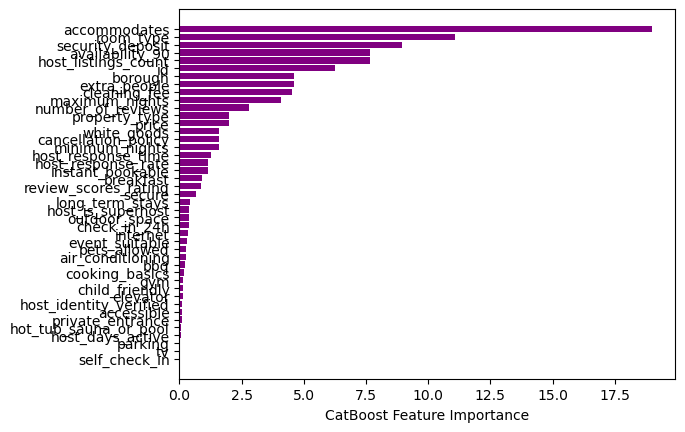

<Figure size 2500x2500 with 0 Axes>

In [ ]:
# Plotting feature importances
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(df.columns[sorted_feature_importance],
        model.feature_importances_[sorted_feature_importance],
        color='purple')
plt.xlabel("CatBoost Feature Importance")
plt.figure(figsize=(25, 25))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


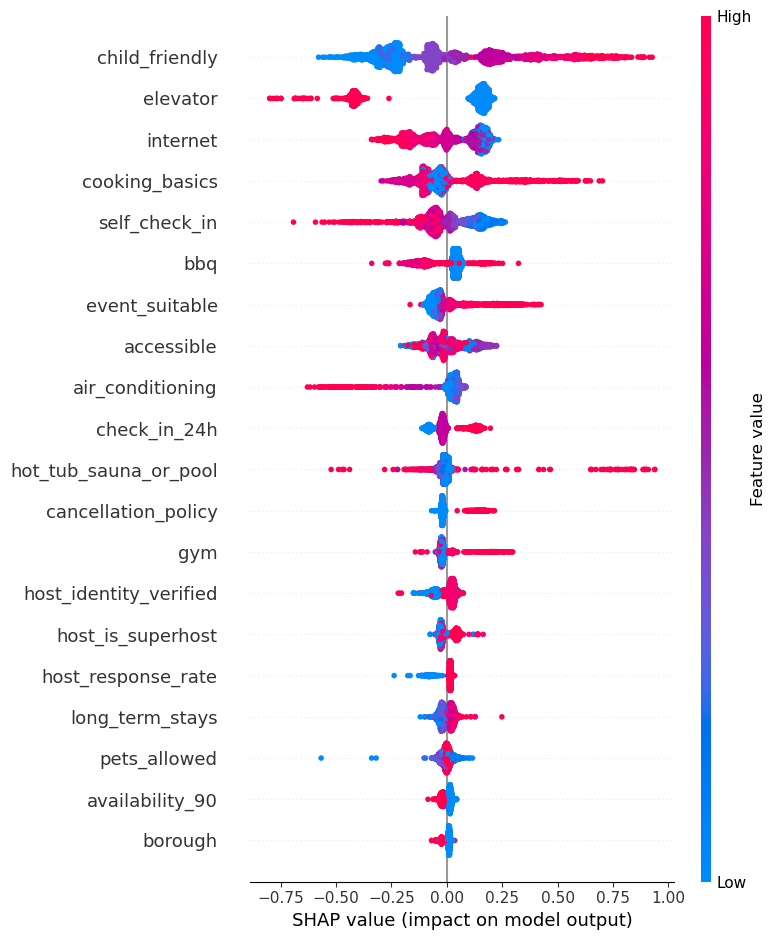

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names = df.columns[sorted_feature_importance])

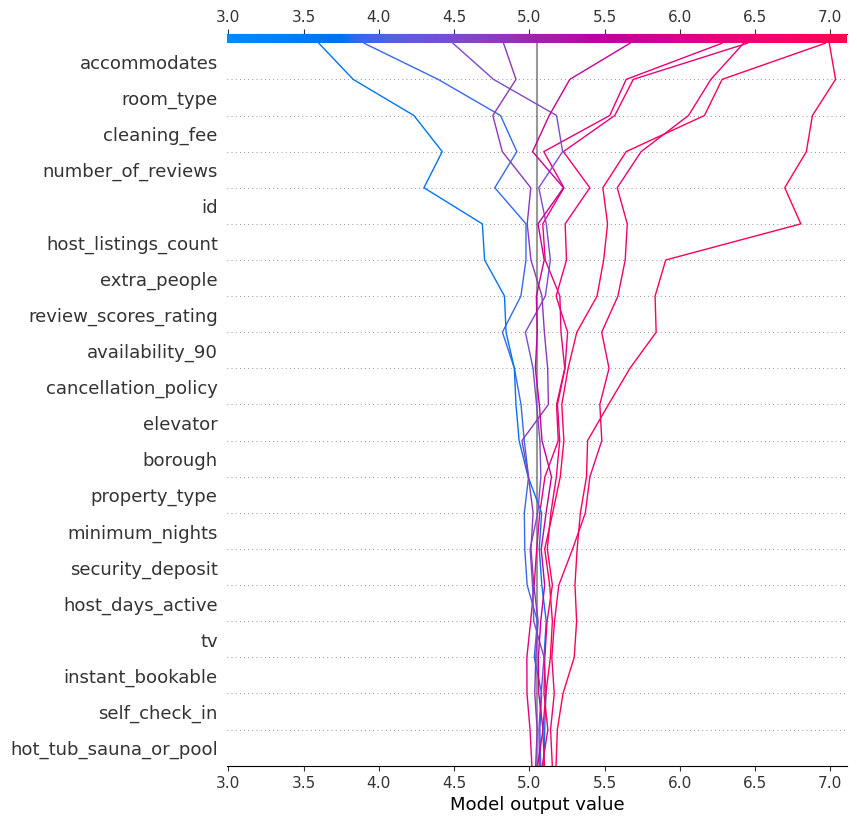

In [ ]:
#Plot shap decision tree
expected_values = explainer.expected_value
shap_array = explainer.shap_values(X_test)

shap.decision_plot(expected_values, shap_array[0:10],feature_names=list(X_test.columns))

In the SHAP plot, the features are ranked based on their average absolute SHAP
and the colors represent the feature value (red high, blue low).
The higher the SHAP value, the larger the predictor’s attribution.
In other words, the SHAP values represent a predictor’s responsibility for a change in the model output.



---



---


The top 10 most important features are:

* How many people the property accommodates
* The room type
* The security deposit
* How many days are available to book out of the next 90
* How many other listings the host has (and whether they are a multi-listing host)
* The borough
* The fee per extra person
* The cleaning fee
* The maximum night stay
* The number of reviews


---



---

